In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os 
import librosa
import librosa.display
import time
print("done")


done


In [2]:
BASE_DIR="F:/Datasets"

In [3]:
os.chdir(BASE_DIR)
MAIN_FOLDER=(os.listdir(os.getcwd()))

In [4]:
for i in MAIN_FOLDER:
    SUB_FOLDER=os.path.join(os.getcwd()+"\\IRMAS dataset\\IRMAS-TrainingData")
    print(os.listdir(SUB_FOLDER))

['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'README.txt', 'sax', 'tru', 'vio', 'voi']
['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'README.txt', 'sax', 'tru', 'vio', 'voi']
['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'README.txt', 'sax', 'tru', 'vio', 'voi']


In [5]:
audio_file_path="F:/Datasets/IRMAS dataset/IRMAS-TrainingData/cel/012__[cel][nod][cla]0043__1.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [6]:
print(librosa_audio_data)

[ 0.00013466 -0.0038507  -0.010127   ...  0.00117442  0.0085911
  0.        ]


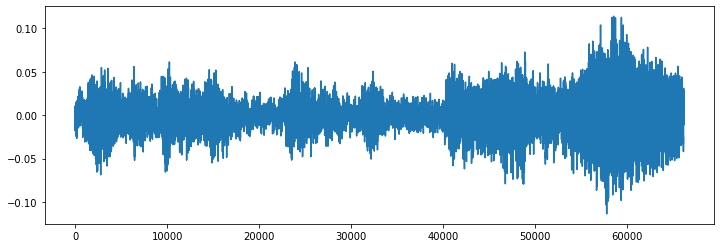

In [7]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [8]:
mfcc=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
print(mfcc.shape)

(40, 130)


In [9]:
mfcc

array([[-357.62897   , -348.01428   , -313.92914   , ..., -313.80374   ,
        -309.4827    , -298.71747   ],
       [ 142.51242   ,  127.13782   ,  112.66728   , ...,  124.23071   ,
         129.24225   ,  131.34424   ],
       [ -10.308102  ,  -10.449831  ,  -19.639753  , ...,  -14.168491  ,
         -15.471186  ,  -12.838678  ],
       ...,
       [   9.406959  ,   10.214735  ,    7.907044  , ...,   -0.37896943,
          -3.1280744 ,   -3.5267253 ],
       [  -8.709024  ,   -6.3272934 ,   -9.904917  , ...,  -19.686235  ,
         -15.780067  ,   -9.537673  ],
       [ -10.41535   ,  -14.213664  ,  -18.584618  , ...,   13.066642  ,
          11.455526  ,   11.80691   ]], dtype=float32)

In [10]:
mfcc_scaled = np.mean(mfcc.T,axis=0)
print(mfcc_scaled)

[-311.1475      126.71019     -20.981853     32.26917       5.8106003
    4.8382063    -9.349269      0.7283557    -5.8675966    -1.7944423
   -6.503386      1.5271034     2.2606895     3.4743283    -4.776829
    4.137033     -4.1243725    -3.0805945    -3.1281276     5.7419686
    5.1310287     5.6654563     0.41585326    3.1433773    -2.1885328
    4.2706385    -0.70018953    8.910277      0.9426271     1.18853
   -5.1646132    -0.99083567   -4.640421     -2.413472     -2.2875805
    3.177052      3.442657      2.6529663    -8.728377      1.4598854 ]


In [11]:
mfcc_scaled.shape

(40,)

In [12]:
def feature_extraction(file_name):
    audio_data,sample_rate = librosa.load(file_name,res_type="kaiser_best")
    mfcc_features = librosa.feature.mfcc(y=audio_data,sr=sample_rate,n_mfcc=60)
    mfcc_scaled_features = np.mean(mfcc_features.T,axis=0)
    
    return mfcc_scaled_features

In [13]:
from tqdm import tqdm

In [16]:
extracted_features=[]
for i in MAIN_FOLDER:
    #SUB_FOLDER=os.path.join(os.getcwd()+"\\IRMAS dataset\\IRMAS-TrainingData")
    for j in os.listdir(SUB_FOLDER):
        files=os.path.join(SUB_FOLDER,j)
        for k in os.listdir(files):
            file_name=SUB_FOLDER+"\\"+j+"\\"+k
            final_class_labels=j
            data=feature_extraction(file_name)
            extracted_features.append([data,final_class_labels])

In [17]:
import pandas as pd
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-501.08615, 142.35986, -25.061602, 34.30741, ...",cel
1,"[-446.9485, 126.9851, -26.552711, 27.014465, 1...",cel
2,"[-400.6541, 115.69544, -31.807455, 21.100727, ...",cel
3,"[-311.1475, 126.71019, -20.981853, 32.26917, 5...",cel
4,"[-305.28732, 116.77961, -24.161509, 20.022417,...",cel


In [18]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [19]:
X.shape

(20115, 60)

In [20]:
y.shape

(20115,)

In [21]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [22]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [23]:
y.shape

(20115, 11)

In [24]:
# ### Label Encoder MKC Iski
# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# y = to_categorical(labelencoder.fit_transform(y))

In [25]:
# y

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
X_train

array([[ -60.744892  ,   91.00222   ,  -33.320637  , ...,    0.7522805 ,
          -3.9172785 ,   -0.5191689 ],
       [  11.078343  ,   93.54166   ,  -26.902277  , ...,   -0.20824784,
          -2.816811  ,    1.1584204 ],
       [-201.93115   ,  111.30245   ,   16.717707  , ...,    1.8863319 ,
           2.1167471 ,    1.7949355 ],
       ...,
       [ -88.31352   ,   79.53605   ,  -14.747152  , ...,   -2.163282  ,
          -0.6160994 ,    2.8729534 ],
       [-180.01659   ,   66.331535  ,   30.968872  , ...,   -0.79101217,
          -1.5540545 ,    0.590113  ],
       [ -59.274044  ,  124.86324   ,  -19.900927  , ...,   -7.6728296 ,
          -6.976801  ,   -0.38036   ]], dtype=float32)

In [28]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [29]:
X_train.shape

(16092, 60)

In [30]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [32]:
### No of classes
num_labels=y.shape[1]

In [33]:


model=Sequential()

model.add(Dense(400,input_shape=(60,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels))
model.add(Activation('softmax'))



In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               24400     
_________________________________________________________________
activation (Activation)      (None, 400)               0         
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [35]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [36]:
# Training model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


411/503 [=======================>......] - ETA: 51:48 - loss: 19.7887 - accuracy: 0.09 - ETA: 6s - loss: 10.8963 - accuracy: 0.1312   - ETA: 6s - loss: 9.1436 - accuracy: 0.118 - ETA: 6s - loss: 8.0805 - accuracy: 0.12 - ETA: 6s - loss: 7.2013 - accuracy: 0.11 - ETA: 5s - loss: 6.5004 - accuracy: 0.11 - ETA: 5s - loss: 6.0236 - accuracy: 0.10 - ETA: 5s - loss: 5.6272 - accuracy: 0.10 - ETA: 5s - loss: 5.2299 - accuracy: 0.10 - ETA: 5s - loss: 5.0024 - accuracy: 0.10 - ETA: 5s - loss: 4.7681 - accuracy: 0.11 - ETA: 5s - loss: 4.5913 - accuracy: 0.11 - ETA: 5s - loss: 4.4351 - accuracy: 0.11 - ETA: 5s - loss: 4.2989 - accuracy: 0.11 - ETA: 5s - loss: 4.2038 - accuracy: 0.11 - ETA: 5s - loss: 4.1159 - accuracy: 0.11 - ETA: 4s - loss: 4.0008 - accuracy: 0.11 - ETA: 4s - loss: 3.9095 - accuracy: 0.11 - ETA: 4s - loss: 3.8277 - accuracy: 0.11 - ETA: 4s - loss: 3.7750 - accuracy: 0.11 - ETA: 4s - loss: 3.7223 - accuracy: 0.11 - ETA: 4s - loss: 3.6957 - accuracy: 0.11 - ETA: 5s - loss: 3.6695 

503/503 [==============================] - ETA: 2s - loss: 2.6592 - accuracy: 0.15 - ETA: 2s - loss: 2.6568 - accuracy: 0.15 - ETA: 2s - loss: 2.6559 - accuracy: 0.15 - ETA: 2s - loss: 2.6532 - accuracy: 0.15 - ETA: 2s - loss: 2.6510 - accuracy: 0.15 - ETA: 2s - loss: 2.6494 - accuracy: 0.15 - ETA: 2s - loss: 2.6454 - accuracy: 0.15 - ETA: 2s - loss: 2.6440 - accuracy: 0.15 - ETA: 2s - loss: 2.6423 - accuracy: 0.15 - ETA: 2s - loss: 2.6406 - accuracy: 0.15 - ETA: 2s - loss: 2.6401 - accuracy: 0.15 - ETA: 2s - loss: 2.6380 - accuracy: 0.15 - ETA: 1s - loss: 2.6354 - accuracy: 0.15 - ETA: 1s - loss: 2.6330 - accuracy: 0.15 - ETA: 1s - loss: 2.6310 - accuracy: 0.15 - ETA: 1s - loss: 2.6288 - accuracy: 0.15 - ETA: 1s - loss: 2.6282 - accuracy: 0.15 - ETA: 1s - loss: 2.6258 - accuracy: 0.16 - ETA: 1s - loss: 2.6245 - accuracy: 0.16 - ETA: 1s - loss: 2.6229 - accuracy: 0.16 - ETA: 1s - loss: 2.6214 - accuracy: 0.16 - ETA: 1s - loss: 2.6207 - accuracy: 0.16 - ETA: 1s - loss: 2.6200 - accuracy

414/503 [=======================>......] - ETA: 11s - loss: 2.3203 - accuracy: 0.187 - ETA: 7s - loss: 2.1787 - accuracy: 0.250 - ETA: 7s - loss: 2.2027 - accuracy: 0.22 - ETA: 7s - loss: 2.1914 - accuracy: 0.23 - ETA: 7s - loss: 2.1861 - accuracy: 0.23 - ETA: 7s - loss: 2.1973 - accuracy: 0.22 - ETA: 7s - loss: 2.2057 - accuracy: 0.21 - ETA: 7s - loss: 2.2111 - accuracy: 0.22 - ETA: 7s - loss: 2.2264 - accuracy: 0.21 - ETA: 7s - loss: 2.2253 - accuracy: 0.21 - ETA: 7s - loss: 2.2364 - accuracy: 0.20 - ETA: 7s - loss: 2.2242 - accuracy: 0.21 - ETA: 7s - loss: 2.2201 - accuracy: 0.21 - ETA: 6s - loss: 2.2147 - accuracy: 0.21 - ETA: 7s - loss: 2.2163 - accuracy: 0.21 - ETA: 7s - loss: 2.2150 - accuracy: 0.21 - ETA: 7s - loss: 2.2112 - accuracy: 0.21 - ETA: 7s - loss: 2.2155 - accuracy: 0.21 - ETA: 6s - loss: 2.2204 - accuracy: 0.21 - ETA: 6s - loss: 2.2186 - accuracy: 0.21 - ETA: 6s - loss: 2.2200 - accuracy: 0.21 - ETA: 6s - loss: 2.2187 - accuracy: 0.21 - ETA: 6s - loss: 2.2208 - accur

503/503 [==============================] - ETA: 2s - loss: 2.1609 - accuracy: 0.23 - ETA: 2s - loss: 2.1610 - accuracy: 0.23 - ETA: 2s - loss: 2.1607 - accuracy: 0.23 - ETA: 2s - loss: 2.1601 - accuracy: 0.23 - ETA: 2s - loss: 2.1598 - accuracy: 0.23 - ETA: 2s - loss: 2.1599 - accuracy: 0.23 - ETA: 2s - loss: 2.1595 - accuracy: 0.23 - ETA: 2s - loss: 2.1585 - accuracy: 0.23 - ETA: 2s - loss: 2.1582 - accuracy: 0.23 - ETA: 2s - loss: 2.1582 - accuracy: 0.23 - ETA: 2s - loss: 2.1583 - accuracy: 0.23 - ETA: 2s - loss: 2.1584 - accuracy: 0.23 - ETA: 2s - loss: 2.1586 - accuracy: 0.23 - ETA: 2s - loss: 2.1582 - accuracy: 0.23 - ETA: 2s - loss: 2.1584 - accuracy: 0.23 - ETA: 2s - loss: 2.1575 - accuracy: 0.23 - ETA: 1s - loss: 2.1575 - accuracy: 0.23 - ETA: 1s - loss: 2.1568 - accuracy: 0.23 - ETA: 1s - loss: 2.1569 - accuracy: 0.23 - ETA: 1s - loss: 2.1566 - accuracy: 0.23 - ETA: 1s - loss: 2.1561 - accuracy: 0.23 - ETA: 1s - loss: 2.1561 - accuracy: 0.23 - ETA: 1s - loss: 2.1554 - accuracy

497/503 [============================>.] - ETA: 8s - loss: 2.1766 - accuracy: 0.28 - ETA: 26s - loss: 2.1628 - accuracy: 0.281 - ETA: 13s - loss: 2.0084 - accuracy: 0.300 - ETA: 10s - loss: 2.0292 - accuracy: 0.274 - ETA: 10s - loss: 2.0220 - accuracy: 0.284 - ETA: 10s - loss: 2.0723 - accuracy: 0.272 - ETA: 10s - loss: 2.1064 - accuracy: 0.266 - ETA: 9s - loss: 2.1150 - accuracy: 0.260 - ETA: 9s - loss: 2.1166 - accuracy: 0.26 - ETA: 9s - loss: 2.0978 - accuracy: 0.25 - ETA: 8s - loss: 2.0949 - accuracy: 0.26 - ETA: 8s - loss: 2.0802 - accuracy: 0.27 - ETA: 9s - loss: 2.0797 - accuracy: 0.27 - ETA: 14s - loss: 2.0779 - accuracy: 0.274 - ETA: 14s - loss: 2.0826 - accuracy: 0.273 - ETA: 14s - loss: 2.0852 - accuracy: 0.278 - ETA: 13s - loss: 2.0854 - accuracy: 0.284 - ETA: 13s - loss: 2.0885 - accuracy: 0.281 - ETA: 13s - loss: 2.0814 - accuracy: 0.285 - ETA: 12s - loss: 2.0776 - accuracy: 0.284 - ETA: 12s - loss: 2.0744 - accuracy: 0.284 - ETA: 11s - loss: 2.0728 - accuracy: 0.290 - ET

503/503 [==============================] - ETA: 0s - loss: 1.9780 - accuracy: 0.32 - ETA: 0s - loss: 1.9782 - accuracy: 0.32 - 13s 26ms/step - loss: 1.9785 - accuracy: 0.3248 - val_loss: 1.7974 - val_accuracy: 0.3957

Epoch 00003: val_loss improved from 1.95808 to 1.79738, saving model to saved_models\audio_classification.hdf5
Epoch 4/100


479/503 [===========================>..] - ETA: 8s - loss: 1.7343 - accuracy: 0.31 - ETA: 8s - loss: 1.9142 - accuracy: 0.35 - ETA: 7s - loss: 1.9074 - accuracy: 0.38 - ETA: 6s - loss: 1.8558 - accuracy: 0.39 - ETA: 7s - loss: 1.8565 - accuracy: 0.38 - ETA: 7s - loss: 1.8596 - accuracy: 0.38 - ETA: 7s - loss: 1.8812 - accuracy: 0.36 - ETA: 7s - loss: 1.8956 - accuracy: 0.36 - ETA: 7s - loss: 1.8692 - accuracy: 0.37 - ETA: 7s - loss: 1.8565 - accuracy: 0.37 - ETA: 7s - loss: 1.8724 - accuracy: 0.37 - ETA: 6s - loss: 1.8776 - accuracy: 0.37 - ETA: 6s - loss: 1.8769 - accuracy: 0.37 - ETA: 6s - loss: 1.8858 - accuracy: 0.36 - ETA: 6s - loss: 1.8974 - accuracy: 0.36 - ETA: 7s - loss: 1.8998 - accuracy: 0.36 - ETA: 7s - loss: 1.9005 - accuracy: 0.36 - ETA: 8s - loss: 1.8978 - accuracy: 0.36 - ETA: 8s - loss: 1.9030 - accuracy: 0.36 - ETA: 8s - loss: 1.9124 - accuracy: 0.36 - ETA: 8s - loss: 1.9143 - accuracy: 0.36 - ETA: 8s - loss: 1.9171 - accuracy: 0.35 - ETA: 8s - loss: 1.9166 - accuracy

503/503 [==============================] - ETA: 0s - loss: 1.8456 - accuracy: 0.37 - ETA: 0s - loss: 1.8457 - accuracy: 0.37 - ETA: 0s - loss: 1.8459 - accuracy: 0.37 - ETA: 0s - loss: 1.8463 - accuracy: 0.37 - ETA: 0s - loss: 1.8462 - accuracy: 0.37 - ETA: 0s - loss: 1.8460 - accuracy: 0.37 - ETA: 0s - loss: 1.8454 - accuracy: 0.37 - ETA: 0s - loss: 1.8456 - accuracy: 0.37 - ETA: 0s - loss: 1.8452 - accuracy: 0.37 - ETA: 0s - loss: 1.8449 - accuracy: 0.37 - ETA: 0s - loss: 1.8449 - accuracy: 0.37 - ETA: 0s - loss: 1.8453 - accuracy: 0.37 - 14s 28ms/step - loss: 1.8454 - accuracy: 0.3770 - val_loss: 1.6776 - val_accuracy: 0.4531

Epoch 00004: val_loss improved from 1.79738 to 1.67758, saving model to saved_models\audio_classification.hdf5
Epoch 5/100
503/503 [==============================] - ETA: 9s - loss: 1.6779 - accuracy: 0.34 - ETA: 12s - loss: 1.6543 - accuracy: 0.458 - ETA: 10s - loss: 1.6935 - accuracy: 0.468 - ETA: 9s - loss: 1.6971 - accuracy: 0.454 - ETA: 10s - loss: 1.6875

503/503 [==============================] - ETA: 9s - loss: 1.7839 - accuracy: 0.37 - ETA: 12s - loss: 1.6448 - accuracy: 0.437 - ETA: 10s - loss: 1.4931 - accuracy: 0.463 - ETA: 11s - loss: 1.5228 - accuracy: 0.468 - ETA: 10s - loss: 1.5288 - accuracy: 0.488 - ETA: 10s - loss: 1.5326 - accuracy: 0.495 - ETA: 10s - loss: 1.5611 - accuracy: 0.478 - ETA: 10s - loss: 1.5607 - accuracy: 0.472 - ETA: 10s - loss: 1.5572 - accuracy: 0.468 - ETA: 10s - loss: 1.5630 - accuracy: 0.464 - ETA: 10s - loss: 1.5809 - accuracy: 0.457 - ETA: 10s - loss: 1.5885 - accuracy: 0.460 - ETA: 10s - loss: 1.5740 - accuracy: 0.469 - ETA: 9s - loss: 1.5730 - accuracy: 0.474 - ETA: 9s - loss: 1.5668 - accuracy: 0.47 - ETA: 10s - loss: 1.5664 - accuracy: 0.480 - ETA: 10s - loss: 1.5700 - accuracy: 0.479 - ETA: 11s - loss: 1.5696 - accuracy: 0.480 - ETA: 11s - loss: 1.5760 - accuracy: 0.479 - ETA: 11s - loss: 1.5786 - accuracy: 0.477 - ETA: 10s - loss: 1.5933 - accuracy: 0.473 - ETA: 10s - loss: 1.6042 - accuracy: 0.

503/503 [==============================] - ETA: 1:10 - loss: 1.8595 - accuracy: 0.34 - ETA: 57s - loss: 1.7221 - accuracy: 0.4062 - ETA: 51s - loss: 1.5785 - accuracy: 0.447 - ETA: 45s - loss: 1.4770 - accuracy: 0.515 - ETA: 40s - loss: 1.4588 - accuracy: 0.518 - ETA: 27s - loss: 1.4743 - accuracy: 0.523 - ETA: 27s - loss: 1.4652 - accuracy: 0.520 - ETA: 21s - loss: 1.4539 - accuracy: 0.523 - ETA: 17s - loss: 1.4485 - accuracy: 0.527 - ETA: 16s - loss: 1.4375 - accuracy: 0.534 - ETA: 15s - loss: 1.4548 - accuracy: 0.525 - ETA: 14s - loss: 1.4685 - accuracy: 0.520 - ETA: 14s - loss: 1.4682 - accuracy: 0.519 - ETA: 13s - loss: 1.4998 - accuracy: 0.514 - ETA: 13s - loss: 1.4928 - accuracy: 0.515 - ETA: 13s - loss: 1.4873 - accuracy: 0.515 - ETA: 13s - loss: 1.4822 - accuracy: 0.514 - ETA: 13s - loss: 1.4812 - accuracy: 0.515 - ETA: 14s - loss: 1.4837 - accuracy: 0.511 - ETA: 13s - loss: 1.4748 - accuracy: 0.512 - ETA: 13s - loss: 1.4718 - accuracy: 0.512 - ETA: 12s - loss: 1.4737 - accura

Epoch 00007: val_loss improved from 1.39074 to 1.27843, saving model to saved_models\audio_classification.hdf5
Epoch 8/100


412/503 [=======================>......] - ETA: 9s - loss: 1.4503 - accuracy: 0.56 - ETA: 15s - loss: 1.4071 - accuracy: 0.510 - ETA: 11s - loss: 1.4202 - accuracy: 0.494 - ETA: 11s - loss: 1.3657 - accuracy: 0.517 - ETA: 11s - loss: 1.3498 - accuracy: 0.515 - ETA: 10s - loss: 1.3821 - accuracy: 0.506 - ETA: 10s - loss: 1.3812 - accuracy: 0.512 - ETA: 10s - loss: 1.3640 - accuracy: 0.523 - ETA: 9s - loss: 1.3445 - accuracy: 0.539 - ETA: 9s - loss: 1.3838 - accuracy: 0.53 - ETA: 9s - loss: 1.3897 - accuracy: 0.52 - ETA: 9s - loss: 1.3808 - accuracy: 0.53 - ETA: 9s - loss: 1.3686 - accuracy: 0.54 - ETA: 9s - loss: 1.3684 - accuracy: 0.54 - ETA: 9s - loss: 1.3641 - accuracy: 0.54 - ETA: 9s - loss: 1.3596 - accuracy: 0.54 - ETA: 9s - loss: 1.3732 - accuracy: 0.54 - ETA: 9s - loss: 1.3629 - accuracy: 0.54 - ETA: 9s - loss: 1.3615 - accuracy: 0.55 - ETA: 9s - loss: 1.3632 - accuracy: 0.55 - ETA: 9s - loss: 1.3583 - accuracy: 0.55 - ETA: 9s - loss: 1.3577 - accuracy: 0.55 - ETA: 9s - loss: 1.

503/503 [==============================] - ETA: 2s - loss: 1.3349 - accuracy: 0.56 - ETA: 2s - loss: 1.3353 - accuracy: 0.56 - ETA: 2s - loss: 1.3354 - accuracy: 0.56 - ETA: 2s - loss: 1.3357 - accuracy: 0.56 - ETA: 2s - loss: 1.3374 - accuracy: 0.55 - ETA: 2s - loss: 1.3385 - accuracy: 0.55 - ETA: 2s - loss: 1.3397 - accuracy: 0.55 - ETA: 2s - loss: 1.3401 - accuracy: 0.55 - ETA: 2s - loss: 1.3408 - accuracy: 0.55 - ETA: 2s - loss: 1.3412 - accuracy: 0.55 - ETA: 2s - loss: 1.3407 - accuracy: 0.55 - ETA: 1s - loss: 1.3409 - accuracy: 0.55 - ETA: 1s - loss: 1.3413 - accuracy: 0.55 - ETA: 1s - loss: 1.3410 - accuracy: 0.55 - ETA: 1s - loss: 1.3418 - accuracy: 0.55 - ETA: 1s - loss: 1.3415 - accuracy: 0.55 - ETA: 1s - loss: 1.3415 - accuracy: 0.55 - ETA: 1s - loss: 1.3409 - accuracy: 0.55 - ETA: 1s - loss: 1.3409 - accuracy: 0.55 - ETA: 1s - loss: 1.3405 - accuracy: 0.55 - ETA: 1s - loss: 1.3403 - accuracy: 0.55 - ETA: 1s - loss: 1.3405 - accuracy: 0.55 - ETA: 1s - loss: 1.3402 - accuracy

501/503 [============================>.] - ETA: 14s - loss: 1.3322 - accuracy: 0.500 - ETA: 32s - loss: 1.3497 - accuracy: 0.500 - ETA: 20s - loss: 1.1937 - accuracy: 0.578 - ETA: 19s - loss: 1.2413 - accuracy: 0.572 - ETA: 15s - loss: 1.2291 - accuracy: 0.586 - ETA: 15s - loss: 1.2111 - accuracy: 0.593 - ETA: 13s - loss: 1.1978 - accuracy: 0.593 - ETA: 12s - loss: 1.2245 - accuracy: 0.595 - ETA: 12s - loss: 1.2244 - accuracy: 0.595 - ETA: 11s - loss: 1.2351 - accuracy: 0.596 - ETA: 10s - loss: 1.2332 - accuracy: 0.597 - ETA: 9s - loss: 1.2438 - accuracy: 0.585 - ETA: 9s - loss: 1.2477 - accuracy: 0.58 - ETA: 9s - loss: 1.2428 - accuracy: 0.59 - ETA: 9s - loss: 1.2572 - accuracy: 0.58 - ETA: 9s - loss: 1.2544 - accuracy: 0.58 - ETA: 9s - loss: 1.2664 - accuracy: 0.58 - ETA: 9s - loss: 1.2580 - accuracy: 0.58 - ETA: 9s - loss: 1.2544 - accuracy: 0.58 - ETA: 9s - loss: 1.2582 - accuracy: 0.57 - ETA: 8s - loss: 1.2484 - accuracy: 0.58 - ETA: 9s - loss: 1.2496 - accuracy: 0.58 - ETA: 8s - 

503/503 [==============================] - 13s 26ms/step - loss: 1.2290 - accuracy: 0.5961 - val_loss: 1.0351 - val_accuracy: 0.6595

Epoch 00009: val_loss improved from 1.12711 to 1.03509, saving model to saved_models\audio_classification.hdf5
Epoch 10/100


412/503 [=======================>......] - ETA: 8s - loss: 1.0070 - accuracy: 0.56 - ETA: 29s - loss: 1.0563 - accuracy: 0.578 - ETA: 14s - loss: 1.1318 - accuracy: 0.612 - ETA: 11s - loss: 1.0884 - accuracy: 0.625 - ETA: 10s - loss: 1.0905 - accuracy: 0.630 - ETA: 12s - loss: 1.0845 - accuracy: 0.630 - ETA: 36s - loss: 1.0801 - accuracy: 0.627 - ETA: 36s - loss: 1.1113 - accuracy: 0.625 - ETA: 36s - loss: 1.1018 - accuracy: 0.633 - ETA: 36s - loss: 1.0926 - accuracy: 0.636 - ETA: 36s - loss: 1.0802 - accuracy: 0.643 - ETA: 35s - loss: 1.0649 - accuracy: 0.645 - ETA: 28s - loss: 1.0707 - accuracy: 0.639 - ETA: 25s - loss: 1.0858 - accuracy: 0.635 - ETA: 23s - loss: 1.0911 - accuracy: 0.637 - ETA: 22s - loss: 1.0813 - accuracy: 0.642 - ETA: 21s - loss: 1.0822 - accuracy: 0.642 - ETA: 21s - loss: 1.0805 - accuracy: 0.643 - ETA: 21s - loss: 1.0741 - accuracy: 0.646 - ETA: 20s - loss: 1.0899 - accuracy: 0.641 - ETA: 20s - loss: 1.0864 - accuracy: 0.641 - ETA: 20s - loss: 1.0872 - accuracy:

503/503 [==============================] - ETA: 3s - loss: 1.1408 - accuracy: 0.62 - ETA: 3s - loss: 1.1411 - accuracy: 0.62 - ETA: 3s - loss: 1.1402 - accuracy: 0.62 - ETA: 3s - loss: 1.1392 - accuracy: 0.62 - ETA: 3s - loss: 1.1383 - accuracy: 0.62 - ETA: 3s - loss: 1.1388 - accuracy: 0.62 - ETA: 3s - loss: 1.1377 - accuracy: 0.62 - ETA: 3s - loss: 1.1370 - accuracy: 0.62 - ETA: 3s - loss: 1.1361 - accuracy: 0.62 - ETA: 3s - loss: 1.1366 - accuracy: 0.62 - ETA: 3s - loss: 1.1360 - accuracy: 0.62 - ETA: 3s - loss: 1.1354 - accuracy: 0.62 - ETA: 3s - loss: 1.1353 - accuracy: 0.62 - ETA: 3s - loss: 1.1355 - accuracy: 0.62 - ETA: 3s - loss: 1.1369 - accuracy: 0.62 - ETA: 3s - loss: 1.1379 - accuracy: 0.62 - ETA: 3s - loss: 1.1376 - accuracy: 0.62 - ETA: 3s - loss: 1.1382 - accuracy: 0.62 - ETA: 3s - loss: 1.1393 - accuracy: 0.62 - ETA: 3s - loss: 1.1392 - accuracy: 0.62 - ETA: 2s - loss: 1.1389 - accuracy: 0.62 - ETA: 2s - loss: 1.1388 - accuracy: 0.62 - ETA: 2s - loss: 1.1397 - accuracy

419/503 [=======================>......] - ETA: 8s - loss: 1.1569 - accuracy: 0.53 - ETA: 6s - loss: 1.0159 - accuracy: 0.63 - ETA: 6s - loss: 1.0182 - accuracy: 0.64 - ETA: 8s - loss: 1.0142 - accuracy: 0.64 - ETA: 19s - loss: 1.0000 - accuracy: 0.645 - ETA: 22s - loss: 0.9999 - accuracy: 0.646 - ETA: 23s - loss: 1.0159 - accuracy: 0.636 - ETA: 25s - loss: 1.0206 - accuracy: 0.637 - ETA: 28s - loss: 1.0140 - accuracy: 0.638 - ETA: 30s - loss: 1.0235 - accuracy: 0.636 - ETA: 30s - loss: 1.0259 - accuracy: 0.638 - ETA: 31s - loss: 1.0232 - accuracy: 0.641 - ETA: 33s - loss: 1.0188 - accuracy: 0.643 - ETA: 34s - loss: 1.0331 - accuracy: 0.644 - ETA: 35s - loss: 1.0318 - accuracy: 0.643 - ETA: 35s - loss: 1.0334 - accuracy: 0.648 - ETA: 35s - loss: 1.0345 - accuracy: 0.649 - ETA: 36s - loss: 1.0279 - accuracy: 0.655 - ETA: 36s - loss: 1.0313 - accuracy: 0.651 - ETA: 37s - loss: 1.0238 - accuracy: 0.651 - ETA: 38s - loss: 1.0258 - accuracy: 0.650 - ETA: 38s - loss: 1.0305 - accuracy: 0.645

503/503 [==============================] - ETA: 3s - loss: 1.0637 - accuracy: 0.65 - ETA: 3s - loss: 1.0634 - accuracy: 0.65 - ETA: 3s - loss: 1.0628 - accuracy: 0.65 - ETA: 3s - loss: 1.0626 - accuracy: 0.65 - ETA: 3s - loss: 1.0627 - accuracy: 0.65 - ETA: 3s - loss: 1.0629 - accuracy: 0.65 - ETA: 3s - loss: 1.0623 - accuracy: 0.65 - ETA: 3s - loss: 1.0613 - accuracy: 0.65 - ETA: 3s - loss: 1.0609 - accuracy: 0.65 - ETA: 3s - loss: 1.0612 - accuracy: 0.65 - ETA: 3s - loss: 1.0617 - accuracy: 0.65 - ETA: 3s - loss: 1.0613 - accuracy: 0.65 - ETA: 3s - loss: 1.0619 - accuracy: 0.65 - ETA: 3s - loss: 1.0619 - accuracy: 0.65 - ETA: 3s - loss: 1.0616 - accuracy: 0.65 - ETA: 3s - loss: 1.0613 - accuracy: 0.65 - ETA: 3s - loss: 1.0611 - accuracy: 0.65 - ETA: 3s - loss: 1.0614 - accuracy: 0.65 - ETA: 3s - loss: 1.0618 - accuracy: 0.65 - ETA: 3s - loss: 1.0611 - accuracy: 0.65 - ETA: 2s - loss: 1.0612 - accuracy: 0.65 - ETA: 2s - loss: 1.0613 - accuracy: 0.65 - ETA: 2s - loss: 1.0613 - accuracy

377/503 [=====================>........] - ETA: 8s - loss: 0.8275 - accuracy: 0.78 - ETA: 9s - loss: 0.9782 - accuracy: 0.69 - ETA: 8s - loss: 0.8835 - accuracy: 0.72 - ETA: 7s - loss: 0.9463 - accuracy: 0.69 - ETA: 8s - loss: 0.9635 - accuracy: 0.69 - ETA: 7s - loss: 0.9035 - accuracy: 0.71 - ETA: 7s - loss: 0.9081 - accuracy: 0.71 - ETA: 7s - loss: 0.9382 - accuracy: 0.69 - ETA: 6s - loss: 0.9269 - accuracy: 0.70 - ETA: 6s - loss: 0.9137 - accuracy: 0.70 - ETA: 6s - loss: 0.9247 - accuracy: 0.69 - ETA: 6s - loss: 0.9452 - accuracy: 0.69 - ETA: 6s - loss: 0.9434 - accuracy: 0.69 - ETA: 6s - loss: 0.9310 - accuracy: 0.69 - ETA: 6s - loss: 0.9253 - accuracy: 0.69 - ETA: 6s - loss: 0.9217 - accuracy: 0.69 - ETA: 6s - loss: 0.9166 - accuracy: 0.69 - ETA: 6s - loss: 0.9195 - accuracy: 0.69 - ETA: 6s - loss: 0.9274 - accuracy: 0.69 - ETA: 6s - loss: 0.9251 - accuracy: 0.69 - ETA: 5s - loss: 0.9324 - accuracy: 0.69 - ETA: 5s - loss: 0.9277 - accuracy: 0.69 - ETA: 5s - loss: 0.9332 - accuracy

503/503 [==============================] - ETA: 5s - loss: 0.9725 - accuracy: 0.68 - ETA: 5s - loss: 0.9730 - accuracy: 0.67 - ETA: 5s - loss: 0.9728 - accuracy: 0.67 - ETA: 5s - loss: 0.9739 - accuracy: 0.67 - ETA: 5s - loss: 0.9737 - accuracy: 0.67 - ETA: 5s - loss: 0.9729 - accuracy: 0.67 - ETA: 5s - loss: 0.9735 - accuracy: 0.67 - ETA: 5s - loss: 0.9731 - accuracy: 0.68 - ETA: 5s - loss: 0.9735 - accuracy: 0.67 - ETA: 5s - loss: 0.9731 - accuracy: 0.68 - ETA: 5s - loss: 0.9733 - accuracy: 0.68 - ETA: 5s - loss: 0.9725 - accuracy: 0.68 - ETA: 4s - loss: 0.9714 - accuracy: 0.68 - ETA: 4s - loss: 0.9709 - accuracy: 0.68 - ETA: 4s - loss: 0.9717 - accuracy: 0.68 - ETA: 4s - loss: 0.9712 - accuracy: 0.68 - ETA: 4s - loss: 0.9717 - accuracy: 0.68 - ETA: 4s - loss: 0.9738 - accuracy: 0.68 - ETA: 3s - loss: 0.9731 - accuracy: 0.68 - ETA: 3s - loss: 0.9731 - accuracy: 0.68 - ETA: 3s - loss: 0.9733 - accuracy: 0.68 - ETA: 3s - loss: 0.9728 - accuracy: 0.68 - ETA: 3s - loss: 0.9710 - accuracy

358/503 [====================>.........] - ETA: 3:01 - loss: 1.3825 - accuracy: 0.56 - ETA: 1:02 - loss: 1.0305 - accuracy: 0.70 - ETA: 1:16 - loss: 0.8821 - accuracy: 0.75 - ETA: 3:53 - loss: 0.8374 - accuracy: 0.73 - ETA: 3:13 - loss: 0.8068 - accuracy: 0.74 - ETA: 2:50 - loss: 0.8200 - accuracy: 0.72 - ETA: 2:36 - loss: 0.8757 - accuracy: 0.71 - ETA: 2:25 - loss: 0.8887 - accuracy: 0.69 - ETA: 2:18 - loss: 0.9071 - accuracy: 0.69 - ETA: 2:10 - loss: 0.8875 - accuracy: 0.69 - ETA: 2:05 - loss: 0.8723 - accuracy: 0.69 - ETA: 2:02 - loss: 0.8626 - accuracy: 0.70 - ETA: 1:57 - loss: 0.8642 - accuracy: 0.71 - ETA: 1:50 - loss: 0.8873 - accuracy: 0.71 - ETA: 1:45 - loss: 0.8859 - accuracy: 0.71 - ETA: 1:41 - loss: 0.9355 - accuracy: 0.70 - ETA: 1:37 - loss: 0.9051 - accuracy: 0.71 - ETA: 1:33 - loss: 0.9052 - accuracy: 0.71 - ETA: 1:30 - loss: 0.8993 - accuracy: 0.71 - ETA: 1:26 - loss: 0.9339 - accuracy: 0.70 - ETA: 1:24 - loss: 0.9309 - accuracy: 0.70 - ETA: 1:22 - loss: 0.9275 - accura

503/503 [==============================] - ETA: 6s - loss: 0.8957 - accuracy: 0.70 - ETA: 6s - loss: 0.8953 - accuracy: 0.70 - ETA: 6s - loss: 0.8962 - accuracy: 0.70 - ETA: 6s - loss: 0.8950 - accuracy: 0.70 - ETA: 5s - loss: 0.8942 - accuracy: 0.70 - ETA: 5s - loss: 0.8950 - accuracy: 0.70 - ETA: 5s - loss: 0.8938 - accuracy: 0.70 - ETA: 5s - loss: 0.8940 - accuracy: 0.70 - ETA: 4s - loss: 0.8944 - accuracy: 0.70 - ETA: 4s - loss: 0.8948 - accuracy: 0.70 - ETA: 4s - loss: 0.8952 - accuracy: 0.70 - ETA: 4s - loss: 0.8943 - accuracy: 0.70 - ETA: 3s - loss: 0.8942 - accuracy: 0.70 - ETA: 3s - loss: 0.8944 - accuracy: 0.70 - ETA: 3s - loss: 0.8941 - accuracy: 0.70 - ETA: 3s - loss: 0.8934 - accuracy: 0.70 - ETA: 3s - loss: 0.8957 - accuracy: 0.70 - ETA: 3s - loss: 0.8956 - accuracy: 0.70 - ETA: 2s - loss: 0.8957 - accuracy: 0.70 - ETA: 2s - loss: 0.8960 - accuracy: 0.70 - ETA: 2s - loss: 0.8958 - accuracy: 0.70 - ETA: 2s - loss: 0.8954 - accuracy: 0.70 - ETA: 2s - loss: 0.8949 - accuracy

383/503 [=====================>........] - ETA: 8s - loss: 1.4817 - accuracy: 0.50 - ETA: 5s - loss: 0.8524 - accuracy: 0.69 - ETA: 12s - loss: 0.8445 - accuracy: 0.709 - ETA: 17s - loss: 0.8192 - accuracy: 0.718 - ETA: 18s - loss: 0.8702 - accuracy: 0.704 - ETA: 14s - loss: 0.8867 - accuracy: 0.697 - ETA: 12s - loss: 0.8769 - accuracy: 0.709 - ETA: 14s - loss: 0.8530 - accuracy: 0.720 - ETA: 16s - loss: 0.8513 - accuracy: 0.723 - ETA: 14s - loss: 0.8472 - accuracy: 0.731 - ETA: 15s - loss: 0.8558 - accuracy: 0.726 - ETA: 16s - loss: 0.8665 - accuracy: 0.727 - ETA: 14s - loss: 0.8791 - accuracy: 0.723 - ETA: 14s - loss: 0.8764 - accuracy: 0.717 - ETA: 12s - loss: 0.8790 - accuracy: 0.720 - ETA: 11s - loss: 0.8648 - accuracy: 0.723 - ETA: 11s - loss: 0.8665 - accuracy: 0.720 - ETA: 10s - loss: 0.8704 - accuracy: 0.721 - ETA: 9s - loss: 0.8636 - accuracy: 0.724 - ETA: 9s - loss: 0.8732 - accuracy: 0.72 - ETA: 8s - loss: 0.8698 - accuracy: 0.72 - ETA: 8s - loss: 0.8721 - accuracy: 0.71 - 

503/503 [==============================] - ETA: 5s - loss: 0.8472 - accuracy: 0.72 - ETA: 4s - loss: 0.8471 - accuracy: 0.72 - ETA: 4s - loss: 0.8490 - accuracy: 0.72 - ETA: 4s - loss: 0.8465 - accuracy: 0.72 - ETA: 4s - loss: 0.8466 - accuracy: 0.72 - ETA: 4s - loss: 0.8464 - accuracy: 0.72 - ETA: 4s - loss: 0.8465 - accuracy: 0.72 - ETA: 4s - loss: 0.8471 - accuracy: 0.72 - ETA: 4s - loss: 0.8465 - accuracy: 0.72 - ETA: 4s - loss: 0.8468 - accuracy: 0.72 - ETA: 4s - loss: 0.8470 - accuracy: 0.72 - ETA: 4s - loss: 0.8476 - accuracy: 0.72 - ETA: 4s - loss: 0.8485 - accuracy: 0.72 - ETA: 4s - loss: 0.8485 - accuracy: 0.72 - ETA: 4s - loss: 0.8478 - accuracy: 0.72 - ETA: 4s - loss: 0.8481 - accuracy: 0.72 - ETA: 4s - loss: 0.8479 - accuracy: 0.72 - ETA: 4s - loss: 0.8482 - accuracy: 0.72 - ETA: 4s - loss: 0.8482 - accuracy: 0.72 - ETA: 4s - loss: 0.8478 - accuracy: 0.72 - ETA: 4s - loss: 0.8478 - accuracy: 0.72 - ETA: 3s - loss: 0.8490 - accuracy: 0.72 - ETA: 3s - loss: 0.8496 - accuracy

401/503 [======================>.......] - ETA: 9s - loss: 1.0003 - accuracy: 0.68 - ETA: 7s - loss: 0.8749 - accuracy: 0.73 - ETA: 11s - loss: 0.8283 - accuracy: 0.750 - ETA: 12s - loss: 0.8743 - accuracy: 0.730 - ETA: 12s - loss: 0.8682 - accuracy: 0.731 - ETA: 17s - loss: 0.8478 - accuracy: 0.733 - ETA: 20s - loss: 0.8423 - accuracy: 0.731 - ETA: 23s - loss: 0.8398 - accuracy: 0.735 - ETA: 26s - loss: 0.8413 - accuracy: 0.734 - ETA: 27s - loss: 0.8366 - accuracy: 0.741 - ETA: 29s - loss: 0.8304 - accuracy: 0.742 - ETA: 29s - loss: 0.8220 - accuracy: 0.740 - ETA: 31s - loss: 0.8045 - accuracy: 0.748 - ETA: 32s - loss: 0.8012 - accuracy: 0.751 - ETA: 33s - loss: 0.8252 - accuracy: 0.746 - ETA: 33s - loss: 0.8115 - accuracy: 0.754 - ETA: 34s - loss: 0.8030 - accuracy: 0.755 - ETA: 35s - loss: 0.8033 - accuracy: 0.755 - ETA: 36s - loss: 0.7920 - accuracy: 0.760 - ETA: 36s - loss: 0.7951 - accuracy: 0.756 - ETA: 36s - loss: 0.7963 - accuracy: 0.756 - ETA: 37s - loss: 0.7880 - accuracy: 0

503/503 [==============================] - ETA: 4s - loss: 0.7825 - accuracy: 0.75 - ETA: 4s - loss: 0.7826 - accuracy: 0.75 - ETA: 4s - loss: 0.7825 - accuracy: 0.75 - ETA: 4s - loss: 0.7826 - accuracy: 0.75 - ETA: 4s - loss: 0.7824 - accuracy: 0.75 - ETA: 4s - loss: 0.7820 - accuracy: 0.75 - ETA: 4s - loss: 0.7824 - accuracy: 0.75 - ETA: 4s - loss: 0.7835 - accuracy: 0.75 - ETA: 4s - loss: 0.7827 - accuracy: 0.75 - ETA: 4s - loss: 0.7821 - accuracy: 0.75 - ETA: 4s - loss: 0.7819 - accuracy: 0.75 - ETA: 4s - loss: 0.7813 - accuracy: 0.75 - ETA: 4s - loss: 0.7818 - accuracy: 0.75 - ETA: 4s - loss: 0.7820 - accuracy: 0.75 - ETA: 4s - loss: 0.7819 - accuracy: 0.75 - ETA: 4s - loss: 0.7820 - accuracy: 0.75 - ETA: 4s - loss: 0.7825 - accuracy: 0.75 - ETA: 4s - loss: 0.7825 - accuracy: 0.75 - ETA: 4s - loss: 0.7821 - accuracy: 0.75 - ETA: 4s - loss: 0.7817 - accuracy: 0.75 - ETA: 4s - loss: 0.7818 - accuracy: 0.75 - ETA: 3s - loss: 0.7824 - accuracy: 0.75 - ETA: 3s - loss: 0.7830 - accuracy

355/503 [====================>.........] - ETA: 8s - loss: 0.8355 - accuracy: 0.65 - ETA: 8s - loss: 0.8183 - accuracy: 0.75 - ETA: 15s - loss: 0.7364 - accuracy: 0.786 - ETA: 21s - loss: 0.7615 - accuracy: 0.776 - ETA: 25s - loss: 0.7318 - accuracy: 0.789 - ETA: 26s - loss: 0.7016 - accuracy: 0.798 - ETA: 29s - loss: 0.6934 - accuracy: 0.800 - ETA: 30s - loss: 0.6889 - accuracy: 0.801 - ETA: 31s - loss: 0.7077 - accuracy: 0.789 - ETA: 32s - loss: 0.7065 - accuracy: 0.783 - ETA: 32s - loss: 0.6974 - accuracy: 0.785 - ETA: 33s - loss: 0.6888 - accuracy: 0.789 - ETA: 34s - loss: 0.6851 - accuracy: 0.789 - ETA: 34s - loss: 0.6838 - accuracy: 0.786 - ETA: 34s - loss: 0.6670 - accuracy: 0.793 - ETA: 35s - loss: 0.6753 - accuracy: 0.787 - ETA: 35s - loss: 0.6650 - accuracy: 0.790 - ETA: 36s - loss: 0.6710 - accuracy: 0.790 - ETA: 36s - loss: 0.6646 - accuracy: 0.794 - ETA: 36s - loss: 0.6646 - accuracy: 0.793 - ETA: 37s - loss: 0.6762 - accuracy: 0.787 - ETA: 37s - loss: 0.6738 - accuracy: 0

503/503 [==============================] - ETA: 6s - loss: 0.7375 - accuracy: 0.76 - ETA: 6s - loss: 0.7367 - accuracy: 0.76 - ETA: 6s - loss: 0.7360 - accuracy: 0.76 - ETA: 6s - loss: 0.7361 - accuracy: 0.76 - ETA: 5s - loss: 0.7359 - accuracy: 0.76 - ETA: 5s - loss: 0.7342 - accuracy: 0.76 - ETA: 5s - loss: 0.7359 - accuracy: 0.76 - ETA: 5s - loss: 0.7369 - accuracy: 0.76 - ETA: 4s - loss: 0.7398 - accuracy: 0.76 - ETA: 4s - loss: 0.7399 - accuracy: 0.76 - ETA: 4s - loss: 0.7405 - accuracy: 0.76 - ETA: 4s - loss: 0.7400 - accuracy: 0.76 - ETA: 4s - loss: 0.7397 - accuracy: 0.76 - ETA: 4s - loss: 0.7397 - accuracy: 0.76 - ETA: 4s - loss: 0.7402 - accuracy: 0.76 - ETA: 4s - loss: 0.7409 - accuracy: 0.76 - ETA: 4s - loss: 0.7408 - accuracy: 0.76 - ETA: 4s - loss: 0.7411 - accuracy: 0.76 - ETA: 4s - loss: 0.7406 - accuracy: 0.76 - ETA: 4s - loss: 0.7410 - accuracy: 0.76 - ETA: 4s - loss: 0.7405 - accuracy: 0.76 - ETA: 4s - loss: 0.7406 - accuracy: 0.76 - ETA: 4s - loss: 0.7408 - accuracy

435/503 [========================>.....] - ETA: 9s - loss: 0.5943 - accuracy: 0.78 - ETA: 8s - loss: 0.7417 - accuracy: 0.81 - ETA: 7s - loss: 0.7546 - accuracy: 0.77 - ETA: 7s - loss: 0.7402 - accuracy: 0.77 - ETA: 6s - loss: 0.7589 - accuracy: 0.77 - ETA: 6s - loss: 0.7807 - accuracy: 0.76 - ETA: 6s - loss: 0.7512 - accuracy: 0.78 - ETA: 6s - loss: 0.7399 - accuracy: 0.78 - ETA: 6s - loss: 0.7341 - accuracy: 0.77 - ETA: 6s - loss: 0.7403 - accuracy: 0.77 - ETA: 6s - loss: 0.7425 - accuracy: 0.77 - ETA: 6s - loss: 0.7453 - accuracy: 0.77 - ETA: 7s - loss: 0.7437 - accuracy: 0.77 - ETA: 7s - loss: 0.7341 - accuracy: 0.77 - ETA: 6s - loss: 0.7364 - accuracy: 0.77 - ETA: 6s - loss: 0.7280 - accuracy: 0.77 - ETA: 6s - loss: 0.7284 - accuracy: 0.77 - ETA: 6s - loss: 0.7257 - accuracy: 0.77 - ETA: 5s - loss: 0.7230 - accuracy: 0.77 - ETA: 5s - loss: 0.7277 - accuracy: 0.77 - ETA: 5s - loss: 0.7212 - accuracy: 0.77 - ETA: 5s - loss: 0.7197 - accuracy: 0.77 - ETA: 6s - loss: 0.7169 - accuracy

503/503 [==============================] - ETA: 2s - loss: 0.6892 - accuracy: 0.78 - ETA: 2s - loss: 0.6892 - accuracy: 0.78 - ETA: 2s - loss: 0.6891 - accuracy: 0.78 - ETA: 2s - loss: 0.6880 - accuracy: 0.78 - ETA: 2s - loss: 0.6895 - accuracy: 0.78 - ETA: 2s - loss: 0.6905 - accuracy: 0.77 - ETA: 1s - loss: 0.6900 - accuracy: 0.77 - ETA: 1s - loss: 0.6912 - accuracy: 0.77 - ETA: 1s - loss: 0.6914 - accuracy: 0.77 - ETA: 1s - loss: 0.6913 - accuracy: 0.77 - ETA: 1s - loss: 0.6918 - accuracy: 0.77 - ETA: 1s - loss: 0.6924 - accuracy: 0.77 - ETA: 1s - loss: 0.6928 - accuracy: 0.77 - ETA: 1s - loss: 0.6931 - accuracy: 0.77 - ETA: 1s - loss: 0.6924 - accuracy: 0.77 - ETA: 1s - loss: 0.6921 - accuracy: 0.77 - ETA: 1s - loss: 0.6915 - accuracy: 0.77 - ETA: 1s - loss: 0.6911 - accuracy: 0.77 - ETA: 1s - loss: 0.6911 - accuracy: 0.77 - ETA: 1s - loss: 0.6919 - accuracy: 0.77 - ETA: 1s - loss: 0.6915 - accuracy: 0.77 - ETA: 1s - loss: 0.6912 - accuracy: 0.77 - ETA: 1s - loss: 0.6909 - accuracy

412/503 [=======================>......] - ETA: 8s - loss: 0.4005 - accuracy: 0.84 - ETA: 5s - loss: 0.5846 - accuracy: 0.80 - ETA: 5s - loss: 0.6344 - accuracy: 0.79 - ETA: 6s - loss: 0.6349 - accuracy: 0.80 - ETA: 5s - loss: 0.6210 - accuracy: 0.80 - ETA: 5s - loss: 0.6433 - accuracy: 0.79 - ETA: 6s - loss: 0.6484 - accuracy: 0.79 - ETA: 6s - loss: 0.6285 - accuracy: 0.80 - ETA: 6s - loss: 0.6304 - accuracy: 0.80 - ETA: 7s - loss: 0.6212 - accuracy: 0.80 - ETA: 7s - loss: 0.6195 - accuracy: 0.81 - ETA: 7s - loss: 0.6316 - accuracy: 0.80 - ETA: 7s - loss: 0.6316 - accuracy: 0.80 - ETA: 7s - loss: 0.6320 - accuracy: 0.80 - ETA: 7s - loss: 0.6498 - accuracy: 0.79 - ETA: 7s - loss: 0.6479 - accuracy: 0.79 - ETA: 7s - loss: 0.6450 - accuracy: 0.79 - ETA: 8s - loss: 0.6402 - accuracy: 0.79 - ETA: 8s - loss: 0.6443 - accuracy: 0.79 - ETA: 10s - loss: 0.6454 - accuracy: 0.794 - ETA: 11s - loss: 0.6485 - accuracy: 0.793 - ETA: 11s - loss: 0.6449 - accuracy: 0.794 - ETA: 12s - loss: 0.6428 - a

503/503 [==============================] - ETA: 3s - loss: 0.6747 - accuracy: 0.78 - ETA: 3s - loss: 0.6741 - accuracy: 0.78 - ETA: 3s - loss: 0.6742 - accuracy: 0.78 - ETA: 3s - loss: 0.6736 - accuracy: 0.78 - ETA: 3s - loss: 0.6735 - accuracy: 0.78 - ETA: 3s - loss: 0.6729 - accuracy: 0.78 - ETA: 3s - loss: 0.6728 - accuracy: 0.78 - ETA: 3s - loss: 0.6735 - accuracy: 0.78 - ETA: 3s - loss: 0.6739 - accuracy: 0.78 - ETA: 3s - loss: 0.6740 - accuracy: 0.78 - ETA: 3s - loss: 0.6750 - accuracy: 0.78 - ETA: 3s - loss: 0.6747 - accuracy: 0.78 - ETA: 3s - loss: 0.6748 - accuracy: 0.78 - ETA: 3s - loss: 0.6749 - accuracy: 0.78 - ETA: 3s - loss: 0.6743 - accuracy: 0.78 - ETA: 3s - loss: 0.6741 - accuracy: 0.78 - ETA: 3s - loss: 0.6741 - accuracy: 0.78 - ETA: 3s - loss: 0.6738 - accuracy: 0.78 - ETA: 3s - loss: 0.6738 - accuracy: 0.78 - ETA: 3s - loss: 0.6732 - accuracy: 0.78 - ETA: 3s - loss: 0.6735 - accuracy: 0.78 - ETA: 3s - loss: 0.6741 - accuracy: 0.78 - ETA: 3s - loss: 0.6741 - accuracy

457/503 [==========================>...] - ETA: 9s - loss: 0.6134 - accuracy: 0.81 - ETA: 5s - loss: 0.6487 - accuracy: 0.81 - ETA: 6s - loss: 0.6675 - accuracy: 0.79 - ETA: 8s - loss: 0.6641 - accuracy: 0.80 - ETA: 8s - loss: 0.6287 - accuracy: 0.80 - ETA: 7s - loss: 0.6238 - accuracy: 0.80 - ETA: 7s - loss: 0.6279 - accuracy: 0.80 - ETA: 7s - loss: 0.6283 - accuracy: 0.79 - ETA: 7s - loss: 0.6342 - accuracy: 0.79 - ETA: 7s - loss: 0.6293 - accuracy: 0.80 - ETA: 7s - loss: 0.6178 - accuracy: 0.80 - ETA: 6s - loss: 0.6282 - accuracy: 0.80 - ETA: 6s - loss: 0.6247 - accuracy: 0.80 - ETA: 6s - loss: 0.6108 - accuracy: 0.80 - ETA: 6s - loss: 0.6072 - accuracy: 0.80 - ETA: 6s - loss: 0.6006 - accuracy: 0.80 - ETA: 6s - loss: 0.5918 - accuracy: 0.80 - ETA: 6s - loss: 0.5869 - accuracy: 0.80 - ETA: 7s - loss: 0.5858 - accuracy: 0.80 - ETA: 7s - loss: 0.5803 - accuracy: 0.81 - ETA: 7s - loss: 0.5825 - accuracy: 0.80 - ETA: 8s - loss: 0.5856 - accuracy: 0.80 - ETA: 8s - loss: 0.5856 - accuracy

503/503 [==============================] - ETA: 1s - loss: 0.6207 - accuracy: 0.80 - ETA: 1s - loss: 0.6203 - accuracy: 0.80 - ETA: 1s - loss: 0.6199 - accuracy: 0.80 - ETA: 1s - loss: 0.6197 - accuracy: 0.80 - ETA: 1s - loss: 0.6196 - accuracy: 0.80 - ETA: 1s - loss: 0.6192 - accuracy: 0.80 - ETA: 1s - loss: 0.6191 - accuracy: 0.80 - ETA: 1s - loss: 0.6192 - accuracy: 0.80 - ETA: 1s - loss: 0.6190 - accuracy: 0.80 - ETA: 1s - loss: 0.6196 - accuracy: 0.80 - ETA: 1s - loss: 0.6194 - accuracy: 0.80 - ETA: 1s - loss: 0.6191 - accuracy: 0.80 - ETA: 1s - loss: 0.6188 - accuracy: 0.80 - ETA: 1s - loss: 0.6188 - accuracy: 0.80 - ETA: 1s - loss: 0.6206 - accuracy: 0.80 - ETA: 1s - loss: 0.6213 - accuracy: 0.80 - ETA: 1s - loss: 0.6211 - accuracy: 0.80 - ETA: 1s - loss: 0.6206 - accuracy: 0.80 - ETA: 1s - loss: 0.6203 - accuracy: 0.80 - ETA: 1s - loss: 0.6211 - accuracy: 0.80 - ETA: 1s - loss: 0.6210 - accuracy: 0.80 - ETA: 1s - loss: 0.6207 - accuracy: 0.80 - ETA: 0s - loss: 0.6218 - accuracy

288/503 [================>.............] - ETA: 39s - loss: 0.2388 - accuracy: 0.906 - ETA: 41s - loss: 0.3411 - accuracy: 0.859 - ETA: 38s - loss: 0.4530 - accuracy: 0.822 - ETA: 48s - loss: 0.4160 - accuracy: 0.835 - ETA: 47s - loss: 0.4389 - accuracy: 0.831 - ETA: 44s - loss: 0.5095 - accuracy: 0.812 - ETA: 30s - loss: 0.5702 - accuracy: 0.816 - ETA: 30s - loss: 0.5444 - accuracy: 0.818 - ETA: 30s - loss: 0.5436 - accuracy: 0.823 - ETA: 27s - loss: 0.5224 - accuracy: 0.826 - ETA: 54s - loss: 0.5316 - accuracy: 0.823 - ETA: 49s - loss: 0.5464 - accuracy: 0.818 - ETA: 48s - loss: 0.5519 - accuracy: 0.819 - ETA: 39s - loss: 0.6291 - accuracy: 0.805 - ETA: 32s - loss: 0.6312 - accuracy: 0.811 - ETA: 28s - loss: 0.6562 - accuracy: 0.807 - ETA: 24s - loss: 0.6755 - accuracy: 0.802 - ETA: 22s - loss: 0.6603 - accuracy: 0.806 - ETA: 21s - loss: 0.6532 - accuracy: 0.805 - ETA: 19s - loss: 0.6503 - accuracy: 0.806 - ETA: 18s - loss: 0.6506 - accuracy: 0.806 - ETA: 17s - loss: 0.6497 - accurac

503/503 [==============================] - ETA: 12s - loss: 0.6053 - accuracy: 0.813 - ETA: 12s - loss: 0.6074 - accuracy: 0.812 - ETA: 12s - loss: 0.6074 - accuracy: 0.812 - ETA: 11s - loss: 0.6064 - accuracy: 0.812 - ETA: 11s - loss: 0.6047 - accuracy: 0.813 - ETA: 11s - loss: 0.6063 - accuracy: 0.812 - ETA: 11s - loss: 0.6054 - accuracy: 0.812 - ETA: 10s - loss: 0.6079 - accuracy: 0.812 - ETA: 10s - loss: 0.6071 - accuracy: 0.812 - ETA: 10s - loss: 0.6066 - accuracy: 0.812 - ETA: 10s - loss: 0.6072 - accuracy: 0.812 - ETA: 9s - loss: 0.6048 - accuracy: 0.813 - ETA: 9s - loss: 0.6044 - accuracy: 0.81 - ETA: 9s - loss: 0.6055 - accuracy: 0.81 - ETA: 8s - loss: 0.6044 - accuracy: 0.81 - ETA: 8s - loss: 0.6062 - accuracy: 0.81 - ETA: 8s - loss: 0.6064 - accuracy: 0.81 - ETA: 8s - loss: 0.6065 - accuracy: 0.81 - ETA: 7s - loss: 0.6068 - accuracy: 0.81 - ETA: 7s - loss: 0.6066 - accuracy: 0.81 - ETA: 7s - loss: 0.6058 - accuracy: 0.81 - ETA: 7s - loss: 0.6069 - accuracy: 0.81 - ETA: 7s - 

403/503 [=======================>......] - ETA: 15s - loss: 0.7330 - accuracy: 0.718 - ETA: 40s - loss: 0.5848 - accuracy: 0.796 - ETA: 48s - loss: 0.5671 - accuracy: 0.822 - ETA: 50s - loss: 0.6113 - accuracy: 0.796 - ETA: 49s - loss: 0.5804 - accuracy: 0.806 - ETA: 46s - loss: 0.6257 - accuracy: 0.796 - ETA: 47s - loss: 0.6371 - accuracy: 0.794 - ETA: 46s - loss: 0.6159 - accuracy: 0.800 - ETA: 45s - loss: 0.6000 - accuracy: 0.805 - ETA: 47s - loss: 0.5774 - accuracy: 0.809 - ETA: 48s - loss: 0.5656 - accuracy: 0.818 - ETA: 46s - loss: 0.5522 - accuracy: 0.822 - ETA: 47s - loss: 0.5704 - accuracy: 0.817 - ETA: 46s - loss: 0.5523 - accuracy: 0.823 - ETA: 45s - loss: 0.5725 - accuracy: 0.818 - ETA: 45s - loss: 0.5693 - accuracy: 0.824 - ETA: 44s - loss: 0.5895 - accuracy: 0.816 - ETA: 44s - loss: 0.5873 - accuracy: 0.816 - ETA: 43s - loss: 0.5938 - accuracy: 0.807 - ETA: 43s - loss: 0.6002 - accuracy: 0.806 - ETA: 43s - loss: 0.6050 - accuracy: 0.805 - ETA: 43s - loss: 0.6111 - accurac

503/503 [==============================] - ETA: 3s - loss: 0.5814 - accuracy: 0.82 - ETA: 3s - loss: 0.5825 - accuracy: 0.81 - ETA: 3s - loss: 0.5826 - accuracy: 0.81 - ETA: 3s - loss: 0.5821 - accuracy: 0.81 - ETA: 3s - loss: 0.5819 - accuracy: 0.81 - ETA: 3s - loss: 0.5825 - accuracy: 0.81 - ETA: 3s - loss: 0.5819 - accuracy: 0.81 - ETA: 3s - loss: 0.5820 - accuracy: 0.81 - ETA: 3s - loss: 0.5826 - accuracy: 0.81 - ETA: 3s - loss: 0.5825 - accuracy: 0.81 - ETA: 3s - loss: 0.5828 - accuracy: 0.81 - ETA: 3s - loss: 0.5825 - accuracy: 0.81 - ETA: 3s - loss: 0.5826 - accuracy: 0.81 - ETA: 3s - loss: 0.5823 - accuracy: 0.81 - ETA: 2s - loss: 0.5824 - accuracy: 0.81 - ETA: 2s - loss: 0.5819 - accuracy: 0.81 - ETA: 2s - loss: 0.5821 - accuracy: 0.81 - ETA: 2s - loss: 0.5818 - accuracy: 0.81 - ETA: 2s - loss: 0.5815 - accuracy: 0.81 - ETA: 2s - loss: 0.5821 - accuracy: 0.81 - ETA: 2s - loss: 0.5822 - accuracy: 0.81 - ETA: 2s - loss: 0.5824 - accuracy: 0.81 - ETA: 2s - loss: 0.5820 - accuracy

368/503 [====================>.........] - ETA: 9s - loss: 0.2470 - accuracy: 0.93 - ETA: 9s - loss: 0.5484 - accuracy: 0.81 - ETA: 9s - loss: 0.5529 - accuracy: 0.82 - ETA: 9s - loss: 0.5887 - accuracy: 0.81 - ETA: 10s - loss: 0.5686 - accuracy: 0.828 - ETA: 9s - loss: 0.5367 - accuracy: 0.845 - ETA: 8s - loss: 0.5038 - accuracy: 0.85 - ETA: 8s - loss: 0.5031 - accuracy: 0.85 - ETA: 8s - loss: 0.5056 - accuracy: 0.85 - ETA: 7s - loss: 0.5071 - accuracy: 0.85 - ETA: 7s - loss: 0.4876 - accuracy: 0.85 - ETA: 7s - loss: 0.4944 - accuracy: 0.85 - ETA: 7s - loss: 0.4955 - accuracy: 0.85 - ETA: 7s - loss: 0.4996 - accuracy: 0.84 - ETA: 7s - loss: 0.5001 - accuracy: 0.84 - ETA: 7s - loss: 0.5056 - accuracy: 0.84 - ETA: 7s - loss: 0.5047 - accuracy: 0.84 - ETA: 7s - loss: 0.5033 - accuracy: 0.84 - ETA: 8s - loss: 0.4975 - accuracy: 0.84 - ETA: 8s - loss: 0.4985 - accuracy: 0.84 - ETA: 8s - loss: 0.5020 - accuracy: 0.84 - ETA: 9s - loss: 0.4954 - accuracy: 0.84 - ETA: 12s - loss: 0.4998 - accu

503/503 [==============================] - ETA: 6s - loss: 0.5537 - accuracy: 0.82 - ETA: 6s - loss: 0.5539 - accuracy: 0.82 - ETA: 6s - loss: 0.5541 - accuracy: 0.82 - ETA: 6s - loss: 0.5538 - accuracy: 0.82 - ETA: 5s - loss: 0.5531 - accuracy: 0.82 - ETA: 5s - loss: 0.5538 - accuracy: 0.82 - ETA: 5s - loss: 0.5531 - accuracy: 0.82 - ETA: 5s - loss: 0.5526 - accuracy: 0.82 - ETA: 4s - loss: 0.5540 - accuracy: 0.82 - ETA: 4s - loss: 0.5549 - accuracy: 0.82 - ETA: 4s - loss: 0.5558 - accuracy: 0.82 - ETA: 4s - loss: 0.5556 - accuracy: 0.82 - ETA: 3s - loss: 0.5546 - accuracy: 0.82 - ETA: 3s - loss: 0.5560 - accuracy: 0.82 - ETA: 3s - loss: 0.5575 - accuracy: 0.82 - ETA: 3s - loss: 0.5586 - accuracy: 0.82 - ETA: 3s - loss: 0.5592 - accuracy: 0.82 - ETA: 3s - loss: 0.5599 - accuracy: 0.82 - ETA: 3s - loss: 0.5597 - accuracy: 0.82 - ETA: 2s - loss: 0.5609 - accuracy: 0.82 - ETA: 2s - loss: 0.5612 - accuracy: 0.82 - ETA: 2s - loss: 0.5614 - accuracy: 0.82 - ETA: 2s - loss: 0.5612 - accuracy

395/503 [======================>.......] - ETA: 22s - loss: 0.6633 - accuracy: 0.781 - ETA: 35s - loss: 0.6009 - accuracy: 0.796 - ETA: 35s - loss: 0.5703 - accuracy: 0.802 - ETA: 33s - loss: 0.5732 - accuracy: 0.812 - ETA: 32s - loss: 0.5081 - accuracy: 0.837 - ETA: 33s - loss: 0.4797 - accuracy: 0.843 - ETA: 33s - loss: 0.4676 - accuracy: 0.848 - ETA: 35s - loss: 0.4976 - accuracy: 0.851 - ETA: 34s - loss: 0.5158 - accuracy: 0.836 - ETA: 36s - loss: 0.5147 - accuracy: 0.837 - ETA: 35s - loss: 0.5003 - accuracy: 0.840 - ETA: 35s - loss: 0.4828 - accuracy: 0.843 - ETA: 34s - loss: 0.4893 - accuracy: 0.841 - ETA: 35s - loss: 0.4709 - accuracy: 0.848 - ETA: 33s - loss: 0.5020 - accuracy: 0.847 - ETA: 35s - loss: 0.5055 - accuracy: 0.851 - ETA: 35s - loss: 0.5169 - accuracy: 0.852 - ETA: 35s - loss: 0.5264 - accuracy: 0.852 - ETA: 35s - loss: 0.5319 - accuracy: 0.848 - ETA: 35s - loss: 0.5405 - accuracy: 0.846 - ETA: 35s - loss: 0.5504 - accuracy: 0.840 - ETA: 35s - loss: 0.5504 - accurac

503/503 [==============================] - ETA: 3s - loss: 0.5194 - accuracy: 0.84 - ETA: 3s - loss: 0.5181 - accuracy: 0.84 - ETA: 3s - loss: 0.5181 - accuracy: 0.84 - ETA: 3s - loss: 0.5188 - accuracy: 0.84 - ETA: 3s - loss: 0.5191 - accuracy: 0.84 - ETA: 3s - loss: 0.5194 - accuracy: 0.84 - ETA: 3s - loss: 0.5195 - accuracy: 0.84 - ETA: 3s - loss: 0.5200 - accuracy: 0.84 - ETA: 3s - loss: 0.5193 - accuracy: 0.84 - ETA: 3s - loss: 0.5191 - accuracy: 0.84 - ETA: 3s - loss: 0.5198 - accuracy: 0.84 - ETA: 3s - loss: 0.5192 - accuracy: 0.84 - ETA: 3s - loss: 0.5185 - accuracy: 0.84 - ETA: 2s - loss: 0.5180 - accuracy: 0.84 - ETA: 2s - loss: 0.5175 - accuracy: 0.84 - ETA: 2s - loss: 0.5179 - accuracy: 0.84 - ETA: 2s - loss: 0.5168 - accuracy: 0.84 - ETA: 2s - loss: 0.5177 - accuracy: 0.84 - ETA: 2s - loss: 0.5180 - accuracy: 0.84 - ETA: 2s - loss: 0.5186 - accuracy: 0.84 - ETA: 2s - loss: 0.5184 - accuracy: 0.84 - ETA: 2s - loss: 0.5184 - accuracy: 0.84 - ETA: 2s - loss: 0.5182 - accuracy

352/503 [===================>..........] - ETA: 16s - loss: 0.4180 - accuracy: 0.812 - ETA: 13s - loss: 0.5630 - accuracy: 0.791 - ETA: 11s - loss: 0.4999 - accuracy: 0.807 - ETA: 14s - loss: 0.4740 - accuracy: 0.832 - ETA: 16s - loss: 0.4625 - accuracy: 0.840 - ETA: 16s - loss: 0.4890 - accuracy: 0.835 - ETA: 15s - loss: 0.4906 - accuracy: 0.836 - ETA: 14s - loss: 0.4700 - accuracy: 0.845 - ETA: 13s - loss: 0.4711 - accuracy: 0.847 - ETA: 13s - loss: 0.4665 - accuracy: 0.846 - ETA: 12s - loss: 0.4859 - accuracy: 0.847 - ETA: 12s - loss: 0.4808 - accuracy: 0.850 - ETA: 11s - loss: 0.4876 - accuracy: 0.843 - ETA: 12s - loss: 0.4856 - accuracy: 0.843 - ETA: 13s - loss: 0.4882 - accuracy: 0.843 - ETA: 13s - loss: 0.4929 - accuracy: 0.841 - ETA: 13s - loss: 0.4892 - accuracy: 0.841 - ETA: 14s - loss: 0.4967 - accuracy: 0.841 - ETA: 13s - loss: 0.4909 - accuracy: 0.842 - ETA: 13s - loss: 0.4869 - accuracy: 0.842 - ETA: 13s - loss: 0.4916 - accuracy: 0.840 - ETA: 13s - loss: 0.4865 - accurac

503/503 [==============================] - ETA: 5s - loss: 0.5050 - accuracy: 0.84 - ETA: 5s - loss: 0.5042 - accuracy: 0.84 - ETA: 5s - loss: 0.5042 - accuracy: 0.84 - ETA: 5s - loss: 0.5043 - accuracy: 0.84 - ETA: 5s - loss: 0.5039 - accuracy: 0.84 - ETA: 4s - loss: 0.5044 - accuracy: 0.84 - ETA: 4s - loss: 0.5050 - accuracy: 0.84 - ETA: 4s - loss: 0.5061 - accuracy: 0.84 - ETA: 4s - loss: 0.5062 - accuracy: 0.84 - ETA: 4s - loss: 0.5064 - accuracy: 0.84 - ETA: 4s - loss: 0.5063 - accuracy: 0.84 - ETA: 4s - loss: 0.5056 - accuracy: 0.84 - ETA: 4s - loss: 0.5051 - accuracy: 0.84 - ETA: 4s - loss: 0.5038 - accuracy: 0.84 - ETA: 3s - loss: 0.5043 - accuracy: 0.84 - ETA: 3s - loss: 0.5048 - accuracy: 0.84 - ETA: 3s - loss: 0.5049 - accuracy: 0.84 - ETA: 3s - loss: 0.5052 - accuracy: 0.84 - ETA: 3s - loss: 0.5048 - accuracy: 0.84 - ETA: 3s - loss: 0.5052 - accuracy: 0.84 - ETA: 3s - loss: 0.5064 - accuracy: 0.84 - ETA: 2s - loss: 0.5073 - accuracy: 0.84 - ETA: 2s - loss: 0.5079 - accuracy

480/503 [===========================>..] - ETA: 9s - loss: 0.3705 - accuracy: 0.90 - ETA: 25s - loss: 0.4334 - accuracy: 0.890 - ETA: 12s - loss: 0.4345 - accuracy: 0.862 - ETA: 11s - loss: 0.4489 - accuracy: 0.859 - ETA: 10s - loss: 0.4272 - accuracy: 0.866 - ETA: 9s - loss: 0.4169 - accuracy: 0.868 - ETA: 9s - loss: 0.4366 - accuracy: 0.86 - ETA: 9s - loss: 0.4359 - accuracy: 0.86 - ETA: 8s - loss: 0.4627 - accuracy: 0.85 - ETA: 9s - loss: 0.4596 - accuracy: 0.85 - ETA: 9s - loss: 0.4607 - accuracy: 0.85 - ETA: 8s - loss: 0.4732 - accuracy: 0.84 - ETA: 8s - loss: 0.4778 - accuracy: 0.84 - ETA: 8s - loss: 0.4819 - accuracy: 0.84 - ETA: 8s - loss: 0.4972 - accuracy: 0.84 - ETA: 8s - loss: 0.4966 - accuracy: 0.84 - ETA: 8s - loss: 0.5012 - accuracy: 0.84 - ETA: 8s - loss: 0.4961 - accuracy: 0.84 - ETA: 8s - loss: 0.4886 - accuracy: 0.84 - ETA: 8s - loss: 0.4853 - accuracy: 0.84 - ETA: 8s - loss: 0.4899 - accuracy: 0.84 - ETA: 8s - loss: 0.5023 - accuracy: 0.84 - ETA: 8s - loss: 0.5000 -

503/503 [==============================] - ETA: 0s - loss: 0.4992 - accuracy: 0.84 - ETA: 0s - loss: 0.4990 - accuracy: 0.84 - ETA: 0s - loss: 0.4996 - accuracy: 0.84 - ETA: 0s - loss: 0.4997 - accuracy: 0.84 - ETA: 0s - loss: 0.5005 - accuracy: 0.84 - ETA: 0s - loss: 0.4997 - accuracy: 0.84 - ETA: 0s - loss: 0.5000 - accuracy: 0.84 - ETA: 0s - loss: 0.4999 - accuracy: 0.84 - ETA: 0s - loss: 0.4989 - accuracy: 0.84 - 14s 27ms/step - loss: 0.4989 - accuracy: 0.8428 - val_loss: 0.3285 - val_accuracy: 0.9080

Epoch 00025: val_loss improved from 0.35357 to 0.32849, saving model to saved_models\audio_classification.hdf5
Epoch 26/100


450/503 [=========================>....] - ETA: 22s - loss: 0.5172 - accuracy: 0.812 - ETA: 15s - loss: 0.4477 - accuracy: 0.843 - ETA: 16s - loss: 0.4039 - accuracy: 0.856 - ETA: 18s - loss: 0.3685 - accuracy: 0.875 - ETA: 20s - loss: 0.3813 - accuracy: 0.866 - ETA: 21s - loss: 0.3997 - accuracy: 0.855 - ETA: 19s - loss: 0.4418 - accuracy: 0.850 - ETA: 18s - loss: 0.4119 - accuracy: 0.859 - ETA: 16s - loss: 0.4012 - accuracy: 0.856 - ETA: 15s - loss: 0.3883 - accuracy: 0.862 - ETA: 15s - loss: 0.3863 - accuracy: 0.860 - ETA: 14s - loss: 0.4038 - accuracy: 0.856 - ETA: 14s - loss: 0.4123 - accuracy: 0.857 - ETA: 13s - loss: 0.4042 - accuracy: 0.861 - ETA: 13s - loss: 0.4249 - accuracy: 0.858 - ETA: 13s - loss: 0.4263 - accuracy: 0.860 - ETA: 12s - loss: 0.4247 - accuracy: 0.858 - ETA: 12s - loss: 0.4255 - accuracy: 0.856 - ETA: 12s - loss: 0.4233 - accuracy: 0.857 - ETA: 12s - loss: 0.4218 - accuracy: 0.860 - ETA: 12s - loss: 0.4194 - accuracy: 0.862 - ETA: 12s - loss: 0.4166 - accurac

503/503 [==============================] - ETA: 1s - loss: 0.4601 - accuracy: 0.85 - ETA: 1s - loss: 0.4594 - accuracy: 0.85 - ETA: 1s - loss: 0.4616 - accuracy: 0.85 - ETA: 1s - loss: 0.4609 - accuracy: 0.85 - ETA: 1s - loss: 0.4609 - accuracy: 0.85 - ETA: 1s - loss: 0.4607 - accuracy: 0.85 - ETA: 1s - loss: 0.4598 - accuracy: 0.85 - ETA: 0s - loss: 0.4602 - accuracy: 0.85 - ETA: 0s - loss: 0.4591 - accuracy: 0.85 - ETA: 0s - loss: 0.4591 - accuracy: 0.85 - ETA: 0s - loss: 0.4584 - accuracy: 0.85 - ETA: 0s - loss: 0.4593 - accuracy: 0.85 - ETA: 0s - loss: 0.4588 - accuracy: 0.85 - ETA: 0s - loss: 0.4586 - accuracy: 0.85 - ETA: 0s - loss: 0.4604 - accuracy: 0.85 - ETA: 0s - loss: 0.4610 - accuracy: 0.85 - ETA: 0s - loss: 0.4612 - accuracy: 0.85 - ETA: 0s - loss: 0.4609 - accuracy: 0.85 - ETA: 0s - loss: 0.4609 - accuracy: 0.85 - ETA: 0s - loss: 0.4612 - accuracy: 0.85 - ETA: 0s - loss: 0.4615 - accuracy: 0.85 - ETA: 0s - loss: 0.4613 - accuracy: 0.85 - 14s 28ms/step - loss: 0.4618 - ac

306/503 [=================>............] - ETA: 10s - loss: 0.3457 - accuracy: 0.906 - ETA: 10s - loss: 0.4507 - accuracy: 0.851 - ETA: 10s - loss: 0.4861 - accuracy: 0.839 - ETA: 11s - loss: 0.4868 - accuracy: 0.836 - ETA: 12s - loss: 0.5263 - accuracy: 0.831 - ETA: 12s - loss: 0.5138 - accuracy: 0.834 - ETA: 11s - loss: 0.4978 - accuracy: 0.835 - ETA: 11s - loss: 0.5028 - accuracy: 0.837 - ETA: 10s - loss: 0.5038 - accuracy: 0.836 - ETA: 10s - loss: 0.5105 - accuracy: 0.834 - ETA: 10s - loss: 0.5067 - accuracy: 0.840 - ETA: 10s - loss: 0.5066 - accuracy: 0.838 - ETA: 11s - loss: 0.5106 - accuracy: 0.835 - ETA: 13s - loss: 0.5139 - accuracy: 0.834 - ETA: 16s - loss: 0.5185 - accuracy: 0.829 - ETA: 18s - loss: 0.5088 - accuracy: 0.833 - ETA: 18s - loss: 0.5047 - accuracy: 0.835 - ETA: 18s - loss: 0.4995 - accuracy: 0.838 - ETA: 17s - loss: 0.5002 - accuracy: 0.839 - ETA: 18s - loss: 0.4961 - accuracy: 0.839 - ETA: 17s - loss: 0.4920 - accuracy: 0.839 - ETA: 18s - loss: 0.4850 - accurac

503/503 [==============================] - ETA: 8s - loss: 0.4491 - accuracy: 0.86 - ETA: 8s - loss: 0.4506 - accuracy: 0.86 - ETA: 8s - loss: 0.4526 - accuracy: 0.85 - ETA: 8s - loss: 0.4529 - accuracy: 0.85 - ETA: 7s - loss: 0.4525 - accuracy: 0.85 - ETA: 7s - loss: 0.4521 - accuracy: 0.85 - ETA: 7s - loss: 0.4516 - accuracy: 0.86 - ETA: 7s - loss: 0.4503 - accuracy: 0.86 - ETA: 7s - loss: 0.4502 - accuracy: 0.86 - ETA: 7s - loss: 0.4516 - accuracy: 0.85 - ETA: 7s - loss: 0.4521 - accuracy: 0.85 - ETA: 7s - loss: 0.4510 - accuracy: 0.85 - ETA: 6s - loss: 0.4517 - accuracy: 0.85 - ETA: 6s - loss: 0.4511 - accuracy: 0.85 - ETA: 6s - loss: 0.4513 - accuracy: 0.85 - ETA: 5s - loss: 0.4511 - accuracy: 0.85 - ETA: 5s - loss: 0.4501 - accuracy: 0.86 - ETA: 5s - loss: 0.4499 - accuracy: 0.86 - ETA: 5s - loss: 0.4506 - accuracy: 0.85 - ETA: 6s - loss: 0.4507 - accuracy: 0.85 - ETA: 6s - loss: 0.4507 - accuracy: 0.85 - ETA: 6s - loss: 0.4506 - accuracy: 0.85 - ETA: 6s - loss: 0.4504 - accuracy

503/503 [==============================] - ETA: 11s - loss: 0.2498 - accuracy: 0.937 - ETA: 7s - loss: 0.4756 - accuracy: 0.893 - ETA: 8s - loss: 0.4624 - accuracy: 0.87 - ETA: 9s - loss: 0.4435 - accuracy: 0.87 - ETA: 8s - loss: 0.4927 - accuracy: 0.85 - ETA: 8s - loss: 0.4862 - accuracy: 0.85 - ETA: 7s - loss: 0.4663 - accuracy: 0.85 - ETA: 7s - loss: 0.4413 - accuracy: 0.86 - ETA: 6s - loss: 0.4517 - accuracy: 0.86 - ETA: 6s - loss: 0.4459 - accuracy: 0.86 - ETA: 6s - loss: 0.4611 - accuracy: 0.86 - ETA: 6s - loss: 0.4479 - accuracy: 0.86 - ETA: 6s - loss: 0.4393 - accuracy: 0.86 - ETA: 6s - loss: 0.4443 - accuracy: 0.86 - ETA: 6s - loss: 0.4407 - accuracy: 0.86 - ETA: 6s - loss: 0.4449 - accuracy: 0.86 - ETA: 6s - loss: 0.4472 - accuracy: 0.86 - ETA: 6s - loss: 0.4399 - accuracy: 0.86 - ETA: 5s - loss: 0.4319 - accuracy: 0.86 - ETA: 5s - loss: 0.4421 - accuracy: 0.86 - ETA: 5s - loss: 0.4411 - accuracy: 0.86 - ETA: 6s - loss: 0.4431 - accuracy: 0.86 - ETA: 5s - loss: 0.4404 - accur

503/503 [==============================] - ETA: 8s - loss: 0.4263 - accuracy: 0.87 - ETA: 5s - loss: 0.3985 - accuracy: 0.86 - ETA: 5s - loss: 0.3958 - accuracy: 0.88 - ETA: 5s - loss: 0.3610 - accuracy: 0.89 - ETA: 5s - loss: 0.3438 - accuracy: 0.89 - ETA: 5s - loss: 0.3516 - accuracy: 0.89 - ETA: 5s - loss: 0.3530 - accuracy: 0.89 - ETA: 5s - loss: 0.3558 - accuracy: 0.89 - ETA: 5s - loss: 0.3516 - accuracy: 0.89 - ETA: 5s - loss: 0.3636 - accuracy: 0.88 - ETA: 5s - loss: 0.3748 - accuracy: 0.88 - ETA: 5s - loss: 0.3726 - accuracy: 0.88 - ETA: 5s - loss: 0.3755 - accuracy: 0.88 - ETA: 5s - loss: 0.3789 - accuracy: 0.88 - ETA: 4s - loss: 0.3863 - accuracy: 0.88 - ETA: 4s - loss: 0.3940 - accuracy: 0.88 - ETA: 4s - loss: 0.3922 - accuracy: 0.88 - ETA: 4s - loss: 0.4086 - accuracy: 0.87 - ETA: 4s - loss: 0.4136 - accuracy: 0.87 - ETA: 6s - loss: 0.4139 - accuracy: 0.87 - ETA: 6s - loss: 0.4137 - accuracy: 0.87 - ETA: 6s - loss: 0.4128 - accuracy: 0.87 - ETA: 6s - loss: 0.4210 - accuracy

503/503 [==============================] - ETA: 7s - loss: 0.4473 - accuracy: 0.87 - ETA: 6s - loss: 0.4110 - accuracy: 0.86 - ETA: 5s - loss: 0.4644 - accuracy: 0.85 - ETA: 4s - loss: 0.4125 - accuracy: 0.87 - ETA: 4s - loss: 0.3975 - accuracy: 0.88 - ETA: 4s - loss: 0.3978 - accuracy: 0.88 - ETA: 4s - loss: 0.4079 - accuracy: 0.87 - ETA: 4s - loss: 0.3957 - accuracy: 0.88 - ETA: 4s - loss: 0.3861 - accuracy: 0.87 - ETA: 4s - loss: 0.3800 - accuracy: 0.88 - ETA: 4s - loss: 0.3804 - accuracy: 0.88 - ETA: 5s - loss: 0.3821 - accuracy: 0.88 - ETA: 6s - loss: 0.3788 - accuracy: 0.88 - ETA: 7s - loss: 0.3817 - accuracy: 0.88 - ETA: 7s - loss: 0.3787 - accuracy: 0.88 - ETA: 8s - loss: 0.3778 - accuracy: 0.88 - ETA: 7s - loss: 0.3940 - accuracy: 0.88 - ETA: 7s - loss: 0.4011 - accuracy: 0.87 - ETA: 7s - loss: 0.4023 - accuracy: 0.87 - ETA: 6s - loss: 0.3955 - accuracy: 0.87 - ETA: 6s - loss: 0.3937 - accuracy: 0.87 - ETA: 6s - loss: 0.3939 - accuracy: 0.87 - ETA: 6s - loss: 0.3905 - accuracy

503/503 [==============================] - ETA: 10s - loss: 0.4566 - accuracy: 0.875 - ETA: 7s - loss: 0.3208 - accuracy: 0.925 - ETA: 6s - loss: 0.3246 - accuracy: 0.90 - ETA: 5s - loss: 0.3105 - accuracy: 0.91 - ETA: 5s - loss: 0.3357 - accuracy: 0.90 - ETA: 5s - loss: 0.3345 - accuracy: 0.89 - ETA: 5s - loss: 0.3295 - accuracy: 0.90 - ETA: 5s - loss: 0.3290 - accuracy: 0.90 - ETA: 5s - loss: 0.3311 - accuracy: 0.90 - ETA: 5s - loss: 0.3371 - accuracy: 0.90 - ETA: 5s - loss: 0.3315 - accuracy: 0.90 - ETA: 5s - loss: 0.3315 - accuracy: 0.89 - ETA: 5s - loss: 0.3278 - accuracy: 0.90 - ETA: 5s - loss: 0.3381 - accuracy: 0.89 - ETA: 5s - loss: 0.3466 - accuracy: 0.89 - ETA: 5s - loss: 0.3484 - accuracy: 0.89 - ETA: 5s - loss: 0.3514 - accuracy: 0.89 - ETA: 5s - loss: 0.3464 - accuracy: 0.89 - ETA: 5s - loss: 0.3537 - accuracy: 0.89 - ETA: 4s - loss: 0.3597 - accuracy: 0.89 - ETA: 4s - loss: 0.3627 - accuracy: 0.88 - ETA: 4s - loss: 0.3665 - accuracy: 0.88 - ETA: 4s - loss: 0.3631 - accur

503/503 [==============================] - ETA: 8s - loss: 0.4374 - accuracy: 0.84 - ETA: 4s - loss: 0.4543 - accuracy: 0.85 - ETA: 4s - loss: 0.4661 - accuracy: 0.86 - ETA: 4s - loss: 0.4620 - accuracy: 0.86 - ETA: 4s - loss: 0.4851 - accuracy: 0.85 - ETA: 4s - loss: 0.4616 - accuracy: 0.86 - ETA: 4s - loss: 0.4521 - accuracy: 0.86 - ETA: 4s - loss: 0.4495 - accuracy: 0.86 - ETA: 5s - loss: 0.4503 - accuracy: 0.86 - ETA: 5s - loss: 0.4514 - accuracy: 0.86 - ETA: 5s - loss: 0.4515 - accuracy: 0.86 - ETA: 5s - loss: 0.4538 - accuracy: 0.86 - ETA: 5s - loss: 0.4467 - accuracy: 0.86 - ETA: 5s - loss: 0.4378 - accuracy: 0.86 - ETA: 5s - loss: 0.4337 - accuracy: 0.86 - ETA: 4s - loss: 0.4335 - accuracy: 0.87 - ETA: 4s - loss: 0.4336 - accuracy: 0.87 - ETA: 4s - loss: 0.4259 - accuracy: 0.87 - ETA: 4s - loss: 0.4222 - accuracy: 0.87 - ETA: 4s - loss: 0.4234 - accuracy: 0.87 - ETA: 4s - loss: 0.4230 - accuracy: 0.87 - ETA: 4s - loss: 0.4229 - accuracy: 0.87 - ETA: 4s - loss: 0.4213 - accuracy

503/503 [==============================] - ETA: 7s - loss: 0.4773 - accuracy: 0.87 - ETA: 4s - loss: 0.4235 - accuracy: 0.88 - ETA: 4s - loss: 0.4304 - accuracy: 0.87 - ETA: 4s - loss: 0.3935 - accuracy: 0.88 - ETA: 4s - loss: 0.4005 - accuracy: 0.88 - ETA: 4s - loss: 0.3865 - accuracy: 0.88 - ETA: 4s - loss: 0.3854 - accuracy: 0.88 - ETA: 5s - loss: 0.3932 - accuracy: 0.88 - ETA: 5s - loss: 0.3924 - accuracy: 0.88 - ETA: 5s - loss: 0.3797 - accuracy: 0.89 - ETA: 4s - loss: 0.3883 - accuracy: 0.88 - ETA: 4s - loss: 0.3957 - accuracy: 0.88 - ETA: 4s - loss: 0.3916 - accuracy: 0.88 - ETA: 4s - loss: 0.3779 - accuracy: 0.88 - ETA: 4s - loss: 0.3686 - accuracy: 0.89 - ETA: 4s - loss: 0.3766 - accuracy: 0.88 - ETA: 4s - loss: 0.3793 - accuracy: 0.88 - ETA: 4s - loss: 0.3735 - accuracy: 0.89 - ETA: 4s - loss: 0.3688 - accuracy: 0.89 - ETA: 4s - loss: 0.3678 - accuracy: 0.89 - ETA: 3s - loss: 0.3728 - accuracy: 0.88 - ETA: 3s - loss: 0.3690 - accuracy: 0.88 - ETA: 3s - loss: 0.3680 - accuracy

446/503 [=========================>....] - ETA: 48s - loss: 0.7276 - accuracy: 0.750 - ETA: 32s - loss: 0.4958 - accuracy: 0.812 - ETA: 38s - loss: 0.3915 - accuracy: 0.864 - ETA: 38s - loss: 0.3535 - accuracy: 0.890 - ETA: 20s - loss: 0.4296 - accuracy: 0.875 - ETA: 13s - loss: 0.3999 - accuracy: 0.883 - ETA: 10s - loss: 0.4050 - accuracy: 0.886 - ETA: 9s - loss: 0.3983 - accuracy: 0.888 - ETA: 8s - loss: 0.3703 - accuracy: 0.89 - ETA: 7s - loss: 0.3620 - accuracy: 0.90 - ETA: 7s - loss: 0.3594 - accuracy: 0.90 - ETA: 6s - loss: 0.3686 - accuracy: 0.89 - ETA: 6s - loss: 0.3633 - accuracy: 0.89 - ETA: 6s - loss: 0.3607 - accuracy: 0.90 - ETA: 5s - loss: 0.3599 - accuracy: 0.89 - ETA: 5s - loss: 0.3664 - accuracy: 0.89 - ETA: 6s - loss: 0.3710 - accuracy: 0.89 - ETA: 6s - loss: 0.3706 - accuracy: 0.89 - ETA: 6s - loss: 0.3689 - accuracy: 0.89 - ETA: 6s - loss: 0.3700 - accuracy: 0.89 - ETA: 6s - loss: 0.3694 - accuracy: 0.89 - ETA: 6s - loss: 0.3738 - accuracy: 0.89 - ETA: 6s - loss: 0.

503/503 [==============================] - ETA: 1s - loss: 0.3785 - accuracy: 0.88 - ETA: 1s - loss: 0.3787 - accuracy: 0.88 - ETA: 1s - loss: 0.3783 - accuracy: 0.88 - ETA: 1s - loss: 0.3790 - accuracy: 0.88 - ETA: 1s - loss: 0.3786 - accuracy: 0.88 - ETA: 1s - loss: 0.3781 - accuracy: 0.88 - ETA: 1s - loss: 0.3783 - accuracy: 0.88 - ETA: 1s - loss: 0.3785 - accuracy: 0.88 - ETA: 1s - loss: 0.3793 - accuracy: 0.88 - ETA: 1s - loss: 0.3787 - accuracy: 0.88 - ETA: 1s - loss: 0.3794 - accuracy: 0.88 - ETA: 1s - loss: 0.3790 - accuracy: 0.88 - ETA: 1s - loss: 0.3785 - accuracy: 0.88 - ETA: 0s - loss: 0.3775 - accuracy: 0.88 - ETA: 0s - loss: 0.3779 - accuracy: 0.88 - ETA: 0s - loss: 0.3786 - accuracy: 0.88 - ETA: 0s - loss: 0.3779 - accuracy: 0.88 - ETA: 0s - loss: 0.3770 - accuracy: 0.88 - ETA: 0s - loss: 0.3769 - accuracy: 0.88 - ETA: 0s - loss: 0.3772 - accuracy: 0.88 - ETA: 0s - loss: 0.3779 - accuracy: 0.88 - ETA: 0s - loss: 0.3769 - accuracy: 0.88 - ETA: 0s - loss: 0.3770 - accuracy

499/503 [============================>.] - ETA: 10s - loss: 0.3477 - accuracy: 0.906 - ETA: 27s - loss: 0.3816 - accuracy: 0.906 - ETA: 13s - loss: 0.3262 - accuracy: 0.893 - ETA: 13s - loss: 0.3250 - accuracy: 0.883 - ETA: 11s - loss: 0.3993 - accuracy: 0.862 - ETA: 10s - loss: 0.3549 - accuracy: 0.870 - ETA: 9s - loss: 0.3799 - accuracy: 0.867 - ETA: 9s - loss: 0.3644 - accuracy: 0.87 - ETA: 9s - loss: 0.3764 - accuracy: 0.86 - ETA: 10s - loss: 0.3723 - accuracy: 0.869 - ETA: 10s - loss: 0.3544 - accuracy: 0.879 - ETA: 9s - loss: 0.3638 - accuracy: 0.879 - ETA: 9s - loss: 0.3699 - accuracy: 0.87 - ETA: 9s - loss: 0.3724 - accuracy: 0.87 - ETA: 9s - loss: 0.3688 - accuracy: 0.87 - ETA: 9s - loss: 0.3682 - accuracy: 0.88 - ETA: 8s - loss: 0.3657 - accuracy: 0.88 - ETA: 8s - loss: 0.3569 - accuracy: 0.88 - ETA: 8s - loss: 0.3531 - accuracy: 0.88 - ETA: 9s - loss: 0.3531 - accuracy: 0.88 - ETA: 13s - loss: 0.3583 - accuracy: 0.885 - ETA: 12s - loss: 0.3543 - accuracy: 0.886 - ETA: 12s - 

503/503 [==============================] - ETA: 0s - loss: 0.3700 - accuracy: 0.88 - ETA: 0s - loss: 0.3702 - accuracy: 0.88 - 13s 26ms/step - loss: 0.3704 - accuracy: 0.8841 - val_loss: 0.2255 - val_accuracy: 0.9436

Epoch 00035: val_loss improved from 0.22906 to 0.22545, saving model to saved_models\audio_classification.hdf5
Epoch 36/100
503/503 [==============================] - ETA: 23s - loss: 0.3410 - accuracy: 0.906 - ETA: 1:36 - loss: 0.3410 - accuracy: 0.87 - ETA: 2:01 - loss: 0.2881 - accuracy: 0.89 - ETA: 1:07 - loss: 0.2828 - accuracy: 0.90 - ETA: 42s - loss: 0.3521 - accuracy: 0.8984 - ETA: 29s - loss: 0.3641 - accuracy: 0.895 - ETA: 24s - loss: 0.3545 - accuracy: 0.895 - ETA: 20s - loss: 0.3511 - accuracy: 0.896 - ETA: 17s - loss: 0.3680 - accuracy: 0.895 - ETA: 15s - loss: 0.3883 - accuracy: 0.887 - ETA: 14s - loss: 0.3868 - accuracy: 0.887 - ETA: 13s - loss: 0.3860 - accuracy: 0.884 - ETA: 12s - loss: 0.3940 - accuracy: 0.884 - ETA: 12s - loss: 0.3944 - accuracy: 0.883 

Epoch 00036: val_loss improved from 0.22545 to 0.21268, saving model to saved_models\audio_classification.hdf5
Epoch 37/100


487/503 [============================>.] - ETA: 9s - loss: 0.2786 - accuracy: 0.87 - ETA: 15s - loss: 0.2858 - accuracy: 0.895 - ETA: 12s - loss: 0.3189 - accuracy: 0.911 - ETA: 9s - loss: 0.2647 - accuracy: 0.931 - ETA: 8s - loss: 0.2713 - accuracy: 0.91 - ETA: 7s - loss: 0.2902 - accuracy: 0.90 - ETA: 9s - loss: 0.2821 - accuracy: 0.90 - ETA: 10s - loss: 0.2779 - accuracy: 0.909 - ETA: 12s - loss: 0.2730 - accuracy: 0.911 - ETA: 13s - loss: 0.2715 - accuracy: 0.911 - ETA: 14s - loss: 0.2757 - accuracy: 0.911 - ETA: 13s - loss: 0.2720 - accuracy: 0.912 - ETA: 13s - loss: 0.2836 - accuracy: 0.908 - ETA: 12s - loss: 0.2969 - accuracy: 0.901 - ETA: 11s - loss: 0.2908 - accuracy: 0.902 - ETA: 12s - loss: 0.2937 - accuracy: 0.902 - ETA: 11s - loss: 0.2878 - accuracy: 0.904 - ETA: 11s - loss: 0.2840 - accuracy: 0.906 - ETA: 10s - loss: 0.2872 - accuracy: 0.905 - ETA: 10s - loss: 0.2882 - accuracy: 0.904 - ETA: 10s - loss: 0.2925 - accuracy: 0.903 - ETA: 10s - loss: 0.3139 - accuracy: 0.900 

503/503 [==============================] - ETA: 0s - loss: 0.3491 - accuracy: 0.89 - ETA: 0s - loss: 0.3485 - accuracy: 0.89 - ETA: 0s - loss: 0.3483 - accuracy: 0.89 - ETA: 0s - loss: 0.3480 - accuracy: 0.89 - ETA: 0s - loss: 0.3483 - accuracy: 0.89 - ETA: 0s - loss: 0.3474 - accuracy: 0.89 - ETA: 0s - loss: 0.3470 - accuracy: 0.89 - ETA: 0s - loss: 0.3475 - accuracy: 0.89 - ETA: 0s - loss: 0.3486 - accuracy: 0.89 - 14s 28ms/step - loss: 0.3494 - accuracy: 0.8927 - val_loss: 0.2107 - val_accuracy: 0.9416

Epoch 00037: val_loss improved from 0.21268 to 0.21070, saving model to saved_models\audio_classification.hdf5
Epoch 38/100


268/503 [==============>...............] - ETA: 9s - loss: 0.0867 - accuracy: 1.00 - ETA: 35s - loss: 0.1180 - accuracy: 1.000 - ETA: 16s - loss: 0.2057 - accuracy: 0.956 - ETA: 13s - loss: 0.2944 - accuracy: 0.921 - ETA: 12s - loss: 0.2968 - accuracy: 0.914 - ETA: 12s - loss: 0.3033 - accuracy: 0.911 - ETA: 13s - loss: 0.2801 - accuracy: 0.916 - ETA: 14s - loss: 0.2767 - accuracy: 0.914 - ETA: 14s - loss: 0.2677 - accuracy: 0.916 - ETA: 15s - loss: 0.2674 - accuracy: 0.916 - ETA: 15s - loss: 0.2806 - accuracy: 0.912 - ETA: 16s - loss: 0.2792 - accuracy: 0.913 - ETA: 15s - loss: 0.2875 - accuracy: 0.907 - ETA: 15s - loss: 0.2884 - accuracy: 0.907 - ETA: 15s - loss: 0.2995 - accuracy: 0.906 - ETA: 15s - loss: 0.2957 - accuracy: 0.906 - ETA: 16s - loss: 0.2904 - accuracy: 0.908 - ETA: 16s - loss: 0.2858 - accuracy: 0.910 - ETA: 17s - loss: 0.2882 - accuracy: 0.909 - ETA: 17s - loss: 0.2911 - accuracy: 0.907 - ETA: 17s - loss: 0.2973 - accuracy: 0.906 - ETA: 16s - loss: 0.2979 - accuracy:

503/503 [==============================] - ETA: 12s - loss: 0.3388 - accuracy: 0.897 - ETA: 12s - loss: 0.3394 - accuracy: 0.897 - ETA: 12s - loss: 0.3402 - accuracy: 0.897 - ETA: 12s - loss: 0.3393 - accuracy: 0.897 - ETA: 12s - loss: 0.3396 - accuracy: 0.897 - ETA: 11s - loss: 0.3404 - accuracy: 0.897 - ETA: 11s - loss: 0.3408 - accuracy: 0.896 - ETA: 11s - loss: 0.3410 - accuracy: 0.896 - ETA: 11s - loss: 0.3402 - accuracy: 0.897 - ETA: 11s - loss: 0.3405 - accuracy: 0.897 - ETA: 11s - loss: 0.3400 - accuracy: 0.897 - ETA: 11s - loss: 0.3396 - accuracy: 0.897 - ETA: 11s - loss: 0.3396 - accuracy: 0.896 - ETA: 11s - loss: 0.3379 - accuracy: 0.897 - ETA: 11s - loss: 0.3389 - accuracy: 0.897 - ETA: 11s - loss: 0.3389 - accuracy: 0.897 - ETA: 11s - loss: 0.3390 - accuracy: 0.897 - ETA: 11s - loss: 0.3412 - accuracy: 0.897 - ETA: 10s - loss: 0.3404 - accuracy: 0.897 - ETA: 10s - loss: 0.3403 - accuracy: 0.897 - ETA: 10s - loss: 0.3407 - accuracy: 0.897 - ETA: 10s - loss: 0.3399 - accurac

490/503 [============================>.] - ETA: 15s - loss: 0.0583 - accuracy: 1.000 - ETA: 30s - loss: 0.1343 - accuracy: 0.968 - ETA: 18s - loss: 0.1722 - accuracy: 0.953 - ETA: 16s - loss: 0.1850 - accuracy: 0.942 - ETA: 15s - loss: 0.1936 - accuracy: 0.941 - ETA: 16s - loss: 0.1974 - accuracy: 0.937 - ETA: 16s - loss: 0.1872 - accuracy: 0.946 - ETA: 15s - loss: 0.1840 - accuracy: 0.949 - ETA: 15s - loss: 0.1965 - accuracy: 0.943 - ETA: 15s - loss: 0.1991 - accuracy: 0.944 - ETA: 15s - loss: 0.2187 - accuracy: 0.942 - ETA: 14s - loss: 0.2480 - accuracy: 0.930 - ETA: 13s - loss: 0.2500 - accuracy: 0.926 - ETA: 12s - loss: 0.2534 - accuracy: 0.925 - ETA: 11s - loss: 0.2488 - accuracy: 0.927 - ETA: 11s - loss: 0.2517 - accuracy: 0.926 - ETA: 10s - loss: 0.2507 - accuracy: 0.925 - ETA: 10s - loss: 0.2536 - accuracy: 0.924 - ETA: 10s - loss: 0.2673 - accuracy: 0.923 - ETA: 10s - loss: 0.2712 - accuracy: 0.921 - ETA: 10s - loss: 0.2829 - accuracy: 0.921 - ETA: 10s - loss: 0.2811 - accurac

503/503 [==============================] - ETA: 0s - loss: 0.3370 - accuracy: 0.89 - ETA: 0s - loss: 0.3368 - accuracy: 0.89 - ETA: 0s - loss: 0.3365 - accuracy: 0.89 - ETA: 0s - loss: 0.3368 - accuracy: 0.89 - ETA: 0s - loss: 0.3382 - accuracy: 0.89 - 13s 26ms/step - loss: 0.3382 - accuracy: 0.8973 - val_loss: 0.2004 - val_accuracy: 0.9433

Epoch 00039: val_loss did not improve from 0.20015
Epoch 40/100
503/503 [==============================] - ETA: 25s - loss: 0.3945 - accuracy: 0.843 - ETA: 30s - loss: 0.4611 - accuracy: 0.828 - ETA: 15s - loss: 0.3644 - accuracy: 0.875 - ETA: 13s - loss: 0.3620 - accuracy: 0.890 - ETA: 13s - loss: 0.3364 - accuracy: 0.896 - ETA: 12s - loss: 0.3238 - accuracy: 0.901 - ETA: 12s - loss: 0.3107 - accuracy: 0.902 - ETA: 15s - loss: 0.3026 - accuracy: 0.904 - ETA: 14s - loss: 0.3156 - accuracy: 0.901 - ETA: 14s - loss: 0.3143 - accuracy: 0.903 - ETA: 13s - loss: 0.3163 - accuracy: 0.903 - ETA: 12s - loss: 0.3438 - accuracy: 0.894 - ETA: 12s - loss: 0.35

503/503 [==============================] - ETA: 10s - loss: 0.2435 - accuracy: 0.937 - ETA: 8s - loss: 0.4193 - accuracy: 0.882 - ETA: 8s - loss: 0.3227 - accuracy: 0.91 - ETA: 8s - loss: 0.3050 - accuracy: 0.91 - ETA: 8s - loss: 0.2853 - accuracy: 0.92 - ETA: 7s - loss: 0.3204 - accuracy: 0.91 - ETA: 7s - loss: 0.3346 - accuracy: 0.90 - ETA: 7s - loss: 0.3543 - accuracy: 0.90 - ETA: 6s - loss: 0.3343 - accuracy: 0.90 - ETA: 7s - loss: 0.3256 - accuracy: 0.90 - ETA: 7s - loss: 0.3352 - accuracy: 0.90 - ETA: 7s - loss: 0.3277 - accuracy: 0.90 - ETA: 7s - loss: 0.3328 - accuracy: 0.90 - ETA: 7s - loss: 0.3316 - accuracy: 0.90 - ETA: 7s - loss: 0.3283 - accuracy: 0.90 - ETA: 6s - loss: 0.3326 - accuracy: 0.89 - ETA: 6s - loss: 0.3256 - accuracy: 0.90 - ETA: 6s - loss: 0.3230 - accuracy: 0.90 - ETA: 6s - loss: 0.3210 - accuracy: 0.90 - ETA: 6s - loss: 0.3254 - accuracy: 0.90 - ETA: 6s - loss: 0.3248 - accuracy: 0.90 - ETA: 6s - loss: 0.3207 - accuracy: 0.90 - ETA: 6s - loss: 0.3191 - accur

503/503 [==============================] - ETA: 11s - loss: 0.5146 - accuracy: 0.843 - ETA: 10s - loss: 0.2931 - accuracy: 0.898 - ETA: 9s - loss: 0.2670 - accuracy: 0.915 - ETA: 9s - loss: 0.2455 - accuracy: 0.92 - ETA: 9s - loss: 0.2546 - accuracy: 0.92 - ETA: 9s - loss: 0.2761 - accuracy: 0.92 - ETA: 9s - loss: 0.2807 - accuracy: 0.91 - ETA: 9s - loss: 0.2901 - accuracy: 0.91 - ETA: 8s - loss: 0.2811 - accuracy: 0.92 - ETA: 8s - loss: 0.2944 - accuracy: 0.91 - ETA: 8s - loss: 0.3024 - accuracy: 0.91 - ETA: 8s - loss: 0.2952 - accuracy: 0.92 - ETA: 9s - loss: 0.2951 - accuracy: 0.92 - ETA: 9s - loss: 0.2956 - accuracy: 0.92 - ETA: 8s - loss: 0.2889 - accuracy: 0.92 - ETA: 8s - loss: 0.2857 - accuracy: 0.92 - ETA: 9s - loss: 0.2872 - accuracy: 0.92 - ETA: 9s - loss: 0.2875 - accuracy: 0.91 - ETA: 9s - loss: 0.2904 - accuracy: 0.91 - ETA: 9s - loss: 0.2883 - accuracy: 0.91 - ETA: 8s - loss: 0.2899 - accuracy: 0.91 - ETA: 9s - loss: 0.2884 - accuracy: 0.91 - ETA: 9s - loss: 0.2926 - acc

Epoch 00042: val_loss improved from 0.18659 to 0.18614, saving model to saved_models\audio_classification.hdf5
Epoch 43/100
503/503 [==============================] - ETA: 10s - loss: 0.2156 - accuracy: 0.968 - ETA: 29s - loss: 0.2992 - accuracy: 0.890 - ETA: 11s - loss: 0.2686 - accuracy: 0.895 - ETA: 11s - loss: 0.3493 - accuracy: 0.875 - ETA: 10s - loss: 0.3423 - accuracy: 0.888 - ETA: 9s - loss: 0.3547 - accuracy: 0.890 - ETA: 9s - loss: 0.3403 - accuracy: 0.89 - ETA: 9s - loss: 0.3403 - accuracy: 0.89 - ETA: 9s - loss: 0.3420 - accuracy: 0.89 - ETA: 8s - loss: 0.3346 - accuracy: 0.89 - ETA: 8s - loss: 0.3297 - accuracy: 0.89 - ETA: 9s - loss: 0.3158 - accuracy: 0.90 - ETA: 8s - loss: 0.3129 - accuracy: 0.90 - ETA: 8s - loss: 0.3062 - accuracy: 0.90 - ETA: 8s - loss: 0.3147 - accuracy: 0.90 - ETA: 8s - loss: 0.3089 - accuracy: 0.90 - ETA: 8s - loss: 0.3016 - accuracy: 0.90 - ETA: 8s - loss: 0.3022 - accuracy: 0.90 - ETA: 8s - loss: 0.3022 - accuracy: 0.90 - ETA: 7s - loss: 0.3021 -

503/503 [==============================] - ETA: 12s - loss: 0.2032 - accuracy: 0.937 - ETA: 9s - loss: 0.3192 - accuracy: 0.929 - ETA: 9s - loss: 0.2864 - accuracy: 0.91 - ETA: 8s - loss: 0.3016 - accuracy: 0.90 - ETA: 9s - loss: 0.2892 - accuracy: 0.91 - ETA: 8s - loss: 0.2780 - accuracy: 0.90 - ETA: 8s - loss: 0.3085 - accuracy: 0.90 - ETA: 8s - loss: 0.3285 - accuracy: 0.89 - ETA: 8s - loss: 0.3148 - accuracy: 0.90 - ETA: 8s - loss: 0.3090 - accuracy: 0.90 - ETA: 8s - loss: 0.3054 - accuracy: 0.90 - ETA: 8s - loss: 0.2996 - accuracy: 0.90 - ETA: 8s - loss: 0.3046 - accuracy: 0.90 - ETA: 8s - loss: 0.3194 - accuracy: 0.90 - ETA: 7s - loss: 0.3164 - accuracy: 0.90 - ETA: 7s - loss: 0.3084 - accuracy: 0.90 - ETA: 7s - loss: 0.3077 - accuracy: 0.90 - ETA: 7s - loss: 0.3173 - accuracy: 0.90 - ETA: 7s - loss: 0.3188 - accuracy: 0.90 - ETA: 7s - loss: 0.3229 - accuracy: 0.90 - ETA: 7s - loss: 0.3293 - accuracy: 0.89 - ETA: 7s - loss: 0.3246 - accuracy: 0.90 - ETA: 7s - loss: 0.3224 - accur

503/503 [==============================] - ETA: 48s - loss: 0.1721 - accuracy: 0.937 - ETA: 1:24 - loss: 0.3423 - accuracy: 0.93 - ETA: 1:21 - loss: 0.4202 - accuracy: 0.91 - ETA: 1:14 - loss: 0.3434 - accuracy: 0.92 - ETA: 1:06 - loss: 0.3438 - accuracy: 0.91 - ETA: 49s - loss: 0.3242 - accuracy: 0.9152 - ETA: 36s - loss: 0.3125 - accuracy: 0.912 - ETA: 35s - loss: 0.3063 - accuracy: 0.914 - ETA: 34s - loss: 0.3154 - accuracy: 0.906 - ETA: 34s - loss: 0.3040 - accuracy: 0.908 - ETA: 33s - loss: 0.3003 - accuracy: 0.908 - ETA: 29s - loss: 0.2746 - accuracy: 0.913 - ETA: 25s - loss: 0.2841 - accuracy: 0.904 - ETA: 23s - loss: 0.2624 - accuracy: 0.913 - ETA: 21s - loss: 0.2860 - accuracy: 0.907 - ETA: 19s - loss: 0.2904 - accuracy: 0.905 - ETA: 18s - loss: 0.2917 - accuracy: 0.905 - ETA: 17s - loss: 0.2917 - accuracy: 0.905 - ETA: 16s - loss: 0.2981 - accuracy: 0.903 - ETA: 16s - loss: 0.2939 - accuracy: 0.904 - ETA: 15s - loss: 0.2968 - accuracy: 0.901 - ETA: 15s - loss: 0.2975 - accura


Epoch 00045: val_loss improved from 0.18614 to 0.17191, saving model to saved_models\audio_classification.hdf5
Epoch 46/100
503/503 [==============================] - ETA: 9s - loss: 0.2901 - accuracy: 0.93 - ETA: 6s - loss: 0.2915 - accuracy: 0.92 - ETA: 6s - loss: 0.3269 - accuracy: 0.90 - ETA: 7s - loss: 0.3063 - accuracy: 0.91 - ETA: 8s - loss: 0.3175 - accuracy: 0.90 - ETA: 8s - loss: 0.3177 - accuracy: 0.90 - ETA: 8s - loss: 0.3089 - accuracy: 0.91 - ETA: 8s - loss: 0.3309 - accuracy: 0.91 - ETA: 8s - loss: 0.3300 - accuracy: 0.90 - ETA: 8s - loss: 0.3297 - accuracy: 0.90 - ETA: 9s - loss: 0.3146 - accuracy: 0.91 - ETA: 9s - loss: 0.3091 - accuracy: 0.91 - ETA: 9s - loss: 0.3047 - accuracy: 0.91 - ETA: 9s - loss: 0.2930 - accuracy: 0.91 - ETA: 8s - loss: 0.2948 - accuracy: 0.91 - ETA: 8s - loss: 0.3030 - accuracy: 0.91 - ETA: 8s - loss: 0.3066 - accuracy: 0.91 - ETA: 9s - loss: 0.3090 - accuracy: 0.90 - ETA: 9s - loss: 0.3028 - accuracy: 0.91 - ETA: 9s - loss: 0.3088 - accuracy:

503/503 [==============================] - ETA: 8s - loss: 0.3076 - accuracy: 0.87 - ETA: 8s - loss: 0.2430 - accuracy: 0.92 - ETA: 11s - loss: 0.2416 - accuracy: 0.927 - ETA: 10s - loss: 0.2339 - accuracy: 0.923 - ETA: 9s - loss: 0.2468 - accuracy: 0.921 - ETA: 9s - loss: 0.2599 - accuracy: 0.91 - ETA: 9s - loss: 0.2547 - accuracy: 0.91 - ETA: 10s - loss: 0.2556 - accuracy: 0.912 - ETA: 9s - loss: 0.2668 - accuracy: 0.910 - ETA: 10s - loss: 0.2582 - accuracy: 0.912 - ETA: 10s - loss: 0.2592 - accuracy: 0.915 - ETA: 10s - loss: 0.2689 - accuracy: 0.912 - ETA: 10s - loss: 0.2722 - accuracy: 0.911 - ETA: 12s - loss: 0.2697 - accuracy: 0.913 - ETA: 14s - loss: 0.2686 - accuracy: 0.913 - ETA: 16s - loss: 0.2712 - accuracy: 0.912 - ETA: 17s - loss: 0.2752 - accuracy: 0.910 - ETA: 17s - loss: 0.2762 - accuracy: 0.910 - ETA: 18s - loss: 0.2725 - accuracy: 0.911 - ETA: 17s - loss: 0.2754 - accuracy: 0.912 - ETA: 16s - loss: 0.2908 - accuracy: 0.907 - ETA: 16s - loss: 0.2860 - accuracy: 0.909 -

503/503 [==============================] - ETA: 12s - loss: 0.2290 - accuracy: 0.906 - ETA: 7s - loss: 0.2755 - accuracy: 0.912 - ETA: 8s - loss: 0.3013 - accuracy: 0.90 - ETA: 8s - loss: 0.2695 - accuracy: 0.91 - ETA: 8s - loss: 0.2768 - accuracy: 0.91 - ETA: 8s - loss: 0.2656 - accuracy: 0.91 - ETA: 8s - loss: 0.2707 - accuracy: 0.91 - ETA: 8s - loss: 0.2793 - accuracy: 0.91 - ETA: 7s - loss: 0.2971 - accuracy: 0.91 - ETA: 7s - loss: 0.2913 - accuracy: 0.91 - ETA: 7s - loss: 0.2783 - accuracy: 0.91 - ETA: 7s - loss: 0.2815 - accuracy: 0.91 - ETA: 6s - loss: 0.2979 - accuracy: 0.91 - ETA: 6s - loss: 0.3005 - accuracy: 0.91 - ETA: 6s - loss: 0.2976 - accuracy: 0.91 - ETA: 6s - loss: 0.2904 - accuracy: 0.91 - ETA: 6s - loss: 0.2849 - accuracy: 0.91 - ETA: 6s - loss: 0.2796 - accuracy: 0.91 - ETA: 6s - loss: 0.2827 - accuracy: 0.91 - ETA: 6s - loss: 0.2790 - accuracy: 0.91 - ETA: 6s - loss: 0.2775 - accuracy: 0.91 - ETA: 6s - loss: 0.2730 - accuracy: 0.91 - ETA: 6s - loss: 0.2726 - accur

503/503 [==============================] - ETA: 11s - loss: 0.2242 - accuracy: 0.937 - ETA: 8s - loss: 0.2369 - accuracy: 0.921 - ETA: 8s - loss: 0.2432 - accuracy: 0.91 - ETA: 9s - loss: 0.2399 - accuracy: 0.92 - ETA: 8s - loss: 0.2645 - accuracy: 0.91 - ETA: 8s - loss: 0.2816 - accuracy: 0.91 - ETA: 8s - loss: 0.2781 - accuracy: 0.91 - ETA: 8s - loss: 0.2687 - accuracy: 0.91 - ETA: 8s - loss: 0.2519 - accuracy: 0.92 - ETA: 8s - loss: 0.2759 - accuracy: 0.91 - ETA: 8s - loss: 0.2798 - accuracy: 0.91 - ETA: 7s - loss: 0.2647 - accuracy: 0.91 - ETA: 7s - loss: 0.2568 - accuracy: 0.92 - ETA: 7s - loss: 0.2603 - accuracy: 0.92 - ETA: 7s - loss: 0.2687 - accuracy: 0.91 - ETA: 7s - loss: 0.2687 - accuracy: 0.91 - ETA: 7s - loss: 0.2692 - accuracy: 0.91 - ETA: 7s - loss: 0.2687 - accuracy: 0.91 - ETA: 7s - loss: 0.2691 - accuracy: 0.91 - ETA: 7s - loss: 0.2736 - accuracy: 0.91 - ETA: 7s - loss: 0.2730 - accuracy: 0.91 - ETA: 7s - loss: 0.2656 - accuracy: 0.91 - ETA: 7s - loss: 0.2653 - accur

503/503 [==============================] - ETA: 11s - loss: 0.4109 - accuracy: 0.875 - ETA: 8s - loss: 0.4428 - accuracy: 0.882 - ETA: 17s - loss: 0.3703 - accuracy: 0.900 - ETA: 19s - loss: 0.3462 - accuracy: 0.901 - ETA: 21s - loss: 0.3212 - accuracy: 0.910 - ETA: 17s - loss: 0.3951 - accuracy: 0.890 - ETA: 14s - loss: 0.3762 - accuracy: 0.882 - ETA: 12s - loss: 0.3675 - accuracy: 0.884 - ETA: 12s - loss: 0.3523 - accuracy: 0.893 - ETA: 11s - loss: 0.3553 - accuracy: 0.894 - ETA: 12s - loss: 0.3468 - accuracy: 0.895 - ETA: 11s - loss: 0.3398 - accuracy: 0.898 - ETA: 10s - loss: 0.3295 - accuracy: 0.903 - ETA: 10s - loss: 0.3164 - accuracy: 0.906 - ETA: 10s - loss: 0.3088 - accuracy: 0.907 - ETA: 10s - loss: 0.3023 - accuracy: 0.910 - ETA: 9s - loss: 0.2959 - accuracy: 0.907 - ETA: 9s - loss: 0.3055 - accuracy: 0.90 - ETA: 9s - loss: 0.3026 - accuracy: 0.90 - ETA: 9s - loss: 0.2975 - accuracy: 0.91 - ETA: 8s - loss: 0.2935 - accuracy: 0.91 - ETA: 8s - loss: 0.2867 - accuracy: 0.91 - E

503/503 [==============================] - 12s 25ms/step - loss: 0.2832 - accuracy: 0.9155 - val_loss: 0.1650 - val_accuracy: 0.9560

Epoch 00050: val_loss did not improve from 0.15831
Epoch 51/100


478/503 [===========================>..] - ETA: 14s - loss: 0.1620 - accuracy: 0.968 - ETA: 13s - loss: 0.3091 - accuracy: 0.906 - ETA: 13s - loss: 0.3131 - accuracy: 0.900 - ETA: 11s - loss: 0.2794 - accuracy: 0.898 - ETA: 10s - loss: 0.2617 - accuracy: 0.900 - ETA: 9s - loss: 0.2682 - accuracy: 0.906 - ETA: 10s - loss: 0.2635 - accuracy: 0.906 - ETA: 9s - loss: 0.2472 - accuracy: 0.914 - ETA: 9s - loss: 0.2302 - accuracy: 0.92 - ETA: 9s - loss: 0.2412 - accuracy: 0.91 - ETA: 9s - loss: 0.2414 - accuracy: 0.92 - ETA: 9s - loss: 0.2360 - accuracy: 0.92 - ETA: 8s - loss: 0.2256 - accuracy: 0.92 - ETA: 8s - loss: 0.2364 - accuracy: 0.92 - ETA: 8s - loss: 0.2381 - accuracy: 0.92 - ETA: 8s - loss: 0.2303 - accuracy: 0.92 - ETA: 8s - loss: 0.2297 - accuracy: 0.92 - ETA: 8s - loss: 0.2296 - accuracy: 0.92 - ETA: 8s - loss: 0.2428 - accuracy: 0.92 - ETA: 8s - loss: 0.2470 - accuracy: 0.92 - ETA: 8s - loss: 0.2434 - accuracy: 0.92 - ETA: 8s - loss: 0.2422 - accuracy: 0.92 - ETA: 8s - loss: 0.2

503/503 [==============================] - ETA: 0s - loss: 0.2717 - accuracy: 0.91 - ETA: 0s - loss: 0.2719 - accuracy: 0.91 - ETA: 0s - loss: 0.2723 - accuracy: 0.91 - ETA: 0s - loss: 0.2724 - accuracy: 0.91 - ETA: 0s - loss: 0.2722 - accuracy: 0.91 - ETA: 0s - loss: 0.2716 - accuracy: 0.91 - ETA: 0s - loss: 0.2709 - accuracy: 0.91 - ETA: 0s - loss: 0.2711 - accuracy: 0.91 - ETA: 0s - loss: 0.2714 - accuracy: 0.91 - ETA: 0s - loss: 0.2711 - accuracy: 0.91 - ETA: 0s - loss: 0.2711 - accuracy: 0.91 - ETA: 0s - loss: 0.2708 - accuracy: 0.91 - 14s 27ms/step - loss: 0.2708 - accuracy: 0.9185 - val_loss: 0.1437 - val_accuracy: 0.9677

Epoch 00051: val_loss improved from 0.15831 to 0.14367, saving model to saved_models\audio_classification.hdf5
Epoch 52/100


434/503 [========================>.....] - ETA: 9s - loss: 0.2238 - accuracy: 0.87 - ETA: 9s - loss: 0.1842 - accuracy: 0.92 - ETA: 11s - loss: 0.2161 - accuracy: 0.921 - ETA: 10s - loss: 0.2348 - accuracy: 0.923 - ETA: 9s - loss: 0.2384 - accuracy: 0.932 - ETA: 8s - loss: 0.2521 - accuracy: 0.92 - ETA: 8s - loss: 0.2424 - accuracy: 0.93 - ETA: 8s - loss: 0.2287 - accuracy: 0.93 - ETA: 8s - loss: 0.2234 - accuracy: 0.93 - ETA: 8s - loss: 0.2133 - accuracy: 0.93 - ETA: 8s - loss: 0.2260 - accuracy: 0.93 - ETA: 8s - loss: 0.2238 - accuracy: 0.92 - ETA: 8s - loss: 0.2298 - accuracy: 0.92 - ETA: 8s - loss: 0.2290 - accuracy: 0.93 - ETA: 8s - loss: 0.2250 - accuracy: 0.93 - ETA: 8s - loss: 0.2274 - accuracy: 0.93 - ETA: 7s - loss: 0.2334 - accuracy: 0.92 - ETA: 7s - loss: 0.2411 - accuracy: 0.92 - ETA: 7s - loss: 0.2464 - accuracy: 0.92 - ETA: 7s - loss: 0.2418 - accuracy: 0.92 - ETA: 7s - loss: 0.2493 - accuracy: 0.92 - ETA: 7s - loss: 0.2544 - accuracy: 0.92 - ETA: 7s - loss: 0.2564 - acc

503/503 [==============================] - ETA: 1s - loss: 0.2773 - accuracy: 0.91 - ETA: 1s - loss: 0.2771 - accuracy: 0.91 - ETA: 1s - loss: 0.2774 - accuracy: 0.91 - ETA: 1s - loss: 0.2769 - accuracy: 0.91 - ETA: 1s - loss: 0.2775 - accuracy: 0.91 - ETA: 1s - loss: 0.2777 - accuracy: 0.91 - ETA: 1s - loss: 0.2783 - accuracy: 0.91 - ETA: 1s - loss: 0.2782 - accuracy: 0.91 - ETA: 1s - loss: 0.2782 - accuracy: 0.91 - ETA: 1s - loss: 0.2786 - accuracy: 0.91 - ETA: 1s - loss: 0.2789 - accuracy: 0.91 - ETA: 1s - loss: 0.2785 - accuracy: 0.91 - ETA: 1s - loss: 0.2785 - accuracy: 0.91 - ETA: 1s - loss: 0.2787 - accuracy: 0.91 - ETA: 1s - loss: 0.2782 - accuracy: 0.91 - ETA: 0s - loss: 0.2779 - accuracy: 0.91 - ETA: 0s - loss: 0.2778 - accuracy: 0.91 - ETA: 0s - loss: 0.2774 - accuracy: 0.91 - ETA: 0s - loss: 0.2766 - accuracy: 0.91 - ETA: 0s - loss: 0.2772 - accuracy: 0.91 - ETA: 0s - loss: 0.2770 - accuracy: 0.91 - ETA: 0s - loss: 0.2768 - accuracy: 0.91 - ETA: 0s - loss: 0.2774 - accuracy

449/503 [=========================>....] - ETA: 13s - loss: 0.4366 - accuracy: 0.812 - ETA: 9s - loss: 0.3914 - accuracy: 0.867 - ETA: 40s - loss: 0.3896 - accuracy: 0.862 - ETA: 50s - loss: 0.3968 - accuracy: 0.864 - ETA: 54s - loss: 0.3688 - accuracy: 0.870 - ETA: 53s - loss: 0.3975 - accuracy: 0.867 - ETA: 53s - loss: 0.3591 - accuracy: 0.881 - ETA: 41s - loss: 0.3594 - accuracy: 0.882 - ETA: 36s - loss: 0.3633 - accuracy: 0.883 - ETA: 33s - loss: 0.3588 - accuracy: 0.890 - ETA: 29s - loss: 0.3421 - accuracy: 0.894 - ETA: 27s - loss: 0.3308 - accuracy: 0.895 - ETA: 26s - loss: 0.3259 - accuracy: 0.900 - ETA: 24s - loss: 0.3463 - accuracy: 0.894 - ETA: 23s - loss: 0.3412 - accuracy: 0.896 - ETA: 23s - loss: 0.3388 - accuracy: 0.897 - ETA: 22s - loss: 0.3410 - accuracy: 0.898 - ETA: 21s - loss: 0.3331 - accuracy: 0.901 - ETA: 20s - loss: 0.3317 - accuracy: 0.900 - ETA: 19s - loss: 0.3202 - accuracy: 0.902 - ETA: 18s - loss: 0.3162 - accuracy: 0.903 - ETA: 17s - loss: 0.3046 - accuracy

503/503 [==============================] - ETA: 1s - loss: 0.2705 - accuracy: 0.91 - ETA: 1s - loss: 0.2706 - accuracy: 0.91 - ETA: 1s - loss: 0.2712 - accuracy: 0.91 - ETA: 1s - loss: 0.2721 - accuracy: 0.91 - ETA: 1s - loss: 0.2711 - accuracy: 0.91 - ETA: 1s - loss: 0.2710 - accuracy: 0.91 - ETA: 0s - loss: 0.2714 - accuracy: 0.91 - ETA: 0s - loss: 0.2728 - accuracy: 0.91 - ETA: 0s - loss: 0.2725 - accuracy: 0.91 - ETA: 0s - loss: 0.2730 - accuracy: 0.91 - ETA: 0s - loss: 0.2722 - accuracy: 0.91 - ETA: 0s - loss: 0.2721 - accuracy: 0.91 - ETA: 0s - loss: 0.2732 - accuracy: 0.91 - ETA: 0s - loss: 0.2732 - accuracy: 0.91 - ETA: 0s - loss: 0.2732 - accuracy: 0.91 - ETA: 0s - loss: 0.2729 - accuracy: 0.91 - ETA: 0s - loss: 0.2737 - accuracy: 0.91 - ETA: 0s - loss: 0.2732 - accuracy: 0.91 - ETA: 0s - loss: 0.2737 - accuracy: 0.91 - ETA: 0s - loss: 0.2748 - accuracy: 0.91 - ETA: 0s - loss: 0.2744 - accuracy: 0.91 - 14s 28ms/step - loss: 0.2744 - accuracy: 0.9161 - val_loss: 0.1618 - val_ac

503/503 [==============================] - ETA: 9s - loss: 0.2774 - accuracy: 0.84 - ETA: 9s - loss: 0.1835 - accuracy: 0.92 - ETA: 9s - loss: 0.1789 - accuracy: 0.94 - ETA: 9s - loss: 0.1950 - accuracy: 0.93 - ETA: 9s - loss: 0.1915 - accuracy: 0.93 - ETA: 9s - loss: 0.1890 - accuracy: 0.93 - ETA: 9s - loss: 0.2047 - accuracy: 0.93 - ETA: 9s - loss: 0.2039 - accuracy: 0.93 - ETA: 8s - loss: 0.2168 - accuracy: 0.93 - ETA: 8s - loss: 0.2211 - accuracy: 0.93 - ETA: 8s - loss: 0.2137 - accuracy: 0.93 - ETA: 8s - loss: 0.2365 - accuracy: 0.92 - ETA: 8s - loss: 0.2371 - accuracy: 0.92 - ETA: 8s - loss: 0.2337 - accuracy: 0.92 - ETA: 8s - loss: 0.2451 - accuracy: 0.92 - ETA: 8s - loss: 0.2446 - accuracy: 0.92 - ETA: 8s - loss: 0.2496 - accuracy: 0.92 - ETA: 8s - loss: 0.2573 - accuracy: 0.92 - ETA: 8s - loss: 0.2699 - accuracy: 0.92 - ETA: 8s - loss: 0.2694 - accuracy: 0.92 - ETA: 8s - loss: 0.2654 - accuracy: 0.92 - ETA: 8s - loss: 0.2630 - accuracy: 0.92 - ETA: 8s - loss: 0.2649 - accuracy

503/503 [==============================] - ETA: 14s - loss: 0.1520 - accuracy: 0.937 - ETA: 8s - loss: 0.2798 - accuracy: 0.898 - ETA: 9s - loss: 0.2703 - accuracy: 0.91 - ETA: 9s - loss: 0.2695 - accuracy: 0.91 - ETA: 9s - loss: 0.2654 - accuracy: 0.91 - ETA: 9s - loss: 0.2499 - accuracy: 0.92 - ETA: 8s - loss: 0.2545 - accuracy: 0.91 - ETA: 8s - loss: 0.2641 - accuracy: 0.91 - ETA: 9s - loss: 0.2525 - accuracy: 0.91 - ETA: 11s - loss: 0.2559 - accuracy: 0.918 - ETA: 14s - loss: 0.2590 - accuracy: 0.918 - ETA: 15s - loss: 0.2581 - accuracy: 0.917 - ETA: 17s - loss: 0.2521 - accuracy: 0.920 - ETA: 17s - loss: 0.2493 - accuracy: 0.921 - ETA: 17s - loss: 0.2430 - accuracy: 0.923 - ETA: 18s - loss: 0.2475 - accuracy: 0.921 - ETA: 17s - loss: 0.2542 - accuracy: 0.925 - ETA: 15s - loss: 0.2553 - accuracy: 0.923 - ETA: 14s - loss: 0.2504 - accuracy: 0.923 - ETA: 14s - loss: 0.2483 - accuracy: 0.925 - ETA: 13s - loss: 0.2450 - accuracy: 0.926 - ETA: 13s - loss: 0.2471 - accuracy: 0.926 - ETA:

503/503 [==============================] - ETA: 12s - loss: 0.3859 - accuracy: 0.875 - ETA: 9s - loss: 0.2842 - accuracy: 0.914 - ETA: 11s - loss: 0.2131 - accuracy: 0.932 - ETA: 9s - loss: 0.2515 - accuracy: 0.925 - ETA: 9s - loss: 0.2414 - accuracy: 0.92 - ETA: 9s - loss: 0.2327 - accuracy: 0.92 - ETA: 8s - loss: 0.2351 - accuracy: 0.92 - ETA: 8s - loss: 0.2332 - accuracy: 0.91 - ETA: 8s - loss: 0.2364 - accuracy: 0.91 - ETA: 8s - loss: 0.2339 - accuracy: 0.91 - ETA: 8s - loss: 0.2327 - accuracy: 0.92 - ETA: 8s - loss: 0.2323 - accuracy: 0.92 - ETA: 8s - loss: 0.2474 - accuracy: 0.91 - ETA: 8s - loss: 0.2475 - accuracy: 0.92 - ETA: 8s - loss: 0.2424 - accuracy: 0.92 - ETA: 8s - loss: 0.2371 - accuracy: 0.92 - ETA: 8s - loss: 0.2358 - accuracy: 0.92 - ETA: 8s - loss: 0.2335 - accuracy: 0.92 - ETA: 8s - loss: 0.2350 - accuracy: 0.92 - ETA: 8s - loss: 0.2264 - accuracy: 0.92 - ETA: 8s - loss: 0.2262 - accuracy: 0.92 - ETA: 8s - loss: 0.2275 - accuracy: 0.92 - ETA: 7s - loss: 0.2322 - ac

503/503 [==============================] - ETA: 8s - loss: 0.1187 - accuracy: 0.93 - ETA: 9s - loss: 0.3099 - accuracy: 0.92 - ETA: 11s - loss: 0.2794 - accuracy: 0.921 - ETA: 10s - loss: 0.2809 - accuracy: 0.923 - ETA: 9s - loss: 0.2673 - accuracy: 0.929 - ETA: 9s - loss: 0.2618 - accuracy: 0.93 - ETA: 9s - loss: 0.2583 - accuracy: 0.93 - ETA: 10s - loss: 0.2607 - accuracy: 0.935 - ETA: 9s - loss: 0.2549 - accuracy: 0.936 - ETA: 9s - loss: 0.2527 - accuracy: 0.93 - ETA: 9s - loss: 0.2590 - accuracy: 0.92 - ETA: 9s - loss: 0.2534 - accuracy: 0.92 - ETA: 9s - loss: 0.2486 - accuracy: 0.92 - ETA: 8s - loss: 0.2430 - accuracy: 0.92 - ETA: 8s - loss: 0.2493 - accuracy: 0.92 - ETA: 8s - loss: 0.2537 - accuracy: 0.92 - ETA: 8s - loss: 0.2564 - accuracy: 0.91 - ETA: 8s - loss: 0.2590 - accuracy: 0.91 - ETA: 8s - loss: 0.2609 - accuracy: 0.91 - ETA: 8s - loss: 0.2621 - accuracy: 0.91 - ETA: 7s - loss: 0.2544 - accuracy: 0.92 - ETA: 7s - loss: 0.2638 - accuracy: 0.91 - ETA: 7s - loss: 0.2689 - 

474/503 [===========================>..] - ETA: 13s - loss: 0.0672 - accuracy: 1.000 - ETA: 7s - loss: 0.2324 - accuracy: 0.925 - ETA: 9s - loss: 0.2562 - accuracy: 0.91 - ETA: 10s - loss: 0.2678 - accuracy: 0.920 - ETA: 9s - loss: 0.2643 - accuracy: 0.921 - ETA: 9s - loss: 0.2565 - accuracy: 0.92 - ETA: 9s - loss: 0.2588 - accuracy: 0.91 - ETA: 8s - loss: 0.2795 - accuracy: 0.91 - ETA: 8s - loss: 0.2725 - accuracy: 0.92 - ETA: 8s - loss: 0.2728 - accuracy: 0.92 - ETA: 8s - loss: 0.2794 - accuracy: 0.92 - ETA: 8s - loss: 0.2716 - accuracy: 0.92 - ETA: 8s - loss: 0.2797 - accuracy: 0.92 - ETA: 7s - loss: 0.2725 - accuracy: 0.92 - ETA: 8s - loss: 0.2703 - accuracy: 0.92 - ETA: 8s - loss: 0.2756 - accuracy: 0.91 - ETA: 10s - loss: 0.2732 - accuracy: 0.920 - ETA: 12s - loss: 0.2705 - accuracy: 0.920 - ETA: 12s - loss: 0.2689 - accuracy: 0.920 - ETA: 13s - loss: 0.2660 - accuracy: 0.920 - ETA: 12s - loss: 0.2623 - accuracy: 0.921 - ETA: 12s - loss: 0.2695 - accuracy: 0.921 - ETA: 12s - loss

503/503 [==============================] - ETA: 0s - loss: 0.2509 - accuracy: 0.92 - ETA: 0s - loss: 0.2510 - accuracy: 0.92 - ETA: 0s - loss: 0.2513 - accuracy: 0.92 - ETA: 0s - loss: 0.2520 - accuracy: 0.92 - ETA: 0s - loss: 0.2530 - accuracy: 0.92 - ETA: 0s - loss: 0.2532 - accuracy: 0.92 - ETA: 0s - loss: 0.2535 - accuracy: 0.92 - ETA: 0s - loss: 0.2537 - accuracy: 0.92 - ETA: 0s - loss: 0.2536 - accuracy: 0.92 - ETA: 0s - loss: 0.2539 - accuracy: 0.92 - 14s 27ms/step - loss: 0.2539 - accuracy: 0.9257 - val_loss: 0.1675 - val_accuracy: 0.9605

Epoch 00059: val_loss did not improve from 0.14328
Epoch 60/100


503/503 [==============================] - ETA: 9s - loss: 0.2286 - accuracy: 0.87 - ETA: 9s - loss: 0.1908 - accuracy: 0.92 - ETA: 9s - loss: 0.2488 - accuracy: 0.91 - ETA: 10s - loss: 0.2527 - accuracy: 0.920 - ETA: 10s - loss: 0.2601 - accuracy: 0.919 - ETA: 9s - loss: 0.2569 - accuracy: 0.925 - ETA: 9s - loss: 0.2534 - accuracy: 0.92 - ETA: 8s - loss: 0.2866 - accuracy: 0.92 - ETA: 8s - loss: 0.2753 - accuracy: 0.92 - ETA: 8s - loss: 0.2744 - accuracy: 0.92 - ETA: 8s - loss: 0.2618 - accuracy: 0.92 - ETA: 8s - loss: 0.2604 - accuracy: 0.92 - ETA: 8s - loss: 0.2532 - accuracy: 0.93 - ETA: 8s - loss: 0.2541 - accuracy: 0.93 - ETA: 8s - loss: 0.2560 - accuracy: 0.93 - ETA: 8s - loss: 0.2614 - accuracy: 0.92 - ETA: 7s - loss: 0.2713 - accuracy: 0.92 - ETA: 7s - loss: 0.2708 - accuracy: 0.92 - ETA: 7s - loss: 0.2672 - accuracy: 0.92 - ETA: 7s - loss: 0.2593 - accuracy: 0.92 - ETA: 7s - loss: 0.2691 - accuracy: 0.92 - ETA: 7s - loss: 0.2628 - accuracy: 0.92 - ETA: 7s - loss: 0.2649 - acc

503/503 [==============================] - ETA: 11s - loss: 0.4240 - accuracy: 0.843 - ETA: 9s - loss: 0.2147 - accuracy: 0.929 - ETA: 8s - loss: 0.2610 - accuracy: 0.90 - ETA: 8s - loss: 0.2819 - accuracy: 0.89 - ETA: 8s - loss: 0.2855 - accuracy: 0.89 - ETA: 8s - loss: 0.2514 - accuracy: 0.90 - ETA: 8s - loss: 0.2570 - accuracy: 0.90 - ETA: 8s - loss: 0.2465 - accuracy: 0.91 - ETA: 9s - loss: 0.2495 - accuracy: 0.91 - ETA: 11s - loss: 0.2543 - accuracy: 0.911 - ETA: 13s - loss: 0.2495 - accuracy: 0.913 - ETA: 15s - loss: 0.2455 - accuracy: 0.914 - ETA: 17s - loss: 0.2485 - accuracy: 0.914 - ETA: 16s - loss: 0.2440 - accuracy: 0.916 - ETA: 15s - loss: 0.2401 - accuracy: 0.915 - ETA: 16s - loss: 0.2371 - accuracy: 0.917 - ETA: 16s - loss: 0.2405 - accuracy: 0.916 - ETA: 16s - loss: 0.2323 - accuracy: 0.919 - ETA: 15s - loss: 0.2398 - accuracy: 0.917 - ETA: 14s - loss: 0.2397 - accuracy: 0.917 - ETA: 14s - loss: 0.2434 - accuracy: 0.915 - ETA: 14s - loss: 0.2417 - accuracy: 0.915 - ETA:

503/503 [==============================] - ETA: 12s - loss: 0.1024 - accuracy: 0.968 - ETA: 8s - loss: 0.2550 - accuracy: 0.921 - ETA: 8s - loss: 0.2197 - accuracy: 0.92 - ETA: 8s - loss: 0.2256 - accuracy: 0.92 - ETA: 9s - loss: 0.2255 - accuracy: 0.92 - ETA: 8s - loss: 0.2464 - accuracy: 0.91 - ETA: 8s - loss: 0.2353 - accuracy: 0.92 - ETA: 8s - loss: 0.2149 - accuracy: 0.92 - ETA: 8s - loss: 0.2121 - accuracy: 0.92 - ETA: 8s - loss: 0.2357 - accuracy: 0.92 - ETA: 8s - loss: 0.2334 - accuracy: 0.92 - ETA: 8s - loss: 0.2503 - accuracy: 0.92 - ETA: 8s - loss: 0.2499 - accuracy: 0.92 - ETA: 8s - loss: 0.2403 - accuracy: 0.92 - ETA: 7s - loss: 0.2309 - accuracy: 0.93 - ETA: 7s - loss: 0.2454 - accuracy: 0.92 - ETA: 7s - loss: 0.2371 - accuracy: 0.92 - ETA: 7s - loss: 0.2350 - accuracy: 0.93 - ETA: 7s - loss: 0.2318 - accuracy: 0.93 - ETA: 7s - loss: 0.2324 - accuracy: 0.93 - ETA: 7s - loss: 0.2361 - accuracy: 0.93 - ETA: 7s - loss: 0.2409 - accuracy: 0.92 - ETA: 7s - loss: 0.2381 - accur

503/503 [==============================] - ETA: 8s - loss: 0.1342 - accuracy: 0.96 - ETA: 7s - loss: 0.2052 - accuracy: 0.93 - ETA: 7s - loss: 0.1980 - accuracy: 0.94 - ETA: 7s - loss: 0.1874 - accuracy: 0.95 - ETA: 8s - loss: 0.2021 - accuracy: 0.94 - ETA: 8s - loss: 0.1809 - accuracy: 0.95 - ETA: 8s - loss: 0.1717 - accuracy: 0.95 - ETA: 8s - loss: 0.1853 - accuracy: 0.94 - ETA: 8s - loss: 0.2157 - accuracy: 0.94 - ETA: 8s - loss: 0.2079 - accuracy: 0.94 - ETA: 8s - loss: 0.2125 - accuracy: 0.94 - ETA: 8s - loss: 0.2223 - accuracy: 0.93 - ETA: 8s - loss: 0.2122 - accuracy: 0.93 - ETA: 8s - loss: 0.2095 - accuracy: 0.93 - ETA: 8s - loss: 0.2155 - accuracy: 0.93 - ETA: 8s - loss: 0.2106 - accuracy: 0.93 - ETA: 8s - loss: 0.2307 - accuracy: 0.93 - ETA: 8s - loss: 0.2251 - accuracy: 0.93 - ETA: 8s - loss: 0.2214 - accuracy: 0.93 - ETA: 8s - loss: 0.2233 - accuracy: 0.93 - ETA: 7s - loss: 0.2248 - accuracy: 0.92 - ETA: 7s - loss: 0.2225 - accuracy: 0.93 - ETA: 7s - loss: 0.2246 - accuracy

503/503 [==============================] - ETA: 14s - loss: 0.0764 - accuracy: 0.968 - ETA: 12s - loss: 0.2045 - accuracy: 0.937 - ETA: 17s - loss: 0.2257 - accuracy: 0.921 - ETA: 20s - loss: 0.2013 - accuracy: 0.931 - ETA: 51s - loss: 0.1997 - accuracy: 0.927 - ETA: 54s - loss: 0.1870 - accuracy: 0.928 - ETA: 57s - loss: 0.1768 - accuracy: 0.933 - ETA: 57s - loss: 0.1914 - accuracy: 0.934 - ETA: 56s - loss: 0.1822 - accuracy: 0.934 - ETA: 55s - loss: 0.1928 - accuracy: 0.931 - ETA: 57s - loss: 0.2096 - accuracy: 0.934 - ETA: 55s - loss: 0.2063 - accuracy: 0.932 - ETA: 53s - loss: 0.2081 - accuracy: 0.933 - ETA: 44s - loss: 0.2283 - accuracy: 0.924 - ETA: 34s - loss: 0.2160 - accuracy: 0.927 - ETA: 28s - loss: 0.2177 - accuracy: 0.928 - ETA: 24s - loss: 0.2356 - accuracy: 0.919 - ETA: 21s - loss: 0.2197 - accuracy: 0.925 - ETA: 20s - loss: 0.2140 - accuracy: 0.929 - ETA: 18s - loss: 0.2084 - accuracy: 0.929 - ETA: 16s - loss: 0.2042 - accuracy: 0.932 - ETA: 15s - loss: 0.2083 - accurac

389/503 [======================>.......] - ETA: 59s - loss: 0.3372 - accuracy: 0.906 - ETA: 45s - loss: 0.4553 - accuracy: 0.890 - ETA: 42s - loss: 0.3667 - accuracy: 0.916 - ETA: 30s - loss: 0.2949 - accuracy: 0.918 - ETA: 25s - loss: 0.2533 - accuracy: 0.928 - ETA: 20s - loss: 0.2437 - accuracy: 0.921 - ETA: 21s - loss: 0.2326 - accuracy: 0.923 - ETA: 20s - loss: 0.2316 - accuracy: 0.918 - ETA: 19s - loss: 0.2527 - accuracy: 0.916 - ETA: 18s - loss: 0.2305 - accuracy: 0.922 - ETA: 17s - loss: 0.2245 - accuracy: 0.922 - ETA: 17s - loss: 0.2441 - accuracy: 0.922 - ETA: 16s - loss: 0.2507 - accuracy: 0.917 - ETA: 16s - loss: 0.2456 - accuracy: 0.917 - ETA: 16s - loss: 0.2425 - accuracy: 0.918 - ETA: 16s - loss: 0.2353 - accuracy: 0.919 - ETA: 16s - loss: 0.2359 - accuracy: 0.919 - ETA: 17s - loss: 0.2317 - accuracy: 0.920 - ETA: 22s - loss: 0.2301 - accuracy: 0.922 - ETA: 23s - loss: 0.2245 - accuracy: 0.924 - ETA: 25s - loss: 0.2268 - accuracy: 0.923 - ETA: 25s - loss: 0.2313 - accurac

503/503 [==============================] - ETA: 4s - loss: 0.2440 - accuracy: 0.92 - ETA: 3s - loss: 0.2439 - accuracy: 0.92 - ETA: 3s - loss: 0.2444 - accuracy: 0.92 - ETA: 3s - loss: 0.2436 - accuracy: 0.92 - ETA: 3s - loss: 0.2438 - accuracy: 0.92 - ETA: 3s - loss: 0.2436 - accuracy: 0.92 - ETA: 3s - loss: 0.2432 - accuracy: 0.92 - ETA: 3s - loss: 0.2440 - accuracy: 0.92 - ETA: 2s - loss: 0.2443 - accuracy: 0.92 - ETA: 2s - loss: 0.2455 - accuracy: 0.92 - ETA: 2s - loss: 0.2454 - accuracy: 0.92 - ETA: 2s - loss: 0.2449 - accuracy: 0.92 - ETA: 2s - loss: 0.2450 - accuracy: 0.92 - ETA: 2s - loss: 0.2449 - accuracy: 0.92 - ETA: 2s - loss: 0.2447 - accuracy: 0.92 - ETA: 2s - loss: 0.2448 - accuracy: 0.92 - ETA: 2s - loss: 0.2455 - accuracy: 0.92 - ETA: 1s - loss: 0.2462 - accuracy: 0.92 - ETA: 1s - loss: 0.2461 - accuracy: 0.92 - ETA: 1s - loss: 0.2457 - accuracy: 0.92 - ETA: 1s - loss: 0.2457 - accuracy: 0.92 - ETA: 1s - loss: 0.2454 - accuracy: 0.92 - ETA: 1s - loss: 0.2476 - accuracy

317/503 [=================>............] - ETA: 16s - loss: 0.0484 - accuracy: 1.000 - ETA: 36s - loss: 0.1953 - accuracy: 0.953 - ETA: 32s - loss: 0.2213 - accuracy: 0.937 - ETA: 24s - loss: 0.2032 - accuracy: 0.937 - ETA: 21s - loss: 0.1970 - accuracy: 0.933 - ETA: 20s - loss: 0.1781 - accuracy: 0.937 - ETA: 19s - loss: 0.1896 - accuracy: 0.931 - ETA: 19s - loss: 0.2051 - accuracy: 0.924 - ETA: 20s - loss: 0.2199 - accuracy: 0.918 - ETA: 21s - loss: 0.2383 - accuracy: 0.912 - ETA: 21s - loss: 0.2328 - accuracy: 0.914 - ETA: 20s - loss: 0.2447 - accuracy: 0.913 - ETA: 21s - loss: 0.2464 - accuracy: 0.911 - ETA: 21s - loss: 0.2471 - accuracy: 0.912 - ETA: 21s - loss: 0.2438 - accuracy: 0.914 - ETA: 21s - loss: 0.2532 - accuracy: 0.917 - ETA: 21s - loss: 0.2528 - accuracy: 0.918 - ETA: 21s - loss: 0.2449 - accuracy: 0.921 - ETA: 21s - loss: 0.2438 - accuracy: 0.922 - ETA: 21s - loss: 0.2447 - accuracy: 0.923 - ETA: 21s - loss: 0.2405 - accuracy: 0.925 - ETA: 22s - loss: 0.2339 - accurac

503/503 [==============================] - ETA: 7s - loss: 0.2386 - accuracy: 0.92 - ETA: 7s - loss: 0.2393 - accuracy: 0.92 - ETA: 7s - loss: 0.2386 - accuracy: 0.92 - ETA: 7s - loss: 0.2380 - accuracy: 0.92 - ETA: 7s - loss: 0.2375 - accuracy: 0.92 - ETA: 6s - loss: 0.2371 - accuracy: 0.92 - ETA: 6s - loss: 0.2369 - accuracy: 0.92 - ETA: 6s - loss: 0.2368 - accuracy: 0.92 - ETA: 6s - loss: 0.2370 - accuracy: 0.92 - ETA: 6s - loss: 0.2365 - accuracy: 0.92 - ETA: 6s - loss: 0.2364 - accuracy: 0.92 - ETA: 6s - loss: 0.2368 - accuracy: 0.92 - ETA: 6s - loss: 0.2363 - accuracy: 0.92 - ETA: 5s - loss: 0.2360 - accuracy: 0.92 - ETA: 5s - loss: 0.2375 - accuracy: 0.92 - ETA: 5s - loss: 0.2371 - accuracy: 0.92 - ETA: 5s - loss: 0.2372 - accuracy: 0.92 - ETA: 5s - loss: 0.2374 - accuracy: 0.92 - ETA: 4s - loss: 0.2368 - accuracy: 0.92 - ETA: 4s - loss: 0.2369 - accuracy: 0.92 - ETA: 4s - loss: 0.2372 - accuracy: 0.92 - ETA: 4s - loss: 0.2373 - accuracy: 0.92 - ETA: 4s - loss: 0.2375 - accuracy

492/503 [============================>.] - ETA: 9s - loss: 0.0689 - accuracy: 1.00 - ETA: 13s - loss: 0.1686 - accuracy: 0.958 - ETA: 11s - loss: 0.1316 - accuracy: 0.958 - ETA: 10s - loss: 0.1396 - accuracy: 0.958 - ETA: 9s - loss: 0.1682 - accuracy: 0.949 - ETA: 8s - loss: 0.2031 - accuracy: 0.93 - ETA: 8s - loss: 0.1940 - accuracy: 0.93 - ETA: 8s - loss: 0.2093 - accuracy: 0.93 - ETA: 8s - loss: 0.2081 - accuracy: 0.93 - ETA: 8s - loss: 0.2200 - accuracy: 0.93 - ETA: 8s - loss: 0.2243 - accuracy: 0.93 - ETA: 8s - loss: 0.2252 - accuracy: 0.93 - ETA: 8s - loss: 0.2340 - accuracy: 0.93 - ETA: 12s - loss: 0.2307 - accuracy: 0.932 - ETA: 16s - loss: 0.2270 - accuracy: 0.933 - ETA: 16s - loss: 0.2210 - accuracy: 0.935 - ETA: 15s - loss: 0.2229 - accuracy: 0.936 - ETA: 15s - loss: 0.2197 - accuracy: 0.937 - ETA: 15s - loss: 0.2223 - accuracy: 0.936 - ETA: 15s - loss: 0.2296 - accuracy: 0.936 - ETA: 15s - loss: 0.2265 - accuracy: 0.938 - ETA: 16s - loss: 0.2272 - accuracy: 0.938 - ETA: 15s

503/503 [==============================] - ETA: 0s - loss: 0.2400 - accuracy: 0.92 - ETA: 0s - loss: 0.2399 - accuracy: 0.92 - ETA: 0s - loss: 0.2399 - accuracy: 0.92 - ETA: 0s - loss: 0.2401 - accuracy: 0.92 - ETA: 0s - loss: 0.2401 - accuracy: 0.92 - ETA: 0s - loss: 0.2399 - accuracy: 0.92 - ETA: 0s - loss: 0.2393 - accuracy: 0.92 - 14s 28ms/step - loss: 0.2394 - accuracy: 0.9295 - val_loss: 0.1307 - val_accuracy: 0.9699

Epoch 00067: val_loss did not improve from 0.12013
Epoch 68/100


416/503 [=======================>......] - ETA: 8s - loss: 0.2255 - accuracy: 0.90 - ETA: 6s - loss: 0.1447 - accuracy: 0.95 - ETA: 5s - loss: 0.1994 - accuracy: 0.94 - ETA: 6s - loss: 0.1952 - accuracy: 0.93 - ETA: 8s - loss: 0.1972 - accuracy: 0.93 - ETA: 8s - loss: 0.1871 - accuracy: 0.93 - ETA: 8s - loss: 0.1795 - accuracy: 0.94 - ETA: 7s - loss: 0.1646 - accuracy: 0.94 - ETA: 7s - loss: 0.1567 - accuracy: 0.94 - ETA: 7s - loss: 0.1806 - accuracy: 0.94 - ETA: 8s - loss: 0.1843 - accuracy: 0.94 - ETA: 9s - loss: 0.1812 - accuracy: 0.94 - ETA: 10s - loss: 0.1872 - accuracy: 0.943 - ETA: 10s - loss: 0.1871 - accuracy: 0.943 - ETA: 11s - loss: 0.1847 - accuracy: 0.945 - ETA: 11s - loss: 0.1924 - accuracy: 0.944 - ETA: 11s - loss: 0.1936 - accuracy: 0.943 - ETA: 11s - loss: 0.1984 - accuracy: 0.941 - ETA: 11s - loss: 0.1991 - accuracy: 0.943 - ETA: 11s - loss: 0.2043 - accuracy: 0.941 - ETA: 11s - loss: 0.2013 - accuracy: 0.942 - ETA: 10s - loss: 0.2023 - accuracy: 0.942 - ETA: 10s - lo

503/503 [==============================] - ETA: 3s - loss: 0.2400 - accuracy: 0.92 - ETA: 3s - loss: 0.2397 - accuracy: 0.92 - ETA: 3s - loss: 0.2401 - accuracy: 0.92 - ETA: 3s - loss: 0.2400 - accuracy: 0.92 - ETA: 2s - loss: 0.2398 - accuracy: 0.92 - ETA: 2s - loss: 0.2397 - accuracy: 0.92 - ETA: 2s - loss: 0.2397 - accuracy: 0.92 - ETA: 2s - loss: 0.2397 - accuracy: 0.92 - ETA: 2s - loss: 0.2400 - accuracy: 0.92 - ETA: 1s - loss: 0.2394 - accuracy: 0.92 - ETA: 1s - loss: 0.2400 - accuracy: 0.92 - ETA: 1s - loss: 0.2404 - accuracy: 0.92 - ETA: 1s - loss: 0.2404 - accuracy: 0.92 - ETA: 1s - loss: 0.2404 - accuracy: 0.92 - ETA: 1s - loss: 0.2404 - accuracy: 0.92 - ETA: 1s - loss: 0.2393 - accuracy: 0.92 - ETA: 0s - loss: 0.2384 - accuracy: 0.92 - ETA: 0s - loss: 0.2377 - accuracy: 0.92 - ETA: 0s - loss: 0.2370 - accuracy: 0.92 - ETA: 0s - loss: 0.2373 - accuracy: 0.92 - ETA: 0s - loss: 0.2376 - accuracy: 0.92 - ETA: 0s - loss: 0.2380 - accuracy: 0.92 - ETA: 0s - loss: 0.2378 - accuracy

299/503 [================>.............] - ETA: 30s - loss: 0.1901 - accuracy: 0.937 - ETA: 54s - loss: 0.1851 - accuracy: 0.937 - ETA: 45s - loss: 0.1899 - accuracy: 0.937 - ETA: 43s - loss: 0.1934 - accuracy: 0.937 - ETA: 39s - loss: 0.1851 - accuracy: 0.937 - ETA: 37s - loss: 0.1991 - accuracy: 0.932 - ETA: 36s - loss: 0.1782 - accuracy: 0.937 - ETA: 35s - loss: 0.1594 - accuracy: 0.945 - ETA: 35s - loss: 0.1785 - accuracy: 0.934 - ETA: 37s - loss: 0.1847 - accuracy: 0.931 - ETA: 36s - loss: 0.1959 - accuracy: 0.931 - ETA: 36s - loss: 0.1970 - accuracy: 0.934 - ETA: 36s - loss: 0.2001 - accuracy: 0.935 - ETA: 36s - loss: 0.2104 - accuracy: 0.930 - ETA: 35s - loss: 0.2155 - accuracy: 0.929 - ETA: 35s - loss: 0.2248 - accuracy: 0.927 - ETA: 35s - loss: 0.2246 - accuracy: 0.922 - ETA: 35s - loss: 0.2197 - accuracy: 0.925 - ETA: 36s - loss: 0.2106 - accuracy: 0.927 - ETA: 35s - loss: 0.2106 - accuracy: 0.928 - ETA: 36s - loss: 0.2014 - accuracy: 0.931 - ETA: 36s - loss: 0.2072 - accurac

503/503 [==============================] - ETA: 11s - loss: 0.2292 - accuracy: 0.930 - ETA: 11s - loss: 0.2299 - accuracy: 0.930 - ETA: 10s - loss: 0.2302 - accuracy: 0.930 - ETA: 10s - loss: 0.2307 - accuracy: 0.930 - ETA: 10s - loss: 0.2314 - accuracy: 0.929 - ETA: 10s - loss: 0.2317 - accuracy: 0.929 - ETA: 10s - loss: 0.2310 - accuracy: 0.929 - ETA: 10s - loss: 0.2315 - accuracy: 0.929 - ETA: 10s - loss: 0.2330 - accuracy: 0.929 - ETA: 9s - loss: 0.2346 - accuracy: 0.929 - ETA: 9s - loss: 0.2349 - accuracy: 0.92 - ETA: 9s - loss: 0.2345 - accuracy: 0.92 - ETA: 9s - loss: 0.2341 - accuracy: 0.92 - ETA: 9s - loss: 0.2344 - accuracy: 0.92 - ETA: 9s - loss: 0.2345 - accuracy: 0.92 - ETA: 9s - loss: 0.2347 - accuracy: 0.92 - ETA: 9s - loss: 0.2342 - accuracy: 0.92 - ETA: 9s - loss: 0.2344 - accuracy: 0.92 - ETA: 9s - loss: 0.2342 - accuracy: 0.92 - ETA: 9s - loss: 0.2346 - accuracy: 0.92 - ETA: 9s - loss: 0.2348 - accuracy: 0.92 - ETA: 9s - loss: 0.2346 - accuracy: 0.92 - ETA: 9s - loss

417/503 [=======================>......] - ETA: 9s - loss: 0.3850 - accuracy: 0.93 - ETA: 7s - loss: 0.2379 - accuracy: 0.95 - ETA: 7s - loss: 0.2182 - accuracy: 0.96 - ETA: 7s - loss: 0.2248 - accuracy: 0.95 - ETA: 7s - loss: 0.2262 - accuracy: 0.95 - ETA: 7s - loss: 0.2580 - accuracy: 0.94 - ETA: 7s - loss: 0.2694 - accuracy: 0.93 - ETA: 7s - loss: 0.2558 - accuracy: 0.93 - ETA: 7s - loss: 0.2500 - accuracy: 0.93 - ETA: 7s - loss: 0.2454 - accuracy: 0.93 - ETA: 7s - loss: 0.2457 - accuracy: 0.93 - ETA: 7s - loss: 0.2449 - accuracy: 0.93 - ETA: 7s - loss: 0.2434 - accuracy: 0.93 - ETA: 7s - loss: 0.2361 - accuracy: 0.94 - ETA: 7s - loss: 0.2384 - accuracy: 0.94 - ETA: 7s - loss: 0.2312 - accuracy: 0.94 - ETA: 7s - loss: 0.2324 - accuracy: 0.94 - ETA: 6s - loss: 0.2265 - accuracy: 0.94 - ETA: 6s - loss: 0.2317 - accuracy: 0.93 - ETA: 6s - loss: 0.2264 - accuracy: 0.94 - ETA: 6s - loss: 0.2250 - accuracy: 0.94 - ETA: 6s - loss: 0.2296 - accuracy: 0.93 - ETA: 6s - loss: 0.2349 - accuracy

503/503 [==============================] - ETA: 3s - loss: 0.2385 - accuracy: 0.93 - ETA: 3s - loss: 0.2391 - accuracy: 0.93 - ETA: 3s - loss: 0.2406 - accuracy: 0.93 - ETA: 2s - loss: 0.2397 - accuracy: 0.93 - ETA: 2s - loss: 0.2396 - accuracy: 0.93 - ETA: 2s - loss: 0.2400 - accuracy: 0.93 - ETA: 2s - loss: 0.2398 - accuracy: 0.93 - ETA: 2s - loss: 0.2416 - accuracy: 0.93 - ETA: 1s - loss: 0.2432 - accuracy: 0.93 - ETA: 1s - loss: 0.2442 - accuracy: 0.92 - ETA: 1s - loss: 0.2443 - accuracy: 0.93 - ETA: 1s - loss: 0.2447 - accuracy: 0.92 - ETA: 1s - loss: 0.2445 - accuracy: 0.92 - ETA: 0s - loss: 0.2437 - accuracy: 0.93 - ETA: 0s - loss: 0.2439 - accuracy: 0.93 - ETA: 0s - loss: 0.2444 - accuracy: 0.93 - ETA: 0s - loss: 0.2447 - accuracy: 0.92 - ETA: 0s - loss: 0.2444 - accuracy: 0.92 - ETA: 0s - loss: 0.2442 - accuracy: 0.92 - 21s 42ms/step - loss: 0.2443 - accuracy: 0.9299 - val_loss: 0.1271 - val_accuracy: 0.9751

Epoch 00070: val_loss did not improve from 0.12013
Epoch 71/100


305/503 [=================>............] - ETA: 43s - loss: 0.1838 - accuracy: 0.937 - ETA: 47s - loss: 0.2579 - accuracy: 0.921 - ETA: 38s - loss: 0.2733 - accuracy: 0.927 - ETA: 39s - loss: 0.2752 - accuracy: 0.929 - ETA: 37s - loss: 0.2485 - accuracy: 0.931 - ETA: 36s - loss: 0.2407 - accuracy: 0.921 - ETA: 36s - loss: 0.2751 - accuracy: 0.906 - ETA: 35s - loss: 0.2742 - accuracy: 0.906 - ETA: 34s - loss: 0.2586 - accuracy: 0.913 - ETA: 36s - loss: 0.2554 - accuracy: 0.918 - ETA: 35s - loss: 0.2512 - accuracy: 0.920 - ETA: 39s - loss: 0.2428 - accuracy: 0.921 - ETA: 40s - loss: 0.2292 - accuracy: 0.927 - ETA: 39s - loss: 0.2283 - accuracy: 0.926 - ETA: 40s - loss: 0.2205 - accuracy: 0.929 - ETA: 40s - loss: 0.2207 - accuracy: 0.929 - ETA: 39s - loss: 0.2150 - accuracy: 0.932 - ETA: 39s - loss: 0.2086 - accuracy: 0.934 - ETA: 39s - loss: 0.2108 - accuracy: 0.932 - ETA: 39s - loss: 0.2034 - accuracy: 0.935 - ETA: 38s - loss: 0.2012 - accuracy: 0.936 - ETA: 39s - loss: 0.2135 - accurac

503/503 [==============================] - ETA: 11s - loss: 0.2317 - accuracy: 0.928 - ETA: 11s - loss: 0.2322 - accuracy: 0.928 - ETA: 11s - loss: 0.2326 - accuracy: 0.928 - ETA: 10s - loss: 0.2326 - accuracy: 0.928 - ETA: 10s - loss: 0.2326 - accuracy: 0.928 - ETA: 10s - loss: 0.2321 - accuracy: 0.928 - ETA: 10s - loss: 0.2322 - accuracy: 0.928 - ETA: 10s - loss: 0.2329 - accuracy: 0.928 - ETA: 10s - loss: 0.2349 - accuracy: 0.927 - ETA: 10s - loss: 0.2342 - accuracy: 0.928 - ETA: 10s - loss: 0.2341 - accuracy: 0.928 - ETA: 10s - loss: 0.2345 - accuracy: 0.928 - ETA: 10s - loss: 0.2341 - accuracy: 0.928 - ETA: 10s - loss: 0.2336 - accuracy: 0.928 - ETA: 10s - loss: 0.2332 - accuracy: 0.928 - ETA: 10s - loss: 0.2333 - accuracy: 0.928 - ETA: 10s - loss: 0.2328 - accuracy: 0.928 - ETA: 10s - loss: 0.2325 - accuracy: 0.928 - ETA: 10s - loss: 0.2319 - accuracy: 0.929 - ETA: 10s - loss: 0.2313 - accuracy: 0.929 - ETA: 10s - loss: 0.2343 - accuracy: 0.928 - ETA: 9s - loss: 0.2344 - accuracy

460/503 [==========================>...] - ETA: 27s - loss: 0.1488 - accuracy: 0.906 - ETA: 41s - loss: 0.2329 - accuracy: 0.906 - ETA: 41s - loss: 0.2502 - accuracy: 0.927 - ETA: 39s - loss: 0.2565 - accuracy: 0.921 - ETA: 38s - loss: 0.2352 - accuracy: 0.931 - ETA: 36s - loss: 0.2177 - accuracy: 0.932 - ETA: 43s - loss: 0.2157 - accuracy: 0.933 - ETA: 42s - loss: 0.2046 - accuracy: 0.933 - ETA: 41s - loss: 0.1840 - accuracy: 0.941 - ETA: 43s - loss: 0.1959 - accuracy: 0.937 - ETA: 43s - loss: 0.1865 - accuracy: 0.940 - ETA: 42s - loss: 0.1896 - accuracy: 0.937 - ETA: 43s - loss: 0.2152 - accuracy: 0.932 - ETA: 42s - loss: 0.2005 - accuracy: 0.937 - ETA: 41s - loss: 0.2178 - accuracy: 0.935 - ETA: 41s - loss: 0.2354 - accuracy: 0.931 - ETA: 41s - loss: 0.2258 - accuracy: 0.933 - ETA: 41s - loss: 0.2225 - accuracy: 0.930 - ETA: 41s - loss: 0.2256 - accuracy: 0.929 - ETA: 40s - loss: 0.2359 - accuracy: 0.925 - ETA: 40s - loss: 0.2521 - accuracy: 0.924 - ETA: 40s - loss: 0.2433 - accurac

503/503 [==============================] - ETA: 1s - loss: 0.2278 - accuracy: 0.93 - ETA: 1s - loss: 0.2277 - accuracy: 0.93 - ETA: 1s - loss: 0.2282 - accuracy: 0.93 - ETA: 0s - loss: 0.2286 - accuracy: 0.93 - ETA: 0s - loss: 0.2280 - accuracy: 0.93 - ETA: 0s - loss: 0.2275 - accuracy: 0.93 - ETA: 0s - loss: 0.2278 - accuracy: 0.93 - ETA: 0s - loss: 0.2272 - accuracy: 0.93 - ETA: 0s - loss: 0.2286 - accuracy: 0.93 - ETA: 0s - loss: 0.2289 - accuracy: 0.93 - 20s 40ms/step - loss: 0.2289 - accuracy: 0.9346 - val_loss: 0.1231 - val_accuracy: 0.9714

Epoch 00072: val_loss did not improve from 0.11748
Epoch 73/100


388/503 [======================>.......] - ETA: 12s - loss: 0.3047 - accuracy: 0.906 - ETA: 3:45 - loss: 0.1632 - accuracy: 0.95 - ETA: 2:39 - loss: 0.1583 - accuracy: 0.95 - ETA: 2:24 - loss: 0.1771 - accuracy: 0.95 - ETA: 2:06 - loss: 0.1517 - accuracy: 0.95 - ETA: 1:58 - loss: 0.1336 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1256 - accuracy: 0.96 - ETA: 1:40 - loss: 0.1177 - accuracy: 0.97 - ETA: 1:31 - loss: 0.1415 - accuracy: 0.96 - ETA: 1:24 - loss: 0.1341 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1622 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1618 - accuracy: 0.96 - ETA: 1:11 - loss: 0.1546 - accuracy: 0.96 - ETA: 1:08 - loss: 0.1529 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1486 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1540 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1537 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1580 - accuracy: 0.95 - ETA: 59s - loss: 0.1678 - accuracy: 0.9539 - ETA: 58s - loss: 0.1749 - accuracy: 0.951 - ETA: 57s - loss: 0.1805 - accuracy: 0.952 - ETA: 56s - loss: 0.1956 - accura

503/503 [==============================] - ETA: 5s - loss: 0.2197 - accuracy: 0.93 - ETA: 4s - loss: 0.2206 - accuracy: 0.93 - ETA: 4s - loss: 0.2211 - accuracy: 0.93 - ETA: 4s - loss: 0.2208 - accuracy: 0.93 - ETA: 4s - loss: 0.2210 - accuracy: 0.93 - ETA: 4s - loss: 0.2208 - accuracy: 0.93 - ETA: 4s - loss: 0.2206 - accuracy: 0.93 - ETA: 4s - loss: 0.2208 - accuracy: 0.93 - ETA: 4s - loss: 0.2209 - accuracy: 0.93 - ETA: 4s - loss: 0.2222 - accuracy: 0.93 - ETA: 4s - loss: 0.2219 - accuracy: 0.93 - ETA: 4s - loss: 0.2217 - accuracy: 0.93 - ETA: 4s - loss: 0.2216 - accuracy: 0.93 - ETA: 4s - loss: 0.2219 - accuracy: 0.93 - ETA: 4s - loss: 0.2216 - accuracy: 0.93 - ETA: 4s - loss: 0.2214 - accuracy: 0.93 - ETA: 4s - loss: 0.2211 - accuracy: 0.93 - ETA: 4s - loss: 0.2209 - accuracy: 0.93 - ETA: 4s - loss: 0.2207 - accuracy: 0.93 - ETA: 4s - loss: 0.2208 - accuracy: 0.93 - ETA: 4s - loss: 0.2212 - accuracy: 0.93 - ETA: 4s - loss: 0.2217 - accuracy: 0.93 - ETA: 3s - loss: 0.2218 - accuracy

357/503 [====================>.........] - ETA: 9s - loss: 0.0761 - accuracy: 1.00 - ETA: 14s - loss: 0.0799 - accuracy: 0.979 - ETA: 9s - loss: 0.1766 - accuracy: 0.955 - ETA: 8s - loss: 0.2015 - accuracy: 0.94 - ETA: 7s - loss: 0.1757 - accuracy: 0.95 - ETA: 6s - loss: 0.1714 - accuracy: 0.95 - ETA: 6s - loss: 0.1718 - accuracy: 0.95 - ETA: 6s - loss: 0.1700 - accuracy: 0.95 - ETA: 7s - loss: 0.1760 - accuracy: 0.94 - ETA: 7s - loss: 0.1792 - accuracy: 0.94 - ETA: 7s - loss: 0.1705 - accuracy: 0.94 - ETA: 7s - loss: 0.1728 - accuracy: 0.94 - ETA: 7s - loss: 0.1743 - accuracy: 0.94 - ETA: 7s - loss: 0.1727 - accuracy: 0.94 - ETA: 6s - loss: 0.1775 - accuracy: 0.94 - ETA: 6s - loss: 0.1789 - accuracy: 0.94 - ETA: 6s - loss: 0.1865 - accuracy: 0.94 - ETA: 6s - loss: 0.1813 - accuracy: 0.94 - ETA: 6s - loss: 0.1810 - accuracy: 0.94 - ETA: 6s - loss: 0.1820 - accuracy: 0.94 - ETA: 5s - loss: 0.1809 - accuracy: 0.94 - ETA: 6s - loss: 0.1791 - accuracy: 0.94 - ETA: 6s - loss: 0.1807 - accur

503/503 [==============================] - ETA: 6s - loss: 0.2172 - accuracy: 0.93 - ETA: 6s - loss: 0.2172 - accuracy: 0.93 - ETA: 6s - loss: 0.2168 - accuracy: 0.93 - ETA: 6s - loss: 0.2167 - accuracy: 0.93 - ETA: 6s - loss: 0.2165 - accuracy: 0.93 - ETA: 6s - loss: 0.2160 - accuracy: 0.93 - ETA: 6s - loss: 0.2156 - accuracy: 0.93 - ETA: 6s - loss: 0.2152 - accuracy: 0.93 - ETA: 6s - loss: 0.2147 - accuracy: 0.93 - ETA: 6s - loss: 0.2144 - accuracy: 0.93 - ETA: 6s - loss: 0.2143 - accuracy: 0.93 - ETA: 6s - loss: 0.2140 - accuracy: 0.93 - ETA: 6s - loss: 0.2145 - accuracy: 0.93 - ETA: 6s - loss: 0.2146 - accuracy: 0.93 - ETA: 6s - loss: 0.2145 - accuracy: 0.93 - ETA: 6s - loss: 0.2143 - accuracy: 0.93 - ETA: 6s - loss: 0.2139 - accuracy: 0.93 - ETA: 6s - loss: 0.2136 - accuracy: 0.93 - ETA: 6s - loss: 0.2134 - accuracy: 0.93 - ETA: 6s - loss: 0.2129 - accuracy: 0.93 - ETA: 6s - loss: 0.2127 - accuracy: 0.93 - ETA: 6s - loss: 0.2127 - accuracy: 0.93 - ETA: 6s - loss: 0.2125 - accuracy

410/503 [=======================>......] - ETA: 29s - loss: 0.1474 - accuracy: 0.968 - ETA: 51s - loss: 0.1166 - accuracy: 0.968 - ETA: 46s - loss: 0.1611 - accuracy: 0.947 - ETA: 44s - loss: 0.1391 - accuracy: 0.960 - ETA: 41s - loss: 0.1944 - accuracy: 0.943 - ETA: 41s - loss: 0.1737 - accuracy: 0.947 - ETA: 42s - loss: 0.1792 - accuracy: 0.942 - ETA: 41s - loss: 0.1651 - accuracy: 0.945 - ETA: 41s - loss: 0.1630 - accuracy: 0.944 - ETA: 41s - loss: 0.1637 - accuracy: 0.943 - ETA: 40s - loss: 0.1539 - accuracy: 0.946 - ETA: 39s - loss: 0.1584 - accuracy: 0.945 - ETA: 42s - loss: 0.1900 - accuracy: 0.944 - ETA: 44s - loss: 0.1972 - accuracy: 0.939 - ETA: 49s - loss: 0.1924 - accuracy: 0.939 - ETA: 53s - loss: 0.1841 - accuracy: 0.941 - ETA: 56s - loss: 0.1804 - accuracy: 0.943 - ETA: 59s - loss: 0.1819 - accuracy: 0.939 - ETA: 58s - loss: 0.1814 - accuracy: 0.940 - ETA: 59s - loss: 0.1779 - accuracy: 0.942 - ETA: 1:14 - loss: 0.1784 - accuracy: 0.94 - ETA: 1:12 - loss: 0.1917 - accura

503/503 [==============================] - ETA: 3s - loss: 0.2085 - accuracy: 0.93 - ETA: 3s - loss: 0.2085 - accuracy: 0.93 - ETA: 3s - loss: 0.2086 - accuracy: 0.93 - ETA: 3s - loss: 0.2083 - accuracy: 0.93 - ETA: 3s - loss: 0.2093 - accuracy: 0.93 - ETA: 3s - loss: 0.2092 - accuracy: 0.93 - ETA: 3s - loss: 0.2088 - accuracy: 0.93 - ETA: 3s - loss: 0.2084 - accuracy: 0.93 - ETA: 3s - loss: 0.2082 - accuracy: 0.93 - ETA: 3s - loss: 0.2078 - accuracy: 0.93 - ETA: 3s - loss: 0.2086 - accuracy: 0.93 - ETA: 3s - loss: 0.2085 - accuracy: 0.93 - ETA: 3s - loss: 0.2083 - accuracy: 0.93 - ETA: 3s - loss: 0.2082 - accuracy: 0.93 - ETA: 3s - loss: 0.2082 - accuracy: 0.93 - ETA: 3s - loss: 0.2087 - accuracy: 0.93 - ETA: 3s - loss: 0.2092 - accuracy: 0.93 - ETA: 3s - loss: 0.2089 - accuracy: 0.93 - ETA: 3s - loss: 0.2088 - accuracy: 0.93 - ETA: 3s - loss: 0.2089 - accuracy: 0.93 - ETA: 3s - loss: 0.2087 - accuracy: 0.93 - ETA: 3s - loss: 0.2085 - accuracy: 0.93 - ETA: 3s - loss: 0.2084 - accuracy

467/503 [==========================>...] - ETA: 10s - loss: 0.3532 - accuracy: 0.937 - ETA: 8s - loss: 0.1690 - accuracy: 0.953 - ETA: 7s - loss: 0.1610 - accuracy: 0.94 - ETA: 7s - loss: 0.1302 - accuracy: 0.96 - ETA: 7s - loss: 0.1565 - accuracy: 0.94 - ETA: 6s - loss: 0.1818 - accuracy: 0.94 - ETA: 6s - loss: 0.1821 - accuracy: 0.94 - ETA: 6s - loss: 0.1888 - accuracy: 0.93 - ETA: 5s - loss: 0.2120 - accuracy: 0.93 - ETA: 5s - loss: 0.2071 - accuracy: 0.93 - ETA: 5s - loss: 0.2023 - accuracy: 0.93 - ETA: 5s - loss: 0.1968 - accuracy: 0.94 - ETA: 5s - loss: 0.2072 - accuracy: 0.93 - ETA: 5s - loss: 0.2119 - accuracy: 0.93 - ETA: 5s - loss: 0.2085 - accuracy: 0.93 - ETA: 6s - loss: 0.2067 - accuracy: 0.93 - ETA: 7s - loss: 0.2084 - accuracy: 0.93 - ETA: 7s - loss: 0.2065 - accuracy: 0.93 - ETA: 8s - loss: 0.2065 - accuracy: 0.93 - ETA: 9s - loss: 0.2047 - accuracy: 0.93 - ETA: 9s - loss: 0.2040 - accuracy: 0.93 - ETA: 10s - loss: 0.2041 - accuracy: 0.936 - ETA: 15s - loss: 0.2029 - ac

503/503 [==============================] - ETA: 1s - loss: 0.2255 - accuracy: 0.93 - ETA: 1s - loss: 0.2252 - accuracy: 0.93 - ETA: 1s - loss: 0.2259 - accuracy: 0.93 - ETA: 1s - loss: 0.2255 - accuracy: 0.93 - ETA: 1s - loss: 0.2259 - accuracy: 0.93 - ETA: 1s - loss: 0.2263 - accuracy: 0.93 - ETA: 1s - loss: 0.2265 - accuracy: 0.93 - ETA: 1s - loss: 0.2264 - accuracy: 0.93 - ETA: 1s - loss: 0.2273 - accuracy: 0.93 - ETA: 1s - loss: 0.2273 - accuracy: 0.93 - ETA: 1s - loss: 0.2269 - accuracy: 0.93 - ETA: 1s - loss: 0.2270 - accuracy: 0.93 - ETA: 0s - loss: 0.2269 - accuracy: 0.93 - ETA: 0s - loss: 0.2268 - accuracy: 0.93 - ETA: 0s - loss: 0.2265 - accuracy: 0.93 - ETA: 0s - loss: 0.2263 - accuracy: 0.93 - ETA: 0s - loss: 0.2262 - accuracy: 0.93 - ETA: 0s - loss: 0.2260 - accuracy: 0.93 - ETA: 0s - loss: 0.2263 - accuracy: 0.93 - ETA: 0s - loss: 0.2261 - accuracy: 0.93 - ETA: 0s - loss: 0.2262 - accuracy: 0.93 - ETA: 0s - loss: 0.2260 - accuracy: 0.93 - ETA: 0s - loss: 0.2262 - accuracy

399/503 [======================>.......] - ETA: 34s - loss: 0.0655 - accuracy: 1.000 - ETA: 30s - loss: 0.1152 - accuracy: 0.984 - ETA: 38s - loss: 0.1090 - accuracy: 0.979 - ETA: 40s - loss: 0.1841 - accuracy: 0.945 - ETA: 38s - loss: 0.1591 - accuracy: 0.956 - ETA: 36s - loss: 0.1610 - accuracy: 0.947 - ETA: 38s - loss: 0.1842 - accuracy: 0.946 - ETA: 38s - loss: 0.1959 - accuracy: 0.945 - ETA: 38s - loss: 0.2004 - accuracy: 0.947 - ETA: 38s - loss: 0.2024 - accuracy: 0.946 - ETA: 37s - loss: 0.1957 - accuracy: 0.948 - ETA: 36s - loss: 0.2010 - accuracy: 0.947 - ETA: 37s - loss: 0.1993 - accuracy: 0.947 - ETA: 36s - loss: 0.2175 - accuracy: 0.946 - ETA: 36s - loss: 0.2489 - accuracy: 0.937 - ETA: 37s - loss: 0.2510 - accuracy: 0.931 - ETA: 37s - loss: 0.2554 - accuracy: 0.932 - ETA: 36s - loss: 0.2445 - accuracy: 0.935 - ETA: 37s - loss: 0.2434 - accuracy: 0.935 - ETA: 37s - loss: 0.2427 - accuracy: 0.932 - ETA: 37s - loss: 0.2387 - accuracy: 0.934 - ETA: 37s - loss: 0.2324 - accurac

503/503 [==============================] - ETA: 3s - loss: 0.2304 - accuracy: 0.93 - ETA: 3s - loss: 0.2304 - accuracy: 0.93 - ETA: 3s - loss: 0.2311 - accuracy: 0.93 - ETA: 3s - loss: 0.2311 - accuracy: 0.93 - ETA: 3s - loss: 0.2303 - accuracy: 0.93 - ETA: 2s - loss: 0.2294 - accuracy: 0.93 - ETA: 2s - loss: 0.2292 - accuracy: 0.93 - ETA: 2s - loss: 0.2294 - accuracy: 0.93 - ETA: 2s - loss: 0.2301 - accuracy: 0.93 - ETA: 2s - loss: 0.2303 - accuracy: 0.93 - ETA: 2s - loss: 0.2301 - accuracy: 0.93 - ETA: 2s - loss: 0.2304 - accuracy: 0.93 - ETA: 2s - loss: 0.2303 - accuracy: 0.93 - ETA: 2s - loss: 0.2302 - accuracy: 0.93 - ETA: 2s - loss: 0.2301 - accuracy: 0.93 - ETA: 2s - loss: 0.2302 - accuracy: 0.93 - ETA: 2s - loss: 0.2306 - accuracy: 0.93 - ETA: 2s - loss: 0.2306 - accuracy: 0.93 - ETA: 2s - loss: 0.2302 - accuracy: 0.93 - ETA: 2s - loss: 0.2300 - accuracy: 0.93 - ETA: 2s - loss: 0.2300 - accuracy: 0.93 - ETA: 2s - loss: 0.2297 - accuracy: 0.93 - ETA: 2s - loss: 0.2296 - accuracy

391/503 [======================>.......] - ETA: 23s - loss: 0.0804 - accuracy: 0.937 - ETA: 1:10 - loss: 0.0660 - accuracy: 0.96 - ETA: 1:12 - loss: 0.0539 - accuracy: 0.97 - ETA: 1:03 - loss: 0.0674 - accuracy: 0.97 - ETA: 58s - loss: 0.1233 - accuracy: 0.9688 - ETA: 52s - loss: 0.1728 - accuracy: 0.958 - ETA: 51s - loss: 0.1524 - accuracy: 0.964 - ETA: 49s - loss: 0.1590 - accuracy: 0.960 - ETA: 48s - loss: 0.1666 - accuracy: 0.954 - ETA: 47s - loss: 0.1676 - accuracy: 0.953 - ETA: 45s - loss: 0.1732 - accuracy: 0.951 - ETA: 44s - loss: 0.1787 - accuracy: 0.942 - ETA: 43s - loss: 0.1902 - accuracy: 0.942 - ETA: 42s - loss: 0.1932 - accuracy: 0.939 - ETA: 42s - loss: 0.1909 - accuracy: 0.939 - ETA: 42s - loss: 0.1838 - accuracy: 0.943 - ETA: 42s - loss: 0.1824 - accuracy: 0.944 - ETA: 42s - loss: 0.1803 - accuracy: 0.944 - ETA: 41s - loss: 0.1803 - accuracy: 0.944 - ETA: 41s - loss: 0.1797 - accuracy: 0.943 - ETA: 42s - loss: 0.1760 - accuracy: 0.946 - ETA: 41s - loss: 0.1950 - accura

503/503 [==============================] - ETA: 4s - loss: 0.2206 - accuracy: 0.93 - ETA: 4s - loss: 0.2214 - accuracy: 0.93 - ETA: 4s - loss: 0.2221 - accuracy: 0.93 - ETA: 4s - loss: 0.2219 - accuracy: 0.93 - ETA: 4s - loss: 0.2215 - accuracy: 0.93 - ETA: 4s - loss: 0.2220 - accuracy: 0.93 - ETA: 4s - loss: 0.2218 - accuracy: 0.93 - ETA: 4s - loss: 0.2218 - accuracy: 0.93 - ETA: 4s - loss: 0.2217 - accuracy: 0.93 - ETA: 4s - loss: 0.2218 - accuracy: 0.93 - ETA: 4s - loss: 0.2213 - accuracy: 0.93 - ETA: 4s - loss: 0.2211 - accuracy: 0.93 - ETA: 4s - loss: 0.2212 - accuracy: 0.93 - ETA: 4s - loss: 0.2211 - accuracy: 0.93 - ETA: 4s - loss: 0.2211 - accuracy: 0.93 - ETA: 4s - loss: 0.2209 - accuracy: 0.93 - ETA: 4s - loss: 0.2211 - accuracy: 0.93 - ETA: 4s - loss: 0.2207 - accuracy: 0.93 - ETA: 4s - loss: 0.2210 - accuracy: 0.93 - ETA: 4s - loss: 0.2214 - accuracy: 0.93 - ETA: 4s - loss: 0.2215 - accuracy: 0.93 - ETA: 4s - loss: 0.2216 - accuracy: 0.93 - ETA: 4s - loss: 0.2216 - accuracy

312/503 [=================>............] - ETA: 10s - loss: 0.0595 - accuracy: 0.968 - ETA: 7s - loss: 0.1964 - accuracy: 0.956 - ETA: 11s - loss: 0.2628 - accuracy: 0.937 - ETA: 8s - loss: 0.2134 - accuracy: 0.940 - ETA: 7s - loss: 0.1804 - accuracy: 0.95 - ETA: 7s - loss: 0.1679 - accuracy: 0.95 - ETA: 7s - loss: 0.1790 - accuracy: 0.95 - ETA: 7s - loss: 0.1902 - accuracy: 0.95 - ETA: 7s - loss: 0.1825 - accuracy: 0.95 - ETA: 8s - loss: 0.1800 - accuracy: 0.95 - ETA: 10s - loss: 0.1794 - accuracy: 0.954 - ETA: 10s - loss: 0.1799 - accuracy: 0.953 - ETA: 12s - loss: 0.1767 - accuracy: 0.954 - ETA: 12s - loss: 0.1767 - accuracy: 0.954 - ETA: 13s - loss: 0.1839 - accuracy: 0.952 - ETA: 14s - loss: 0.1838 - accuracy: 0.952 - ETA: 15s - loss: 0.1805 - accuracy: 0.954 - ETA: 15s - loss: 0.1813 - accuracy: 0.951 - ETA: 16s - loss: 0.1836 - accuracy: 0.949 - ETA: 16s - loss: 0.1864 - accuracy: 0.948 - ETA: 17s - loss: 0.1894 - accuracy: 0.947 - ETA: 17s - loss: 0.1890 - accuracy: 0.947 - ETA

503/503 [==============================] - ETA: 10s - loss: 0.2179 - accuracy: 0.937 - ETA: 10s - loss: 0.2186 - accuracy: 0.937 - ETA: 10s - loss: 0.2184 - accuracy: 0.937 - ETA: 10s - loss: 0.2180 - accuracy: 0.937 - ETA: 10s - loss: 0.2179 - accuracy: 0.937 - ETA: 10s - loss: 0.2183 - accuracy: 0.937 - ETA: 10s - loss: 0.2184 - accuracy: 0.936 - ETA: 10s - loss: 0.2183 - accuracy: 0.937 - ETA: 10s - loss: 0.2187 - accuracy: 0.936 - ETA: 10s - loss: 0.2185 - accuracy: 0.936 - ETA: 10s - loss: 0.2185 - accuracy: 0.937 - ETA: 10s - loss: 0.2190 - accuracy: 0.936 - ETA: 10s - loss: 0.2194 - accuracy: 0.936 - ETA: 10s - loss: 0.2195 - accuracy: 0.936 - ETA: 10s - loss: 0.2198 - accuracy: 0.936 - ETA: 10s - loss: 0.2193 - accuracy: 0.936 - ETA: 10s - loss: 0.2196 - accuracy: 0.936 - ETA: 10s - loss: 0.2200 - accuracy: 0.936 - ETA: 10s - loss: 0.2195 - accuracy: 0.936 - ETA: 9s - loss: 0.2191 - accuracy: 0.936 - ETA: 9s - loss: 0.2197 - accuracy: 0.93 - ETA: 9s - loss: 0.2193 - accuracy: 0

482/503 [===========================>..] - ETA: 51s - loss: 0.0964 - accuracy: 0.968 - ETA: 1:01 - loss: 0.1512 - accuracy: 0.95 - ETA: 1:24 - loss: 0.1552 - accuracy: 0.94 - ETA: 1:28 - loss: 0.1304 - accuracy: 0.96 - ETA: 1:37 - loss: 0.2023 - accuracy: 0.94 - ETA: 1:43 - loss: 0.1930 - accuracy: 0.94 - ETA: 1:43 - loss: 0.2375 - accuracy: 0.95 - ETA: 1:34 - loss: 0.2295 - accuracy: 0.94 - ETA: 1:28 - loss: 0.2640 - accuracy: 0.93 - ETA: 1:22 - loss: 0.2558 - accuracy: 0.93 - ETA: 1:18 - loss: 0.2558 - accuracy: 0.93 - ETA: 1:14 - loss: 0.2559 - accuracy: 0.93 - ETA: 1:04 - loss: 0.2673 - accuracy: 0.92 - ETA: 57s - loss: 0.2613 - accuracy: 0.9238 - ETA: 49s - loss: 0.2635 - accuracy: 0.921 - ETA: 47s - loss: 0.2609 - accuracy: 0.921 - ETA: 44s - loss: 0.2594 - accuracy: 0.920 - ETA: 40s - loss: 0.2554 - accuracy: 0.923 - ETA: 41s - loss: 0.2490 - accuracy: 0.925 - ETA: 50s - loss: 0.2481 - accuracy: 0.923 - ETA: 47s - loss: 0.2399 - accuracy: 0.926 - ETA: 44s - loss: 0.2391 - accura

503/503 [==============================] - ETA: 0s - loss: 0.2184 - accuracy: 0.93 - ETA: 0s - loss: 0.2178 - accuracy: 0.93 - ETA: 0s - loss: 0.2178 - accuracy: 0.93 - 20s 39ms/step - loss: 0.2180 - accuracy: 0.9351 - val_loss: 0.1128 - val_accuracy: 0.9729

Epoch 00080: val_loss did not improve from 0.11067
Epoch 81/100


468/503 [==========================>...] - ETA: 5s - loss: 0.2041 - accuracy: 0.93 - ETA: 3s - loss: 0.2184 - accuracy: 0.93 - ETA: 3s - loss: 0.1903 - accuracy: 0.94 - ETA: 3s - loss: 0.2068 - accuracy: 0.93 - ETA: 4s - loss: 0.2240 - accuracy: 0.93 - ETA: 17s - loss: 0.2181 - accuracy: 0.933 - ETA: 18s - loss: 0.2217 - accuracy: 0.931 - ETA: 19s - loss: 0.2257 - accuracy: 0.929 - ETA: 19s - loss: 0.2337 - accuracy: 0.926 - ETA: 20s - loss: 0.2375 - accuracy: 0.925 - ETA: 20s - loss: 0.2522 - accuracy: 0.923 - ETA: 20s - loss: 0.2484 - accuracy: 0.924 - ETA: 20s - loss: 0.2442 - accuracy: 0.925 - ETA: 21s - loss: 0.2419 - accuracy: 0.925 - ETA: 21s - loss: 0.2373 - accuracy: 0.927 - ETA: 22s - loss: 0.2470 - accuracy: 0.924 - ETA: 22s - loss: 0.2468 - accuracy: 0.925 - ETA: 22s - loss: 0.2462 - accuracy: 0.926 - ETA: 23s - loss: 0.2422 - accuracy: 0.927 - ETA: 23s - loss: 0.2465 - accuracy: 0.926 - ETA: 23s - loss: 0.2421 - accuracy: 0.926 - ETA: 23s - loss: 0.2387 - accuracy: 0.928 -

503/503 [==============================] - ETA: 1s - loss: 0.1858 - accuracy: 0.94 - ETA: 0s - loss: 0.1868 - accuracy: 0.94 - ETA: 0s - loss: 0.1865 - accuracy: 0.94 - ETA: 0s - loss: 0.1879 - accuracy: 0.94 - ETA: 0s - loss: 0.1880 - accuracy: 0.94 - ETA: 0s - loss: 0.1891 - accuracy: 0.94 - ETA: 0s - loss: 0.1892 - accuracy: 0.94 - ETA: 0s - loss: 0.1894 - accuracy: 0.94 - ETA: 0s - loss: 0.1893 - accuracy: 0.94 - ETA: 0s - loss: 0.1888 - accuracy: 0.94 - ETA: 0s - loss: 0.1890 - accuracy: 0.94 - ETA: 0s - loss: 0.1887 - accuracy: 0.94 - ETA: 0s - loss: 0.1884 - accuracy: 0.94 - ETA: 0s - loss: 0.1885 - accuracy: 0.94 - ETA: 0s - loss: 0.1888 - accuracy: 0.94 - ETA: 0s - loss: 0.1885 - accuracy: 0.94 - ETA: 0s - loss: 0.1886 - accuracy: 0.94 - ETA: 0s - loss: 0.1883 - accuracy: 0.94 - 17s 33ms/step - loss: 0.1882 - accuracy: 0.9436 - val_loss: 0.1023 - val_accuracy: 0.9776

Epoch 00081: val_loss improved from 0.11067 to 0.10231, saving model to saved_models\audio_classification.hdf5

434/503 [========================>.....] - ETA: 10s - loss: 0.1241 - accuracy: 0.968 - ETA: 16s - loss: 0.1935 - accuracy: 0.927 - ETA: 12s - loss: 0.2074 - accuracy: 0.932 - ETA: 12s - loss: 0.2018 - accuracy: 0.941 - ETA: 11s - loss: 0.1830 - accuracy: 0.940 - ETA: 10s - loss: 0.1969 - accuracy: 0.933 - ETA: 10s - loss: 0.1892 - accuracy: 0.933 - ETA: 10s - loss: 0.1731 - accuracy: 0.937 - ETA: 9s - loss: 0.1742 - accuracy: 0.940 - ETA: 12s - loss: 0.1721 - accuracy: 0.940 - ETA: 12s - loss: 0.1644 - accuracy: 0.943 - ETA: 11s - loss: 0.1703 - accuracy: 0.944 - ETA: 11s - loss: 0.1688 - accuracy: 0.946 - ETA: 11s - loss: 0.1706 - accuracy: 0.947 - ETA: 11s - loss: 0.1716 - accuracy: 0.947 - ETA: 10s - loss: 0.1708 - accuracy: 0.946 - ETA: 10s - loss: 0.1764 - accuracy: 0.943 - ETA: 10s - loss: 0.1738 - accuracy: 0.943 - ETA: 11s - loss: 0.1730 - accuracy: 0.944 - ETA: 16s - loss: 0.1713 - accuracy: 0.945 - ETA: 16s - loss: 0.1686 - accuracy: 0.946 - ETA: 17s - loss: 0.1672 - accuracy

503/503 [==============================] - ETA: 1s - loss: 0.2121 - accuracy: 0.93 - ETA: 1s - loss: 0.2119 - accuracy: 0.93 - ETA: 1s - loss: 0.2115 - accuracy: 0.93 - ETA: 1s - loss: 0.2123 - accuracy: 0.93 - ETA: 1s - loss: 0.2129 - accuracy: 0.93 - ETA: 1s - loss: 0.2122 - accuracy: 0.93 - ETA: 1s - loss: 0.2126 - accuracy: 0.93 - ETA: 1s - loss: 0.2124 - accuracy: 0.93 - ETA: 1s - loss: 0.2123 - accuracy: 0.93 - ETA: 1s - loss: 0.2120 - accuracy: 0.93 - ETA: 1s - loss: 0.2118 - accuracy: 0.93 - ETA: 1s - loss: 0.2120 - accuracy: 0.93 - ETA: 1s - loss: 0.2118 - accuracy: 0.93 - ETA: 1s - loss: 0.2120 - accuracy: 0.93 - ETA: 1s - loss: 0.2121 - accuracy: 0.93 - ETA: 1s - loss: 0.2118 - accuracy: 0.93 - ETA: 1s - loss: 0.2121 - accuracy: 0.93 - ETA: 1s - loss: 0.2123 - accuracy: 0.93 - ETA: 1s - loss: 0.2118 - accuracy: 0.93 - ETA: 1s - loss: 0.2116 - accuracy: 0.93 - ETA: 0s - loss: 0.2107 - accuracy: 0.93 - ETA: 0s - loss: 0.2107 - accuracy: 0.93 - ETA: 0s - loss: 0.2104 - accuracy

422/503 [========================>.....] - ETA: 33s - loss: 0.0253 - accuracy: 1.000 - ETA: 54s - loss: 0.1114 - accuracy: 0.968 - ETA: 45s - loss: 0.1470 - accuracy: 0.958 - ETA: 49s - loss: 0.1641 - accuracy: 0.953 - ETA: 46s - loss: 0.1513 - accuracy: 0.956 - ETA: 44s - loss: 0.1368 - accuracy: 0.963 - ETA: 43s - loss: 0.1753 - accuracy: 0.959 - ETA: 41s - loss: 0.1793 - accuracy: 0.957 - ETA: 41s - loss: 0.2097 - accuracy: 0.947 - ETA: 41s - loss: 0.2047 - accuracy: 0.946 - ETA: 39s - loss: 0.1879 - accuracy: 0.951 - ETA: 39s - loss: 0.1843 - accuracy: 0.950 - ETA: 39s - loss: 0.1724 - accuracy: 0.954 - ETA: 39s - loss: 0.1807 - accuracy: 0.950 - ETA: 38s - loss: 0.2106 - accuracy: 0.950 - ETA: 38s - loss: 0.2405 - accuracy: 0.947 - ETA: 39s - loss: 0.2364 - accuracy: 0.946 - ETA: 39s - loss: 0.2464 - accuracy: 0.946 - ETA: 39s - loss: 0.2514 - accuracy: 0.942 - ETA: 34s - loss: 0.2538 - accuracy: 0.940 - ETA: 31s - loss: 0.2400 - accuracy: 0.942 - ETA: 29s - loss: 0.2351 - accurac

503/503 [==============================] - ETA: 2s - loss: 0.2092 - accuracy: 0.93 - ETA: 2s - loss: 0.2080 - accuracy: 0.93 - ETA: 2s - loss: 0.2079 - accuracy: 0.93 - ETA: 2s - loss: 0.2075 - accuracy: 0.93 - ETA: 2s - loss: 0.2072 - accuracy: 0.93 - ETA: 1s - loss: 0.2062 - accuracy: 0.93 - ETA: 1s - loss: 0.2063 - accuracy: 0.93 - ETA: 1s - loss: 0.2057 - accuracy: 0.93 - ETA: 1s - loss: 0.2058 - accuracy: 0.93 - ETA: 1s - loss: 0.2056 - accuracy: 0.93 - ETA: 1s - loss: 0.2064 - accuracy: 0.93 - ETA: 1s - loss: 0.2055 - accuracy: 0.94 - ETA: 1s - loss: 0.2057 - accuracy: 0.94 - ETA: 1s - loss: 0.2057 - accuracy: 0.94 - ETA: 1s - loss: 0.2049 - accuracy: 0.94 - ETA: 1s - loss: 0.2048 - accuracy: 0.94 - ETA: 1s - loss: 0.2047 - accuracy: 0.94 - ETA: 1s - loss: 0.2048 - accuracy: 0.94 - ETA: 1s - loss: 0.2048 - accuracy: 0.94 - ETA: 0s - loss: 0.2048 - accuracy: 0.94 - ETA: 0s - loss: 0.2052 - accuracy: 0.93 - ETA: 0s - loss: 0.2057 - accuracy: 0.93 - ETA: 0s - loss: 0.2056 - accuracy

447/503 [=========================>....] - ETA: 11s - loss: 0.1976 - accuracy: 0.906 - ETA: 9s - loss: 0.2780 - accuracy: 0.921 - ETA: 10s - loss: 0.2950 - accuracy: 0.916 - ETA: 10s - loss: 0.2554 - accuracy: 0.927 - ETA: 9s - loss: 0.2163 - accuracy: 0.937 - ETA: 9s - loss: 0.2119 - accuracy: 0.93 - ETA: 10s - loss: 0.1994 - accuracy: 0.941 - ETA: 10s - loss: 0.2141 - accuracy: 0.939 - ETA: 10s - loss: 0.2118 - accuracy: 0.936 - ETA: 10s - loss: 0.2143 - accuracy: 0.937 - ETA: 10s - loss: 0.2133 - accuracy: 0.936 - ETA: 10s - loss: 0.2199 - accuracy: 0.933 - ETA: 10s - loss: 0.2329 - accuracy: 0.931 - ETA: 10s - loss: 0.2252 - accuracy: 0.933 - ETA: 9s - loss: 0.2226 - accuracy: 0.933 - ETA: 9s - loss: 0.2241 - accuracy: 0.93 - ETA: 9s - loss: 0.2260 - accuracy: 0.93 - ETA: 9s - loss: 0.2285 - accuracy: 0.93 - ETA: 10s - loss: 0.2274 - accuracy: 0.931 - ETA: 9s - loss: 0.2251 - accuracy: 0.932 - ETA: 9s - loss: 0.2155 - accuracy: 0.93 - ETA: 9s - loss: 0.2283 - accuracy: 0.93 - ETA: 

503/503 [==============================] - ETA: 1s - loss: 0.2146 - accuracy: 0.93 - ETA: 1s - loss: 0.2143 - accuracy: 0.93 - ETA: 1s - loss: 0.2142 - accuracy: 0.93 - ETA: 1s - loss: 0.2140 - accuracy: 0.93 - ETA: 1s - loss: 0.2133 - accuracy: 0.93 - ETA: 1s - loss: 0.2141 - accuracy: 0.93 - ETA: 1s - loss: 0.2141 - accuracy: 0.93 - ETA: 1s - loss: 0.2146 - accuracy: 0.93 - ETA: 0s - loss: 0.2140 - accuracy: 0.93 - ETA: 0s - loss: 0.2146 - accuracy: 0.93 - ETA: 0s - loss: 0.2142 - accuracy: 0.93 - ETA: 0s - loss: 0.2151 - accuracy: 0.93 - ETA: 0s - loss: 0.2154 - accuracy: 0.93 - ETA: 0s - loss: 0.2153 - accuracy: 0.93 - ETA: 0s - loss: 0.2150 - accuracy: 0.93 - ETA: 0s - loss: 0.2150 - accuracy: 0.93 - ETA: 0s - loss: 0.2149 - accuracy: 0.93 - ETA: 0s - loss: 0.2146 - accuracy: 0.93 - ETA: 0s - loss: 0.2142 - accuracy: 0.93 - ETA: 0s - loss: 0.2142 - accuracy: 0.93 - ETA: 0s - loss: 0.2140 - accuracy: 0.93 - ETA: 0s - loss: 0.2137 - accuracy: 0.93 - ETA: 0s - loss: 0.2134 - accuracy

410/503 [=======================>......] - ETA: 15s - loss: 0.0917 - accuracy: 0.968 - ETA: 9s - loss: 0.0766 - accuracy: 0.984 - ETA: 9s - loss: 0.1974 - accuracy: 0.95 - ETA: 10s - loss: 0.1714 - accuracy: 0.959 - ETA: 34s - loss: 0.1789 - accuracy: 0.954 - ETA: 34s - loss: 0.1850 - accuracy: 0.953 - ETA: 35s - loss: 0.2013 - accuracy: 0.947 - ETA: 34s - loss: 0.1919 - accuracy: 0.948 - ETA: 34s - loss: 0.1994 - accuracy: 0.947 - ETA: 30s - loss: 0.2274 - accuracy: 0.942 - ETA: 26s - loss: 0.2135 - accuracy: 0.943 - ETA: 24s - loss: 0.2374 - accuracy: 0.936 - ETA: 24s - loss: 0.2282 - accuracy: 0.938 - ETA: 24s - loss: 0.2325 - accuracy: 0.937 - ETA: 24s - loss: 0.2301 - accuracy: 0.937 - ETA: 25s - loss: 0.2327 - accuracy: 0.936 - ETA: 25s - loss: 0.2407 - accuracy: 0.931 - ETA: 23s - loss: 0.2387 - accuracy: 0.932 - ETA: 22s - loss: 0.2346 - accuracy: 0.932 - ETA: 22s - loss: 0.2310 - accuracy: 0.933 - ETA: 20s - loss: 0.2262 - accuracy: 0.934 - ETA: 19s - loss: 0.2265 - accuracy: 

503/503 [==============================] - ETA: 2s - loss: 0.2091 - accuracy: 0.93 - ETA: 2s - loss: 0.2090 - accuracy: 0.93 - ETA: 2s - loss: 0.2090 - accuracy: 0.93 - ETA: 2s - loss: 0.2087 - accuracy: 0.93 - ETA: 2s - loss: 0.2087 - accuracy: 0.93 - ETA: 2s - loss: 0.2082 - accuracy: 0.93 - ETA: 2s - loss: 0.2082 - accuracy: 0.93 - ETA: 2s - loss: 0.2081 - accuracy: 0.93 - ETA: 2s - loss: 0.2079 - accuracy: 0.93 - ETA: 2s - loss: 0.2075 - accuracy: 0.93 - ETA: 2s - loss: 0.2077 - accuracy: 0.93 - ETA: 2s - loss: 0.2073 - accuracy: 0.93 - ETA: 2s - loss: 0.2074 - accuracy: 0.93 - ETA: 2s - loss: 0.2072 - accuracy: 0.93 - ETA: 2s - loss: 0.2079 - accuracy: 0.93 - ETA: 2s - loss: 0.2080 - accuracy: 0.93 - ETA: 2s - loss: 0.2078 - accuracy: 0.93 - ETA: 2s - loss: 0.2081 - accuracy: 0.93 - ETA: 2s - loss: 0.2078 - accuracy: 0.93 - ETA: 2s - loss: 0.2077 - accuracy: 0.93 - ETA: 2s - loss: 0.2071 - accuracy: 0.93 - ETA: 1s - loss: 0.2073 - accuracy: 0.93 - ETA: 1s - loss: 0.2071 - accuracy

382/503 [=====================>........] - ETA: 1:23 - loss: 0.2383 - accuracy: 0.90 - ETA: 2:47 - loss: 0.2811 - accuracy: 0.92 - ETA: 1:04 - loss: 0.1875 - accuracy: 0.95 - ETA: 55s - loss: 0.1736 - accuracy: 0.9563 - ETA: 41s - loss: 0.1968 - accuracy: 0.942 - ETA: 30s - loss: 0.1702 - accuracy: 0.946 - ETA: 27s - loss: 0.2381 - accuracy: 0.940 - ETA: 25s - loss: 0.2732 - accuracy: 0.933 - ETA: 22s - loss: 0.2416 - accuracy: 0.943 - ETA: 21s - loss: 0.2462 - accuracy: 0.937 - ETA: 21s - loss: 0.2408 - accuracy: 0.939 - ETA: 20s - loss: 0.2348 - accuracy: 0.938 - ETA: 20s - loss: 0.2265 - accuracy: 0.940 - ETA: 19s - loss: 0.2197 - accuracy: 0.941 - ETA: 20s - loss: 0.2126 - accuracy: 0.943 - ETA: 19s - loss: 0.2021 - accuracy: 0.946 - ETA: 18s - loss: 0.2120 - accuracy: 0.946 - ETA: 18s - loss: 0.2073 - accuracy: 0.947 - ETA: 19s - loss: 0.2034 - accuracy: 0.946 - ETA: 19s - loss: 0.2054 - accuracy: 0.945 - ETA: 19s - loss: 0.2028 - accuracy: 0.946 - ETA: 18s - loss: 0.2008 - accura

503/503 [==============================] - ETA: 4s - loss: 0.2009 - accuracy: 0.94 - ETA: 4s - loss: 0.2016 - accuracy: 0.94 - ETA: 3s - loss: 0.2019 - accuracy: 0.94 - ETA: 3s - loss: 0.2017 - accuracy: 0.94 - ETA: 3s - loss: 0.2029 - accuracy: 0.94 - ETA: 3s - loss: 0.2043 - accuracy: 0.94 - ETA: 3s - loss: 0.2040 - accuracy: 0.94 - ETA: 3s - loss: 0.2038 - accuracy: 0.94 - ETA: 3s - loss: 0.2039 - accuracy: 0.94 - ETA: 3s - loss: 0.2039 - accuracy: 0.94 - ETA: 3s - loss: 0.2050 - accuracy: 0.94 - ETA: 3s - loss: 0.2046 - accuracy: 0.94 - ETA: 3s - loss: 0.2052 - accuracy: 0.94 - ETA: 3s - loss: 0.2045 - accuracy: 0.94 - ETA: 3s - loss: 0.2050 - accuracy: 0.94 - ETA: 3s - loss: 0.2055 - accuracy: 0.94 - ETA: 3s - loss: 0.2060 - accuracy: 0.94 - ETA: 3s - loss: 0.2059 - accuracy: 0.94 - ETA: 3s - loss: 0.2059 - accuracy: 0.94 - ETA: 2s - loss: 0.2054 - accuracy: 0.94 - ETA: 2s - loss: 0.2052 - accuracy: 0.94 - ETA: 2s - loss: 0.2052 - accuracy: 0.94 - ETA: 2s - loss: 0.2044 - accuracy

400/503 [======================>.......] - ETA: 17s - loss: 0.1405 - accuracy: 0.906 - ETA: 14s - loss: 0.0977 - accuracy: 0.947 - ETA: 13s - loss: 0.1035 - accuracy: 0.956 - ETA: 14s - loss: 0.1225 - accuracy: 0.955 - ETA: 16s - loss: 0.1354 - accuracy: 0.953 - ETA: 15s - loss: 0.1385 - accuracy: 0.956 - ETA: 14s - loss: 0.1542 - accuracy: 0.951 - ETA: 15s - loss: 0.1498 - accuracy: 0.955 - ETA: 15s - loss: 0.1520 - accuracy: 0.951 - ETA: 15s - loss: 0.1510 - accuracy: 0.951 - ETA: 14s - loss: 0.1624 - accuracy: 0.952 - ETA: 14s - loss: 0.1626 - accuracy: 0.952 - ETA: 14s - loss: 0.1743 - accuracy: 0.951 - ETA: 15s - loss: 0.1746 - accuracy: 0.952 - ETA: 14s - loss: 0.1798 - accuracy: 0.952 - ETA: 14s - loss: 0.1886 - accuracy: 0.952 - ETA: 13s - loss: 0.1898 - accuracy: 0.951 - ETA: 13s - loss: 0.1869 - accuracy: 0.951 - ETA: 13s - loss: 0.1840 - accuracy: 0.951 - ETA: 13s - loss: 0.1841 - accuracy: 0.951 - ETA: 13s - loss: 0.1866 - accuracy: 0.951 - ETA: 13s - loss: 0.1921 - accurac

503/503 [==============================] - ETA: 3s - loss: 0.2070 - accuracy: 0.94 - ETA: 3s - loss: 0.2063 - accuracy: 0.94 - ETA: 2s - loss: 0.2068 - accuracy: 0.94 - ETA: 2s - loss: 0.2070 - accuracy: 0.94 - ETA: 2s - loss: 0.2076 - accuracy: 0.94 - ETA: 2s - loss: 0.2077 - accuracy: 0.94 - ETA: 2s - loss: 0.2076 - accuracy: 0.94 - ETA: 2s - loss: 0.2076 - accuracy: 0.94 - ETA: 2s - loss: 0.2074 - accuracy: 0.94 - ETA: 2s - loss: 0.2077 - accuracy: 0.94 - ETA: 2s - loss: 0.2071 - accuracy: 0.94 - ETA: 2s - loss: 0.2070 - accuracy: 0.94 - ETA: 2s - loss: 0.2066 - accuracy: 0.94 - ETA: 2s - loss: 0.2064 - accuracy: 0.94 - ETA: 2s - loss: 0.2067 - accuracy: 0.94 - ETA: 2s - loss: 0.2065 - accuracy: 0.94 - ETA: 2s - loss: 0.2065 - accuracy: 0.94 - ETA: 2s - loss: 0.2064 - accuracy: 0.94 - ETA: 2s - loss: 0.2066 - accuracy: 0.94 - ETA: 2s - loss: 0.2066 - accuracy: 0.94 - ETA: 2s - loss: 0.2065 - accuracy: 0.94 - ETA: 2s - loss: 0.2063 - accuracy: 0.94 - ETA: 2s - loss: 0.2064 - accuracy

463/503 [==========================>...] - ETA: 16s - loss: 0.0422 - accuracy: 1.000 - ETA: 9s - loss: 0.1296 - accuracy: 0.960 - ETA: 10s - loss: 0.1245 - accuracy: 0.958 - ETA: 11s - loss: 0.1182 - accuracy: 0.957 - ETA: 11s - loss: 0.1554 - accuracy: 0.943 - ETA: 10s - loss: 0.1366 - accuracy: 0.953 - ETA: 10s - loss: 0.1305 - accuracy: 0.957 - ETA: 10s - loss: 0.1188 - accuracy: 0.962 - ETA: 10s - loss: 0.1338 - accuracy: 0.958 - ETA: 10s - loss: 0.1498 - accuracy: 0.958 - ETA: 10s - loss: 0.1642 - accuracy: 0.956 - ETA: 10s - loss: 0.1598 - accuracy: 0.956 - ETA: 9s - loss: 0.1885 - accuracy: 0.948 - ETA: 9s - loss: 0.1883 - accuracy: 0.94 - ETA: 9s - loss: 0.1902 - accuracy: 0.94 - ETA: 9s - loss: 0.1888 - accuracy: 0.94 - ETA: 9s - loss: 0.1906 - accuracy: 0.94 - ETA: 9s - loss: 0.1864 - accuracy: 0.94 - ETA: 9s - loss: 0.1837 - accuracy: 0.94 - ETA: 9s - loss: 0.1821 - accuracy: 0.94 - ETA: 9s - loss: 0.1822 - accuracy: 0.94 - ETA: 10s - loss: 0.1804 - accuracy: 0.946 - ETA: 9s

503/503 [==============================] - ETA: 1s - loss: 0.2146 - accuracy: 0.93 - ETA: 1s - loss: 0.2143 - accuracy: 0.93 - ETA: 1s - loss: 0.2148 - accuracy: 0.93 - ETA: 1s - loss: 0.2148 - accuracy: 0.93 - ETA: 1s - loss: 0.2145 - accuracy: 0.93 - ETA: 1s - loss: 0.2143 - accuracy: 0.93 - ETA: 1s - loss: 0.2142 - accuracy: 0.93 - ETA: 1s - loss: 0.2138 - accuracy: 0.93 - ETA: 1s - loss: 0.2141 - accuracy: 0.93 - ETA: 1s - loss: 0.2139 - accuracy: 0.93 - ETA: 1s - loss: 0.2139 - accuracy: 0.93 - ETA: 1s - loss: 0.2138 - accuracy: 0.93 - ETA: 0s - loss: 0.2143 - accuracy: 0.93 - ETA: 0s - loss: 0.2145 - accuracy: 0.93 - ETA: 0s - loss: 0.2143 - accuracy: 0.93 - ETA: 0s - loss: 0.2141 - accuracy: 0.93 - ETA: 0s - loss: 0.2139 - accuracy: 0.93 - ETA: 0s - loss: 0.2140 - accuracy: 0.93 - ETA: 0s - loss: 0.2137 - accuracy: 0.93 - ETA: 0s - loss: 0.2134 - accuracy: 0.93 - ETA: 0s - loss: 0.2131 - accuracy: 0.93 - ETA: 0s - loss: 0.2131 - accuracy: 0.93 - ETA: 0s - loss: 0.2130 - accuracy

375/503 [=====================>........] - ETA: 43s - loss: 0.1710 - accuracy: 0.937 - ETA: 34s - loss: 0.1467 - accuracy: 0.953 - ETA: 23s - loss: 0.1262 - accuracy: 0.953 - ETA: 20s - loss: 0.1542 - accuracy: 0.942 - ETA: 18s - loss: 0.1600 - accuracy: 0.941 - ETA: 18s - loss: 0.1869 - accuracy: 0.940 - ETA: 17s - loss: 0.1851 - accuracy: 0.942 - ETA: 24s - loss: 0.1777 - accuracy: 0.942 - ETA: 24s - loss: 0.1810 - accuracy: 0.939 - ETA: 23s - loss: 0.1940 - accuracy: 0.939 - ETA: 22s - loss: 0.1869 - accuracy: 0.942 - ETA: 22s - loss: 0.1909 - accuracy: 0.942 - ETA: 21s - loss: 0.2003 - accuracy: 0.943 - ETA: 22s - loss: 0.2004 - accuracy: 0.941 - ETA: 22s - loss: 0.2033 - accuracy: 0.938 - ETA: 22s - loss: 0.2040 - accuracy: 0.937 - ETA: 25s - loss: 0.2014 - accuracy: 0.938 - ETA: 24s - loss: 0.1986 - accuracy: 0.937 - ETA: 24s - loss: 0.2019 - accuracy: 0.937 - ETA: 24s - loss: 0.2044 - accuracy: 0.936 - ETA: 25s - loss: 0.1997 - accuracy: 0.938 - ETA: 25s - loss: 0.2038 - accurac

503/503 [==============================] - ETA: 5s - loss: 0.2163 - accuracy: 0.93 - ETA: 4s - loss: 0.2162 - accuracy: 0.93 - ETA: 4s - loss: 0.2154 - accuracy: 0.93 - ETA: 4s - loss: 0.2140 - accuracy: 0.93 - ETA: 4s - loss: 0.2152 - accuracy: 0.93 - ETA: 4s - loss: 0.2155 - accuracy: 0.93 - ETA: 4s - loss: 0.2154 - accuracy: 0.93 - ETA: 3s - loss: 0.2144 - accuracy: 0.93 - ETA: 3s - loss: 0.2145 - accuracy: 0.93 - ETA: 3s - loss: 0.2141 - accuracy: 0.93 - ETA: 3s - loss: 0.2148 - accuracy: 0.93 - ETA: 3s - loss: 0.2160 - accuracy: 0.93 - ETA: 2s - loss: 0.2164 - accuracy: 0.93 - ETA: 2s - loss: 0.2156 - accuracy: 0.93 - ETA: 2s - loss: 0.2163 - accuracy: 0.93 - ETA: 2s - loss: 0.2157 - accuracy: 0.93 - ETA: 2s - loss: 0.2158 - accuracy: 0.93 - ETA: 2s - loss: 0.2160 - accuracy: 0.93 - ETA: 1s - loss: 0.2153 - accuracy: 0.93 - ETA: 1s - loss: 0.2148 - accuracy: 0.93 - ETA: 1s - loss: 0.2155 - accuracy: 0.93 - ETA: 1s - loss: 0.2146 - accuracy: 0.93 - ETA: 1s - loss: 0.2150 - accuracy

503/503 [==============================] - ETA: 12s - loss: 0.4624 - accuracy: 0.875 - ETA: 13s - loss: 0.2231 - accuracy: 0.947 - ETA: 18s - loss: 0.2122 - accuracy: 0.945 - ETA: 15s - loss: 0.2848 - accuracy: 0.942 - ETA: 15s - loss: 0.2307 - accuracy: 0.953 - ETA: 13s - loss: 0.2226 - accuracy: 0.948 - ETA: 13s - loss: 0.2270 - accuracy: 0.947 - ETA: 11s - loss: 0.1959 - accuracy: 0.948 - ETA: 10s - loss: 0.1912 - accuracy: 0.949 - ETA: 10s - loss: 0.1875 - accuracy: 0.946 - ETA: 10s - loss: 0.1904 - accuracy: 0.947 - ETA: 9s - loss: 0.1857 - accuracy: 0.949 - ETA: 9s - loss: 0.1811 - accuracy: 0.94 - ETA: 9s - loss: 0.1838 - accuracy: 0.94 - ETA: 9s - loss: 0.1770 - accuracy: 0.94 - ETA: 9s - loss: 0.1795 - accuracy: 0.94 - ETA: 9s - loss: 0.1779 - accuracy: 0.95 - ETA: 8s - loss: 0.1756 - accuracy: 0.95 - ETA: 8s - loss: 0.1782 - accuracy: 0.95 - ETA: 8s - loss: 0.1728 - accuracy: 0.95 - ETA: 8s - loss: 0.1723 - accuracy: 0.95 - ETA: 8s - loss: 0.1692 - accuracy: 0.95 - ETA: 8s - 

Epoch 00090: val_loss did not improve from 0.09235
Epoch 91/100


501/503 [============================>.] - ETA: 14s - loss: 0.3652 - accuracy: 0.906 - ETA: 10s - loss: 0.2509 - accuracy: 0.945 - ETA: 11s - loss: 0.1914 - accuracy: 0.963 - ETA: 10s - loss: 0.1662 - accuracy: 0.961 - ETA: 10s - loss: 0.1571 - accuracy: 0.953 - ETA: 9s - loss: 0.1654 - accuracy: 0.952 - ETA: 9s - loss: 0.1868 - accuracy: 0.94 - ETA: 10s - loss: 0.1932 - accuracy: 0.944 - ETA: 10s - loss: 0.2097 - accuracy: 0.937 - ETA: 10s - loss: 0.2126 - accuracy: 0.937 - ETA: 9s - loss: 0.2127 - accuracy: 0.937 - ETA: 9s - loss: 0.2052 - accuracy: 0.94 - ETA: 9s - loss: 0.2047 - accuracy: 0.94 - ETA: 9s - loss: 0.1969 - accuracy: 0.94 - ETA: 9s - loss: 0.2001 - accuracy: 0.94 - ETA: 9s - loss: 0.2159 - accuracy: 0.93 - ETA: 9s - loss: 0.2140 - accuracy: 0.93 - ETA: 9s - loss: 0.2130 - accuracy: 0.93 - ETA: 13s - loss: 0.2196 - accuracy: 0.934 - ETA: 14s - loss: 0.2171 - accuracy: 0.935 - ETA: 13s - loss: 0.2133 - accuracy: 0.936 - ETA: 13s - loss: 0.2130 - accuracy: 0.938 - ETA: 13

503/503 [==============================] - ETA: 0s - loss: 0.2057 - accuracy: 0.93 - 13s 26ms/step - loss: 0.2061 - accuracy: 0.9393 - val_loss: 0.0886 - val_accuracy: 0.9779

Epoch 00091: val_loss improved from 0.09235 to 0.08861, saving model to saved_models\audio_classification.hdf5
Epoch 92/100


503/503 [==============================] - ETA: 10s - loss: 0.0814 - accuracy: 1.000 - ETA: 4:11 - loss: 0.0712 - accuracy: 1.00 - ETA: 2:26 - loss: 0.0588 - accuracy: 1.00 - ETA: 1:19 - loss: 0.1026 - accuracy: 0.96 - ETA: 48s - loss: 0.0951 - accuracy: 0.9766 - ETA: 40s - loss: 0.1218 - accuracy: 0.965 - ETA: 32s - loss: 0.1195 - accuracy: 0.966 - ETA: 28s - loss: 0.1469 - accuracy: 0.959 - ETA: 24s - loss: 0.1611 - accuracy: 0.952 - ETA: 23s - loss: 0.1723 - accuracy: 0.947 - ETA: 21s - loss: 0.1599 - accuracy: 0.951 - ETA: 19s - loss: 0.2189 - accuracy: 0.944 - ETA: 18s - loss: 0.2040 - accuracy: 0.946 - ETA: 17s - loss: 0.1941 - accuracy: 0.949 - ETA: 16s - loss: 0.2171 - accuracy: 0.945 - ETA: 16s - loss: 0.2193 - accuracy: 0.945 - ETA: 16s - loss: 0.2212 - accuracy: 0.943 - ETA: 17s - loss: 0.2193 - accuracy: 0.944 - ETA: 17s - loss: 0.2247 - accuracy: 0.940 - ETA: 17s - loss: 0.2225 - accuracy: 0.940 - ETA: 16s - loss: 0.2167 - accuracy: 0.942 - ETA: 16s - loss: 0.2113 - accura


Epoch 00092: val_loss did not improve from 0.08861
Epoch 93/100


500/503 [============================>.] - ETA: 14s - loss: 0.0082 - accuracy: 1.000 - ETA: 15s - loss: 0.1110 - accuracy: 0.958 - ETA: 23s - loss: 0.0935 - accuracy: 0.968 - ETA: 28s - loss: 0.1243 - accuracy: 0.968 - ETA: 24s - loss: 0.1181 - accuracy: 0.968 - ETA: 21s - loss: 0.1376 - accuracy: 0.961 - ETA: 18s - loss: 0.1396 - accuracy: 0.960 - ETA: 16s - loss: 0.1597 - accuracy: 0.952 - ETA: 14s - loss: 0.1712 - accuracy: 0.945 - ETA: 13s - loss: 0.1791 - accuracy: 0.943 - ETA: 12s - loss: 0.1794 - accuracy: 0.943 - ETA: 11s - loss: 0.1868 - accuracy: 0.939 - ETA: 11s - loss: 0.1824 - accuracy: 0.940 - ETA: 10s - loss: 0.1734 - accuracy: 0.943 - ETA: 10s - loss: 0.1683 - accuracy: 0.945 - ETA: 11s - loss: 0.1665 - accuracy: 0.946 - ETA: 10s - loss: 0.1634 - accuracy: 0.947 - ETA: 10s - loss: 0.1548 - accuracy: 0.950 - ETA: 10s - loss: 0.1618 - accuracy: 0.948 - ETA: 10s - loss: 0.1620 - accuracy: 0.948 - ETA: 9s - loss: 0.1609 - accuracy: 0.948 - ETA: 9s - loss: 0.1640 - accuracy:

503/503 [==============================] - ETA: 0s - loss: 0.1986 - accuracy: 0.93 - 13s 26ms/step - loss: 0.1986 - accuracy: 0.9398 - val_loss: 0.0928 - val_accuracy: 0.9774

Epoch 00093: val_loss did not improve from 0.08861
Epoch 94/100
503/503 [==============================] - ETA: 16s - loss: 0.0564 - accuracy: 1.000 - ETA: 12s - loss: 0.1133 - accuracy: 0.968 - ETA: 12s - loss: 0.1079 - accuracy: 0.968 - ETA: 13s - loss: 0.1283 - accuracy: 0.964 - ETA: 12s - loss: 0.1539 - accuracy: 0.956 - ETA: 11s - loss: 0.2007 - accuracy: 0.942 - ETA: 11s - loss: 0.2060 - accuracy: 0.941 - ETA: 10s - loss: 0.1982 - accuracy: 0.944 - ETA: 10s - loss: 0.1986 - accuracy: 0.943 - ETA: 10s - loss: 0.1883 - accuracy: 0.945 - ETA: 10s - loss: 0.1868 - accuracy: 0.944 - ETA: 10s - loss: 0.1812 - accuracy: 0.946 - ETA: 9s - loss: 0.1905 - accuracy: 0.944 - ETA: 9s - loss: 0.1891 - accuracy: 0.94 - ETA: 9s - loss: 0.1909 - accuracy: 0.94 - ETA: 9s - loss: 0.2038 - accuracy: 0.93 - ETA: 9s - loss: 0.21


Epoch 00094: val_loss did not improve from 0.08861
Epoch 95/100
503/503 [==============================] - ETA: 12s - loss: 0.1401 - accuracy: 0.968 - ETA: 13s - loss: 0.1294 - accuracy: 0.947 - ETA: 9s - loss: 0.1403 - accuracy: 0.946 - ETA: 9s - loss: 0.1284 - accuracy: 0.95 - ETA: 8s - loss: 0.1274 - accuracy: 0.95 - ETA: 8s - loss: 0.1383 - accuracy: 0.95 - ETA: 8s - loss: 0.1575 - accuracy: 0.95 - ETA: 8s - loss: 0.1572 - accuracy: 0.95 - ETA: 7s - loss: 0.1585 - accuracy: 0.95 - ETA: 7s - loss: 0.1572 - accuracy: 0.95 - ETA: 7s - loss: 0.1535 - accuracy: 0.95 - ETA: 7s - loss: 0.1638 - accuracy: 0.95 - ETA: 7s - loss: 0.1682 - accuracy: 0.94 - ETA: 7s - loss: 0.1634 - accuracy: 0.94 - ETA: 6s - loss: 0.1604 - accuracy: 0.94 - ETA: 6s - loss: 0.1650 - accuracy: 0.95 - ETA: 6s - loss: 0.1615 - accuracy: 0.95 - ETA: 6s - loss: 0.1580 - accuracy: 0.95 - ETA: 7s - loss: 0.1574 - accuracy: 0.95 - ETA: 7s - loss: 0.1570 - accuracy: 0.95 - ETA: 7s - loss: 0.1576 - accuracy: 0.95 - ETA: 

503/503 [==============================] - ETA: 15s - loss: 0.0721 - accuracy: 0.968 - ETA: 7s - loss: 0.2999 - accuracy: 0.931 - ETA: 7s - loss: 0.2260 - accuracy: 0.93 - ETA: 8s - loss: 0.1965 - accuracy: 0.94 - ETA: 11s - loss: 0.1907 - accuracy: 0.945 - ETA: 12s - loss: 0.1899 - accuracy: 0.944 - ETA: 11s - loss: 0.1992 - accuracy: 0.937 - ETA: 10s - loss: 0.1935 - accuracy: 0.939 - ETA: 9s - loss: 0.1850 - accuracy: 0.941 - ETA: 9s - loss: 0.1741 - accuracy: 0.94 - ETA: 9s - loss: 0.1639 - accuracy: 0.94 - ETA: 9s - loss: 0.1670 - accuracy: 0.94 - ETA: 9s - loss: 0.1687 - accuracy: 0.94 - ETA: 8s - loss: 0.1609 - accuracy: 0.95 - ETA: 8s - loss: 0.1707 - accuracy: 0.94 - ETA: 8s - loss: 0.1684 - accuracy: 0.94 - ETA: 8s - loss: 0.1742 - accuracy: 0.94 - ETA: 8s - loss: 0.1718 - accuracy: 0.94 - ETA: 8s - loss: 0.1702 - accuracy: 0.94 - ETA: 7s - loss: 0.1715 - accuracy: 0.94 - ETA: 7s - loss: 0.1780 - accuracy: 0.94 - ETA: 7s - loss: 0.1814 - accuracy: 0.94 - ETA: 7s - loss: 0.181

503/503 [==============================] - ETA: 13s - loss: 0.0640 - accuracy: 0.968 - ETA: 9s - loss: 0.2293 - accuracy: 0.929 - ETA: 11s - loss: 0.1989 - accuracy: 0.942 - ETA: 10s - loss: 0.1769 - accuracy: 0.947 - ETA: 10s - loss: 0.1507 - accuracy: 0.955 - ETA: 9s - loss: 0.1843 - accuracy: 0.947 - ETA: 9s - loss: 0.1755 - accuracy: 0.94 - ETA: 10s - loss: 0.1962 - accuracy: 0.948 - ETA: 9s - loss: 0.1883 - accuracy: 0.949 - ETA: 9s - loss: 0.1816 - accuracy: 0.94 - ETA: 9s - loss: 0.1943 - accuracy: 0.94 - ETA: 9s - loss: 0.1938 - accuracy: 0.94 - ETA: 9s - loss: 0.1955 - accuracy: 0.94 - ETA: 9s - loss: 0.1911 - accuracy: 0.94 - ETA: 8s - loss: 0.1893 - accuracy: 0.94 - ETA: 9s - loss: 0.1877 - accuracy: 0.94 - ETA: 9s - loss: 0.1858 - accuracy: 0.94 - ETA: 8s - loss: 0.1808 - accuracy: 0.94 - ETA: 8s - loss: 0.1793 - accuracy: 0.94 - ETA: 8s - loss: 0.1752 - accuracy: 0.94 - ETA: 8s - loss: 0.1744 - accuracy: 0.94 - ETA: 8s - loss: 0.1731 - accuracy: 0.94 - ETA: 8s - loss: 0.17

Epoch 00097: val_loss did not improve from 0.08861
Epoch 98/100
503/503 [==============================] - ETA: 20s - loss: 0.3053 - accuracy: 0.906 - ETA: 8s - loss: 0.2669 - accuracy: 0.925 - ETA: 10s - loss: 0.2162 - accuracy: 0.937 - ETA: 13s - loss: 0.1965 - accuracy: 0.945 - ETA: 15s - loss: 0.1806 - accuracy: 0.947 - ETA: 15s - loss: 0.1639 - accuracy: 0.951 - ETA: 16s - loss: 0.1601 - accuracy: 0.953 - ETA: 17s - loss: 0.1561 - accuracy: 0.951 - ETA: 17s - loss: 0.1930 - accuracy: 0.941 - ETA: 18s - loss: 0.1911 - accuracy: 0.941 - ETA: 16s - loss: 0.1793 - accuracy: 0.945 - ETA: 15s - loss: 0.1658 - accuracy: 0.950 - ETA: 14s - loss: 0.1631 - accuracy: 0.950 - ETA: 13s - loss: 0.1868 - accuracy: 0.942 - ETA: 12s - loss: 0.1927 - accuracy: 0.943 - ETA: 11s - loss: 0.1860 - accuracy: 0.943 - ETA: 11s - loss: 0.1928 - accuracy: 0.943 - ETA: 11s - loss: 0.1890 - accuracy: 0.944 - ETA: 10s - loss: 0.1922 - accuracy: 0.945 - ETA: 10s - loss: 0.2018 - accuracy: 0.943 - ETA: 10s - los

503/503 [==============================] - ETA: 14s - loss: 0.2679 - accuracy: 0.906 - ETA: 6s - loss: 0.1553 - accuracy: 0.943 - ETA: 9s - loss: 0.1378 - accuracy: 0.94 - ETA: 9s - loss: 0.1400 - accuracy: 0.94 - ETA: 9s - loss: 0.1605 - accuracy: 0.94 - ETA: 9s - loss: 0.1665 - accuracy: 0.94 - ETA: 8s - loss: 0.1707 - accuracy: 0.94 - ETA: 8s - loss: 0.1719 - accuracy: 0.94 - ETA: 8s - loss: 0.1695 - accuracy: 0.94 - ETA: 8s - loss: 0.1656 - accuracy: 0.94 - ETA: 8s - loss: 0.1599 - accuracy: 0.94 - ETA: 8s - loss: 0.1531 - accuracy: 0.95 - ETA: 8s - loss: 0.1516 - accuracy: 0.95 - ETA: 8s - loss: 0.1549 - accuracy: 0.95 - ETA: 8s - loss: 0.1583 - accuracy: 0.95 - ETA: 8s - loss: 0.1631 - accuracy: 0.94 - ETA: 7s - loss: 0.1597 - accuracy: 0.94 - ETA: 7s - loss: 0.1653 - accuracy: 0.94 - ETA: 7s - loss: 0.1693 - accuracy: 0.94 - ETA: 7s - loss: 0.1631 - accuracy: 0.95 - ETA: 7s - loss: 0.1611 - accuracy: 0.94 - ETA: 7s - loss: 0.1656 - accuracy: 0.94 - ETA: 7s - loss: 0.1658 - accur

485/503 [===========================>..] - ETA: 13s - loss: 0.3373 - accuracy: 0.906 - ETA: 47s - loss: 0.3979 - accuracy: 0.906 - ETA: 1:12 - loss: 0.3485 - accuracy: 0.91 - ETA: 1:12 - loss: 0.2742 - accuracy: 0.92 - ETA: 1:04 - loss: 0.2562 - accuracy: 0.93 - ETA: 1:01 - loss: 0.2246 - accuracy: 0.93 - ETA: 42s - loss: 0.1903 - accuracy: 0.9479 - ETA: 32s - loss: 0.2348 - accuracy: 0.940 - ETA: 27s - loss: 0.2182 - accuracy: 0.945 - ETA: 23s - loss: 0.1919 - accuracy: 0.952 - ETA: 23s - loss: 0.2110 - accuracy: 0.945 - ETA: 23s - loss: 0.2052 - accuracy: 0.947 - ETA: 24s - loss: 0.1980 - accuracy: 0.950 - ETA: 24s - loss: 0.1986 - accuracy: 0.948 - ETA: 22s - loss: 0.1864 - accuracy: 0.949 - ETA: 21s - loss: 0.1828 - accuracy: 0.949 - ETA: 20s - loss: 0.2097 - accuracy: 0.945 - ETA: 18s - loss: 0.1988 - accuracy: 0.945 - ETA: 17s - loss: 0.1894 - accuracy: 0.948 - ETA: 16s - loss: 0.1920 - accuracy: 0.947 - ETA: 15s - loss: 0.1886 - accuracy: 0.947 - ETA: 14s - loss: 0.1833 - accura

503/503 [==============================] - ETA: 0s - loss: 0.1956 - accuracy: 0.94 - ETA: 0s - loss: 0.1953 - accuracy: 0.94 - ETA: 0s - loss: 0.1951 - accuracy: 0.94 - ETA: 0s - loss: 0.1952 - accuracy: 0.94 - ETA: 0s - loss: 0.1954 - accuracy: 0.94 - ETA: 0s - loss: 0.1958 - accuracy: 0.94 - ETA: 0s - loss: 0.1956 - accuracy: 0.94 - ETA: 0s - loss: 0.1959 - accuracy: 0.94 - ETA: 0s - loss: 0.1962 - accuracy: 0.94 - ETA: 0s - loss: 0.1965 - accuracy: 0.94 - ETA: 0s - loss: 0.1963 - accuracy: 0.94 - ETA: 0s - loss: 0.1961 - accuracy: 0.94 - ETA: 0s - loss: 0.1959 - accuracy: 0.94 - ETA: 0s - loss: 0.1961 - accuracy: 0.94 - 14s 28ms/step - loss: 0.1957 - accuracy: 0.9435 - val_loss: 0.0917 - val_accuracy: 0.9801

Epoch 00100: val_loss did not improve from 0.07322
Training completed in time:  0:27:18.733341


In [37]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9801143407821655


In [40]:
filename=BASE_DIR+"/IRMAS dataset/IRMAS-TrainingData/cel/012__[cel][nod][cla]0043__1.wav"
prediction_feature=feature_extraction(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

array([0], dtype=int64)

In [41]:
model.save("music.h5")